In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import sklearn
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Sales.xlsx",sheet_name="Sales")

In [3]:
df_copy = df.copy()

In [4]:
df.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2     Unmarried        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

In [5]:
df.shape

(4520, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [7]:
df.describe()

CustID   AgentBonus          Age   CustTenure  ExistingProdType  \
count  4.520000e+03  4520.000000  4251.000000  4294.000000       4520.000000   
mean   7.002260e+06  4077.838274    14.494707    14.469027          3.688938   
std    1.304956e+03  1403.321711     9.037629     8.963671          1.015769   
min    7.000000e+06  1605.000000     2.000000     2.000000          1.000000   
25%    7.001130e+06  3027.750000     7.000000     7.000000          3.000000   
50%    7.002260e+06  3911.500000    13.000000    13.000000          4.000000   
75%    7.003389e+06  4867.250000    20.000000    20.000000          4.000000   
max    7.004519e+06  9608.000000    58.000000    57.000000          6.000000   

       NumberOfPolicy  MonthlyIncome    Complaint  ExistingPolicyTenure  \
count     4475.000000    4284.000000  4520.000000           4336.000000   
mean         3.565363   22890.309991     0.287168              4.130074   
std          1.455926    4885.600757     0.452491              3.346386   
min          1.000000   16009.000000     0.000000              1.000000   
25%          2.000000   19683.500000     0.000000              2.000000   
50%          4.000000   21606.000000     0.000000              3.000000   
75%          5.000000   24725.000000     1.000000              6.000000   
max          6.000000   38456.000000     1.000000             25.000000   

         SumAssured  LastMonthCalls  CustCareScore  
count  4.366000e+03     4520.000000    4468.000000  
mean   6.199997e+05        4.626991       3.067592  
std    2.462348e+05        3.620132       1.382968  
min    1.685360e+05        0.000000       1.000000  
25%    4.394432e+05        2.000000       2.000000  
50%    5.789765e+05        3.000000       3.000000  
75%    7.582360e+05        8.000000       4.000000  
max    1.838496e+06       18.000000       5.000000

In [8]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [9]:
columns=['Channel','Occupation','EducationField','Gender','Designation','MaritalStatus','Zone','PaymentMethod','CustCareScore','ExistingProdType','NumberOfPolicy','Complaint']

In [10]:
for i in columns:
    print(df[i].value_counts(normalize=True))

Channel
Agent                  0.706637
Third Party Partner    0.189823
Online                 0.103540
Name: proportion, dtype: float64
Occupation
Salaried           0.484956
Small Business     0.424336
Large Business     0.056416
Laarge Business    0.033850
Free Lancer        0.000442
Name: proportion, dtype: float64
EducationField
Graduate          0.413717
Under Graduate    0.263274
Diploma           0.109735
Engineer          0.090265
Post Graduate     0.055752
UG                0.050885
MBA               0.016372
Name: proportion, dtype: float64
Gender
Male       0.594690
Female     0.333407
Fe male    0.071903
Name: proportion, dtype: float64
Designation
Manager           0.358407
Executive         0.339602
Senior Manager    0.149558
AVP               0.074336
VP                0.050000
Exe               0.028097
Name: proportion, dtype: float64
MaritalStatus
Married      0.501770
Single       0.277434
Divorced     0.177876
Unmarried    0.042920
Name: proportion, dtype: float64


In [11]:
df['Occupation'] = df['Occupation'].replace(['Laarge Business'], 'Large Business')
df['EducationField'] = df['EducationField'].replace(['Graduate', 'UG'], 'Under Graduate')
df['Gender'] = df['Gender'].replace(['Fe male'], 'Female')
df['Designation'] = df['Designation'].replace(['Exe'], 'Executive')
df['MaritalStatus'] = df['MaritalStatus'].replace(['Unmarried'], 'Single')

In [12]:
for i in columns:
    print(df[i].value_counts(normalize=True))

Channel
Agent                  0.706637
Third Party Partner    0.189823
Online                 0.103540
Name: proportion, dtype: float64
Occupation
Salaried          0.484956
Small Business    0.424336
Large Business    0.090265
Free Lancer       0.000442
Name: proportion, dtype: float64
EducationField
Under Graduate    0.727876
Diploma           0.109735
Engineer          0.090265
Post Graduate     0.055752
MBA               0.016372
Name: proportion, dtype: float64
Gender
Male      0.59469
Female    0.40531
Name: proportion, dtype: float64
Designation
Executive         0.367699
Manager           0.358407
Senior Manager    0.149558
AVP               0.074336
VP                0.050000
Name: proportion, dtype: float64
MaritalStatus
Married     0.501770
Single      0.320354
Divorced    0.177876
Name: proportion, dtype: float64
Zone
West     0.567699
North    0.416814
East     0.014159
South    0.001327
Name: proportion, dtype: float64
PaymentMethod
Half Yearly    0.587611
Yearly        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [14]:
df.duplicated().sum()

0

In [15]:
num_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])

In [16]:
num_data

CustID  AgentBonus   Age  CustTenure  ExistingProdType  NumberOfPolicy  \
0     7000000        4409  22.0         4.0                 3             2.0   
1     7000001        2214  11.0         2.0                 4             4.0   
2     7000002        4273  26.0         4.0                 4             3.0   
3     7000003        1791  11.0         NaN                 3             3.0   
4     7000004        2955   6.0         NaN                 3             4.0   
...       ...         ...   ...         ...               ...             ...   
4515  7004515        3953   4.0         8.0                 4             2.0   
4516  7004516        2939   9.0         9.0                 2             2.0   
4517  7004517        3792  23.0        23.0                 5             5.0   
4518  7004518        4816  10.0        10.0                 4             2.0   
4519  7004519        4764  14.0        10.0                 5             2.0   

      MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0           20993.0          1                   2.0    806761.0   
1           20130.0          0                   3.0    294502.0   
2           17090.0          1                   2.0         NaN   
3           17909.0          1                   2.0    268635.0   
4           18468.0          0                   4.0    366405.0   
...             ...        ...                   ...         ...   
4515        26355.0          0                   2.0    636473.0   
4516        20991.0          0                   3.0    296813.0   
4517            NaN          0                   2.0    667371.0   
4518        20068.0          0                   6.0    943999.0   
4519        23820.0          0                   3.0    700308.0   

      LastMonthCalls  CustCareScore  
0                  5            2.0  
1                  7            3.0  
2                  0            3.0  
3                  0            5.0  
4                  2            5.0  
...              ...            ...  
4515               9            1.0  
4516               1            3.0  
4517               4            1.0  
4518               1            5.0  
4519               1            3.0  

[4520 rows x 12 columns]

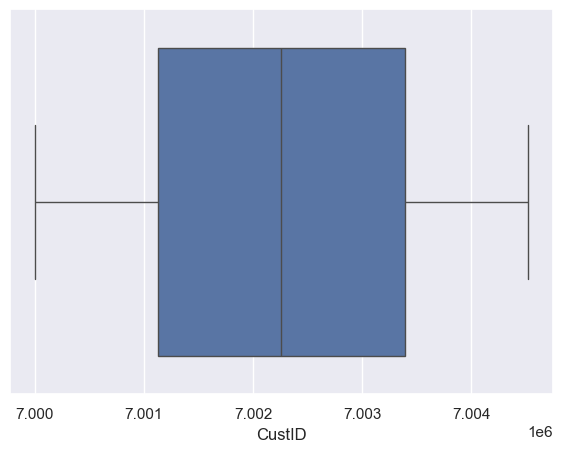

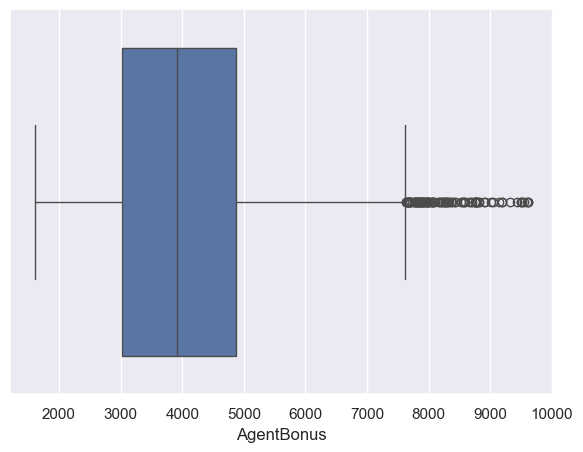

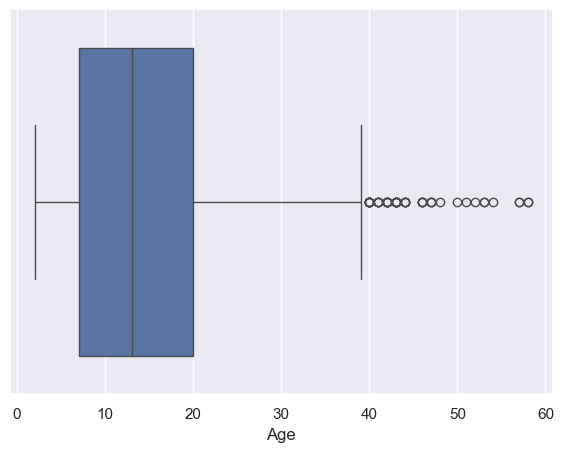

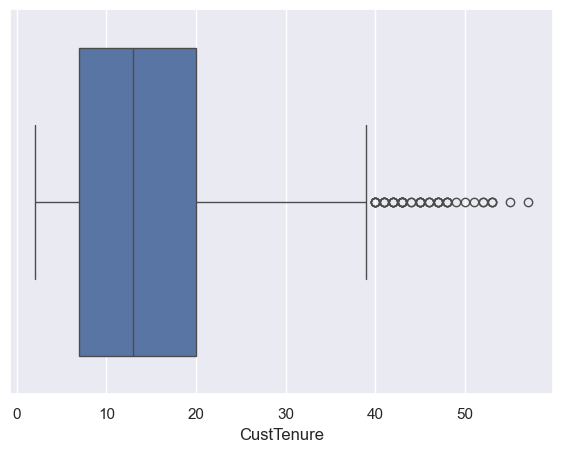

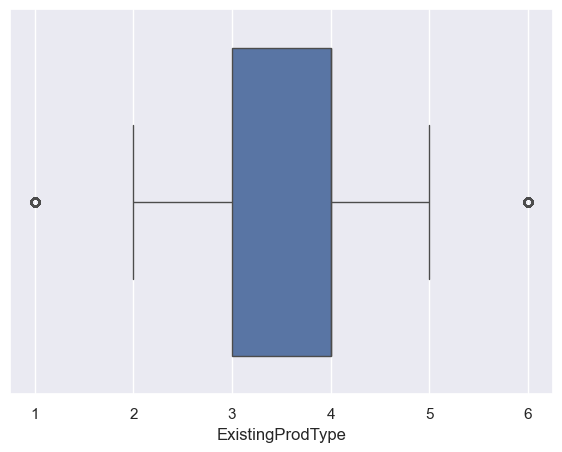

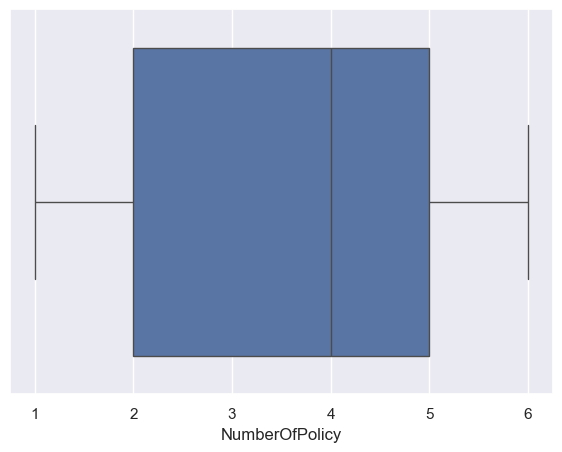

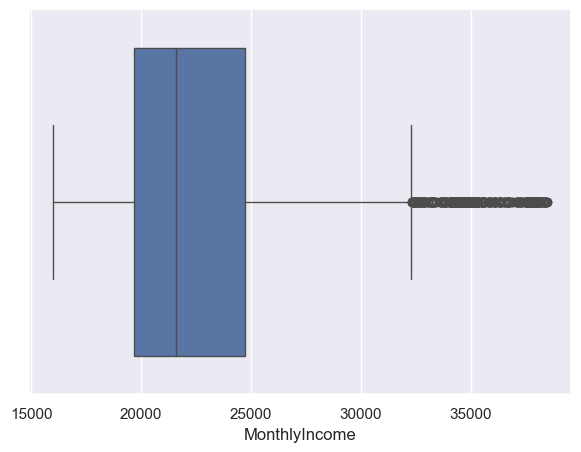

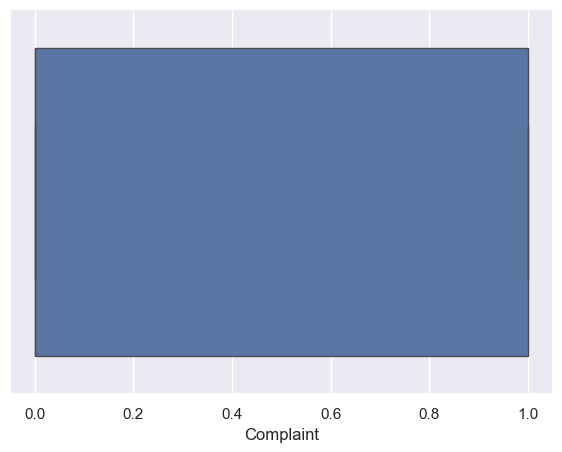

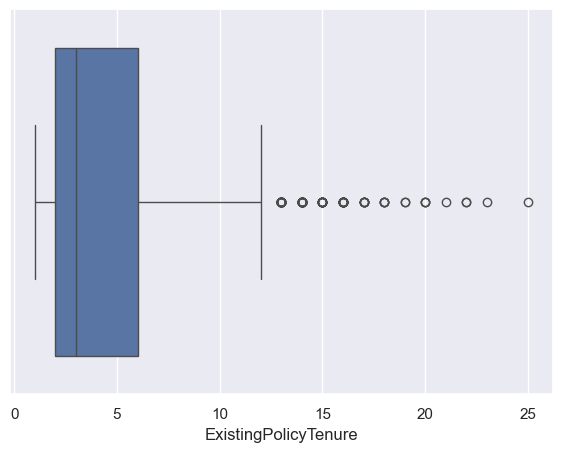

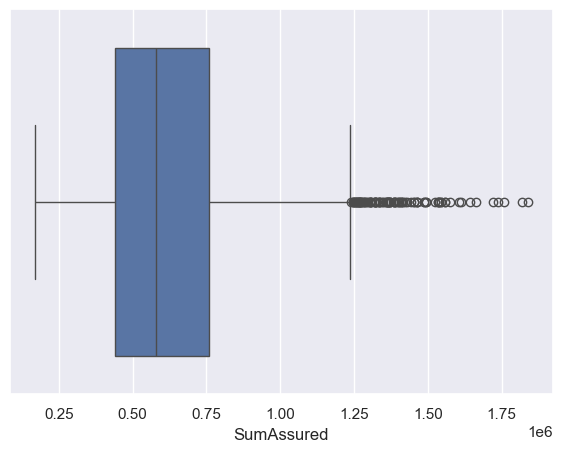

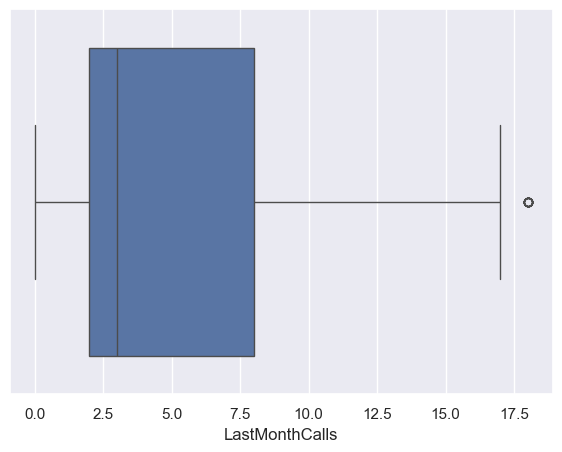

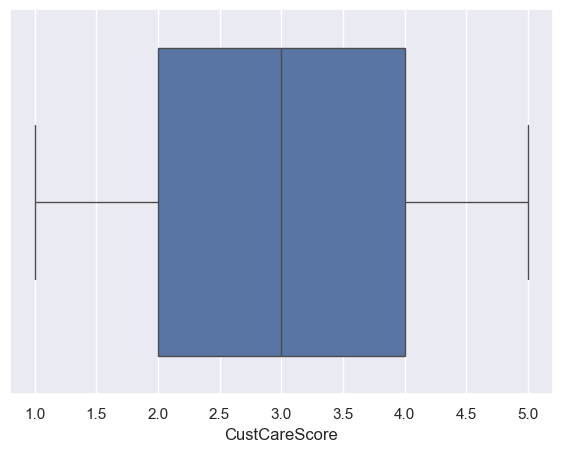

In [17]:
for col in num_data.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x = num_data[col])
    plt.show()



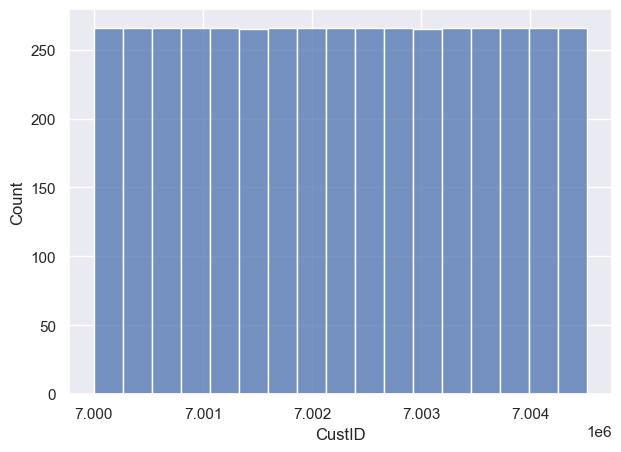

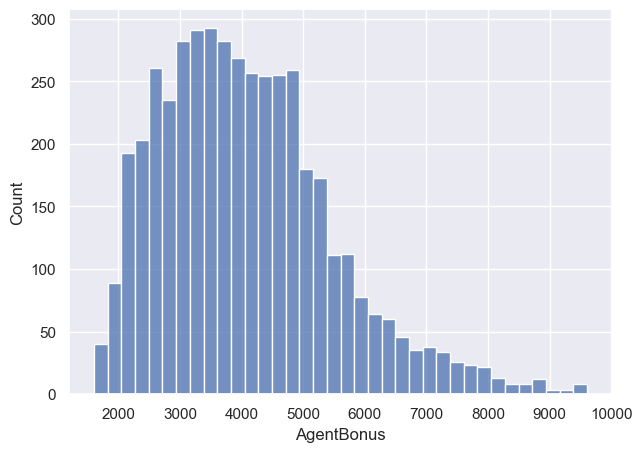

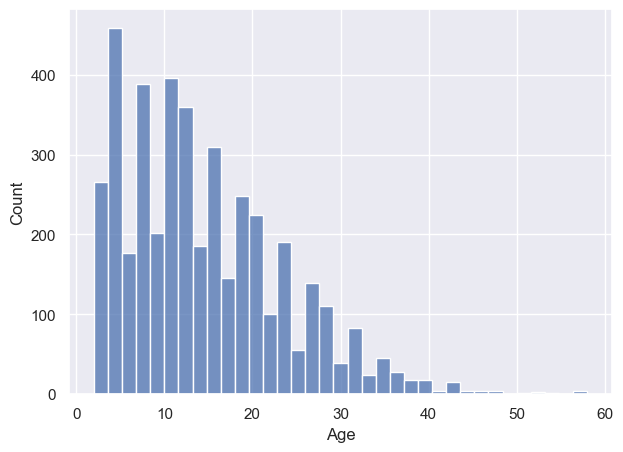

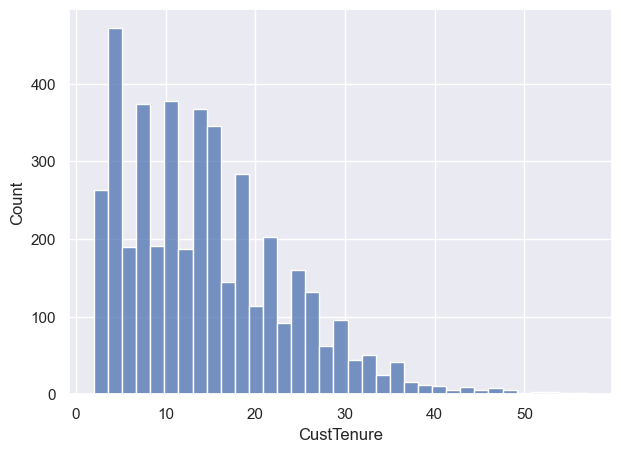

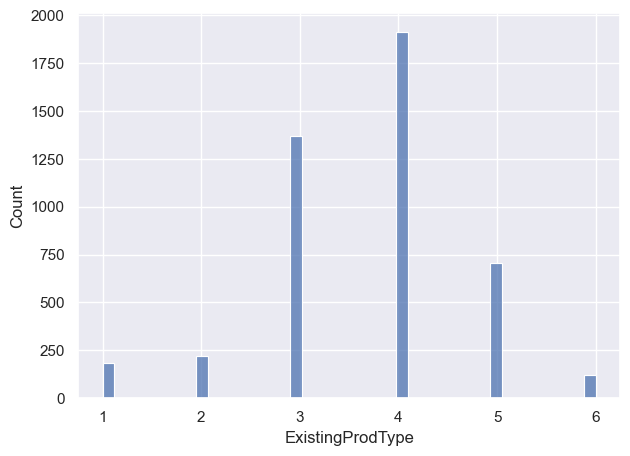

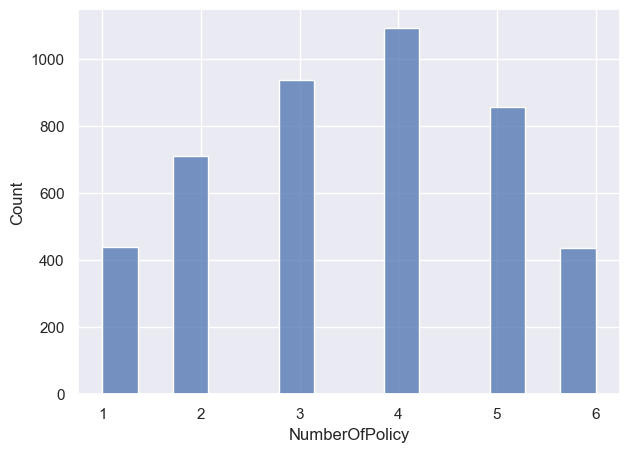

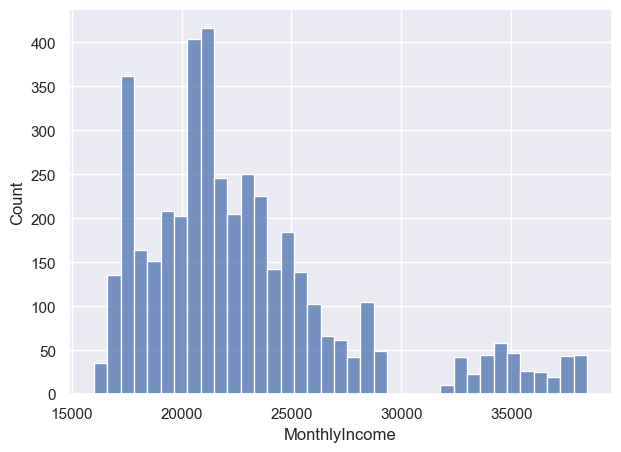

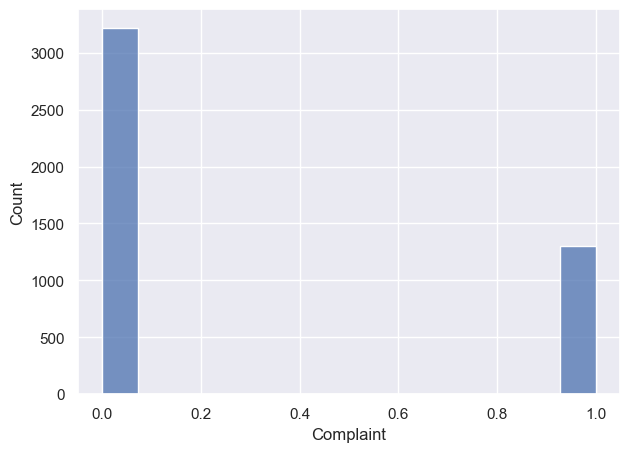

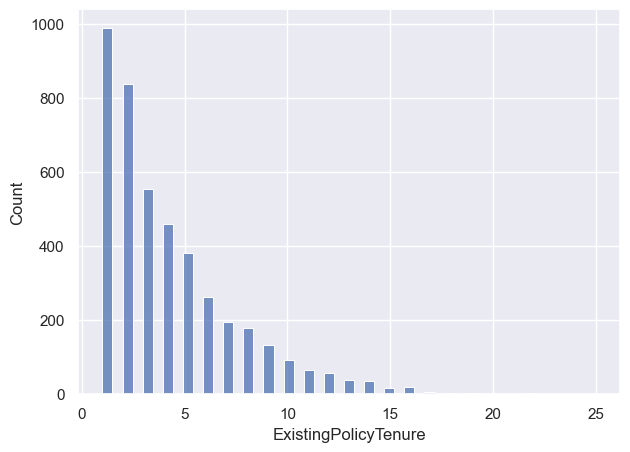

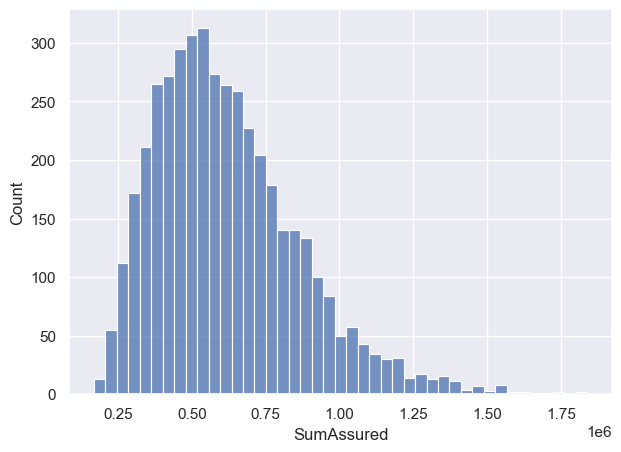

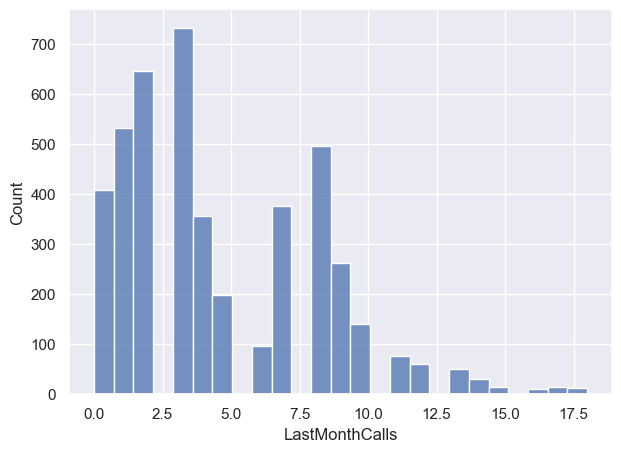

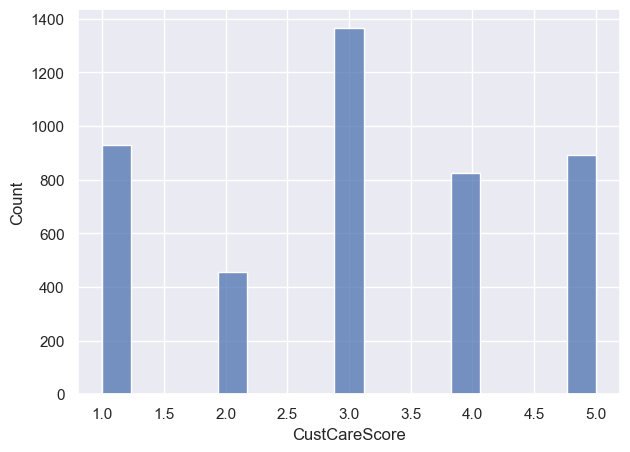

In [18]:
for col in num_data.columns:
    plt.figure(figsize=(7,5))
    sns.histplot(x = num_data[col])
    plt.show()

In [19]:
cat_data


Channel      Occupation  EducationField  Gender  \
0                   Agent        Salaried  Under Graduate  Female   
1     Third Party Partner        Salaried  Under Graduate    Male   
2                   Agent     Free Lancer   Post Graduate    Male   
3     Third Party Partner        Salaried  Under Graduate  Female   
4                   Agent  Small Business  Under Graduate    Male   
...                   ...             ...             ...     ...   
4515                Agent  Small Business  Under Graduate    Male   
4516                Agent        Salaried  Under Graduate  Female   
4517                Agent        Salaried        Engineer  Female   
4518               Online  Small Business  Under Graduate  Female   
4519                Agent        Salaried  Under Graduate  Female   

         Designation MaritalStatus   Zone PaymentMethod  
0            Manager        Single  North   Half Yearly  
1            Manager      Divorced  North        Yearly  
2          Executive        Single  North        Yearly  
3          Executive      Divorced   West   Half Yearly  
4          Executive      Divorced   West   Half Yearly  
...              ...           ...    ...           ...  
4515  Senior Manager        Single   West        Yearly  
4516       Executive       Married  North        Yearly  
4517             AVP        Single  North   Half Yearly  
4518       Executive        Single   West   Half Yearly  
4519         Manager       Married  North   Half Yearly  

[4520 rows x 8 columns]

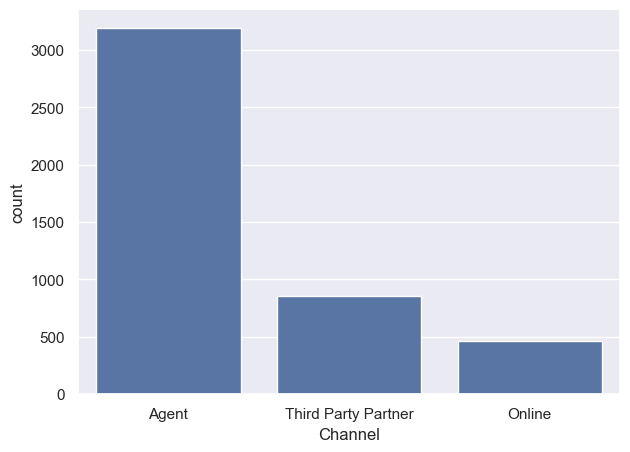

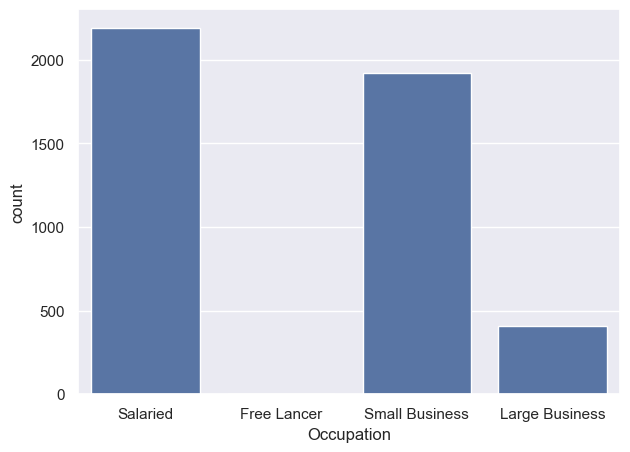

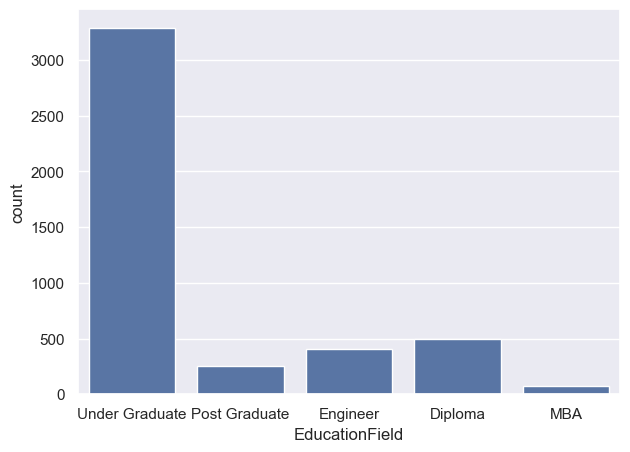

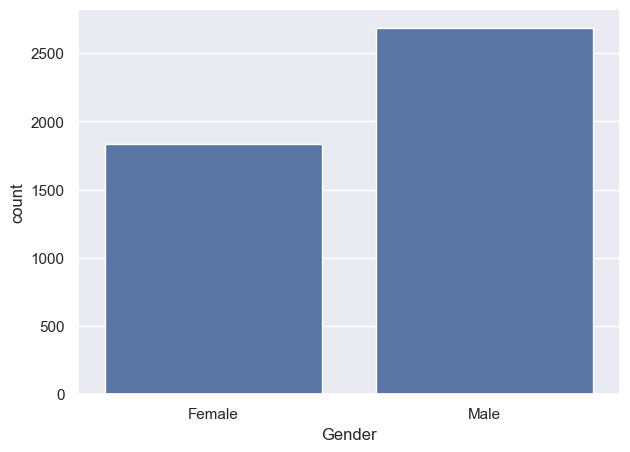

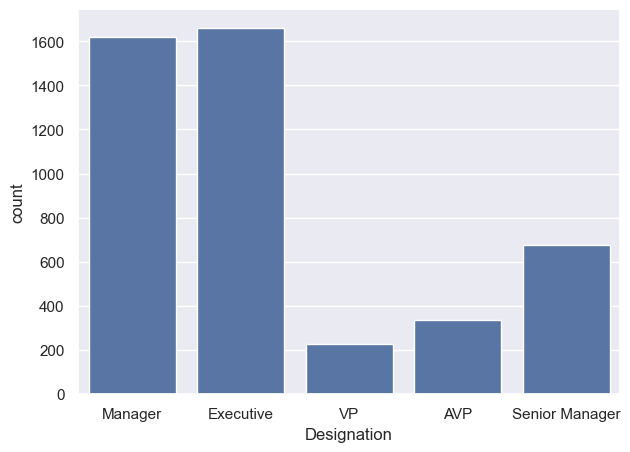

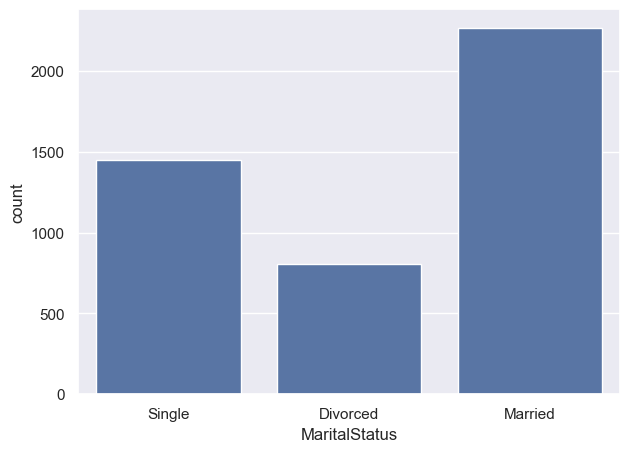

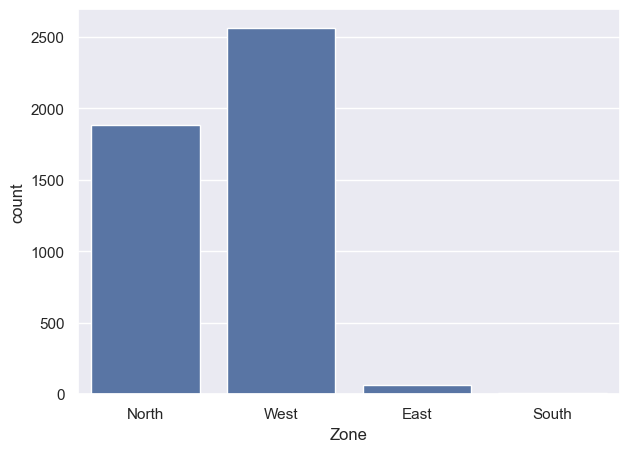

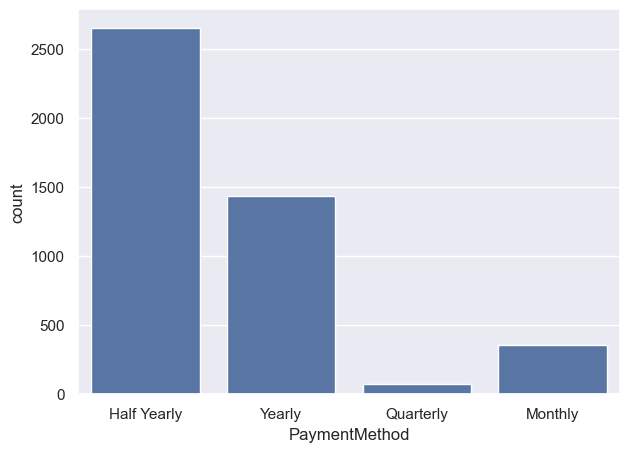

In [20]:
for col in cat_data.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x = cat_data[col])
    
    plt.show()


In [21]:
num_data

CustID  AgentBonus   Age  CustTenure  ExistingProdType  NumberOfPolicy  \
0     7000000        4409  22.0         4.0                 3             2.0   
1     7000001        2214  11.0         2.0                 4             4.0   
2     7000002        4273  26.0         4.0                 4             3.0   
3     7000003        1791  11.0         NaN                 3             3.0   
4     7000004        2955   6.0         NaN                 3             4.0   
...       ...         ...   ...         ...               ...             ...   
4515  7004515        3953   4.0         8.0                 4             2.0   
4516  7004516        2939   9.0         9.0                 2             2.0   
4517  7004517        3792  23.0        23.0                 5             5.0   
4518  7004518        4816  10.0        10.0                 4             2.0   
4519  7004519        4764  14.0        10.0                 5             2.0   

      MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0           20993.0          1                   2.0    806761.0   
1           20130.0          0                   3.0    294502.0   
2           17090.0          1                   2.0         NaN   
3           17909.0          1                   2.0    268635.0   
4           18468.0          0                   4.0    366405.0   
...             ...        ...                   ...         ...   
4515        26355.0          0                   2.0    636473.0   
4516        20991.0          0                   3.0    296813.0   
4517            NaN          0                   2.0    667371.0   
4518        20068.0          0                   6.0    943999.0   
4519        23820.0          0                   3.0    700308.0   

      LastMonthCalls  CustCareScore  
0                  5            2.0  
1                  7            3.0  
2                  0            3.0  
3                  0            5.0  
4                  2            5.0  
...              ...            ...  
4515               9            1.0  
4516               1            3.0  
4517               4            1.0  
4518               1            5.0  
4519               1            3.0  

[4520 rows x 12 columns]

<Axes: xlabel='AgentBonus', ylabel='SumAssured'>

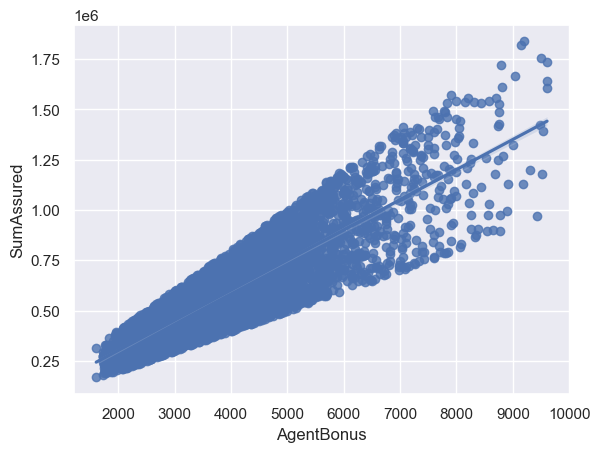

In [22]:
sns.regplot(x=num_data['AgentBonus'],y=num_data['SumAssured'])

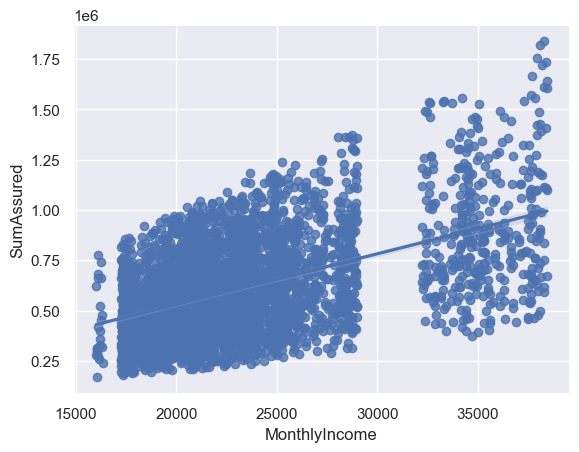

In [23]:
sns.regplot(x=num_data['MonthlyIncome'],y=num_data['SumAssured']);

In [24]:
# sns.regplot(x=num_data['LastMonthCalls'],y=num_data['CustCareScore'])

<Axes: xlabel='Age', ylabel='CustTenure'>

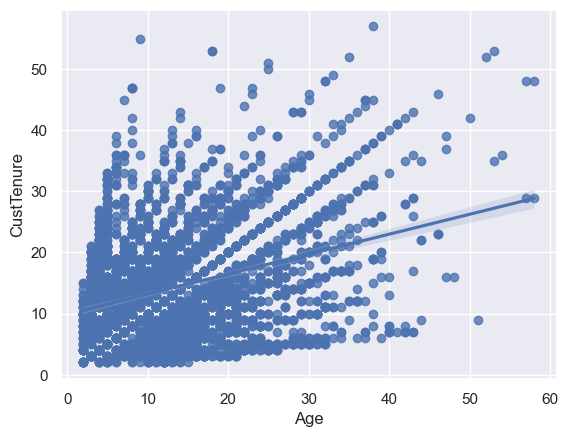

In [25]:
sns.regplot(x=num_data['Age'],y=num_data['CustTenure'])

<Axes: xlabel='Age', ylabel='ExistingPolicyTenure'>

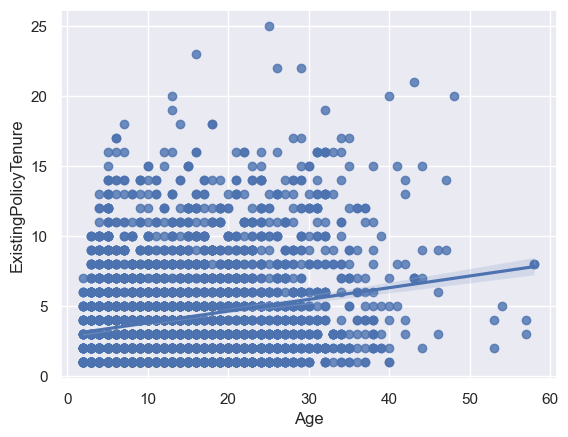

In [26]:
sns.regplot(x=num_data['Age'],y=num_data['ExistingPolicyTenure'])

<Axes: xlabel='Age', ylabel='NumberOfPolicy'>

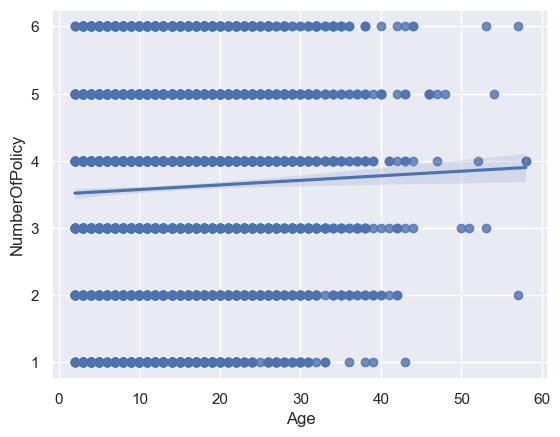

In [27]:
sns.regplot(x=num_data['Age'],y=num_data['NumberOfPolicy'])

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

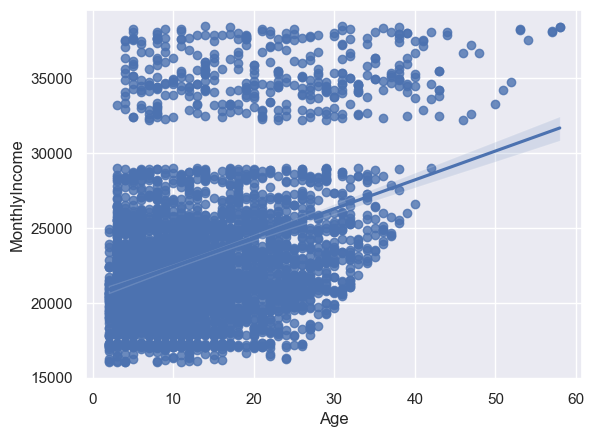

In [28]:
sns.regplot(x=num_data['Age'],y=num_data['MonthlyIncome'])

<Axes: xlabel='Age', ylabel='SumAssured'>

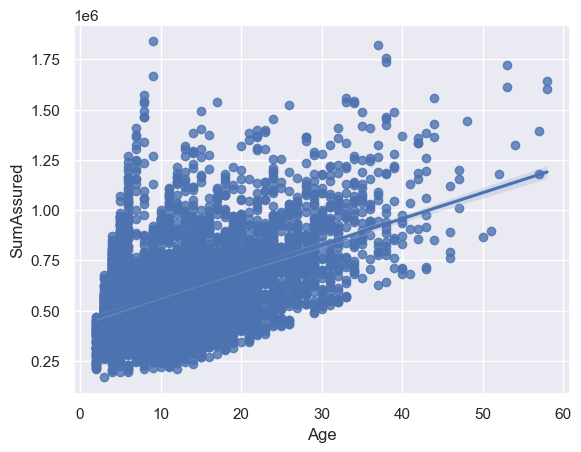

In [29]:
sns.regplot(x=num_data['Age'],y=num_data['SumAssured'])

<Axes: xlabel='NumberOfPolicy', ylabel='SumAssured'>

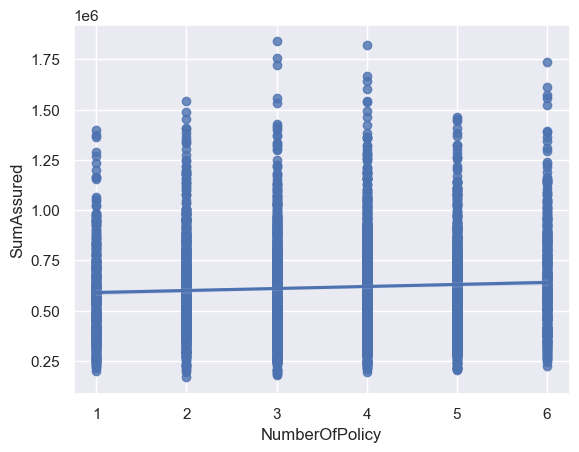

In [30]:
sns.regplot(x=num_data['NumberOfPolicy'],y=num_data['SumAssured'])

In [31]:
num_data.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'ExistingProdType',
       'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure',
       'SumAssured', 'LastMonthCalls', 'CustCareScore'],
      dtype='object')

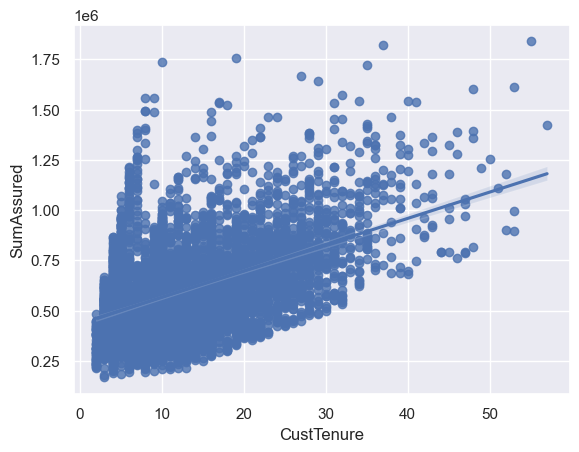

In [32]:
sns.regplot(x=num_data['CustTenure'],y=num_data['SumAssured']);

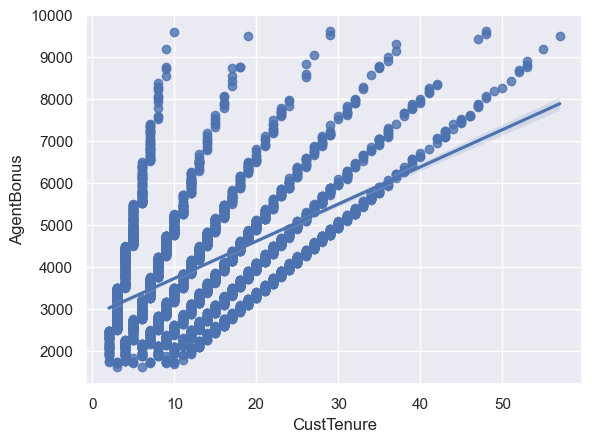

In [33]:
sns.regplot(x=num_data['CustTenure'],y=num_data['AgentBonus']);

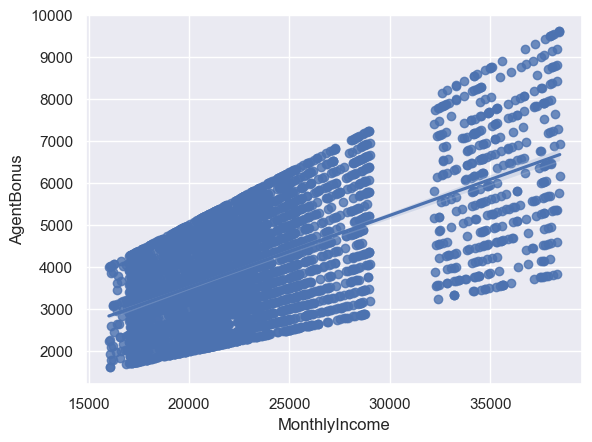

In [34]:
sns.regplot(x=num_data['MonthlyIncome'],y=num_data['AgentBonus']);

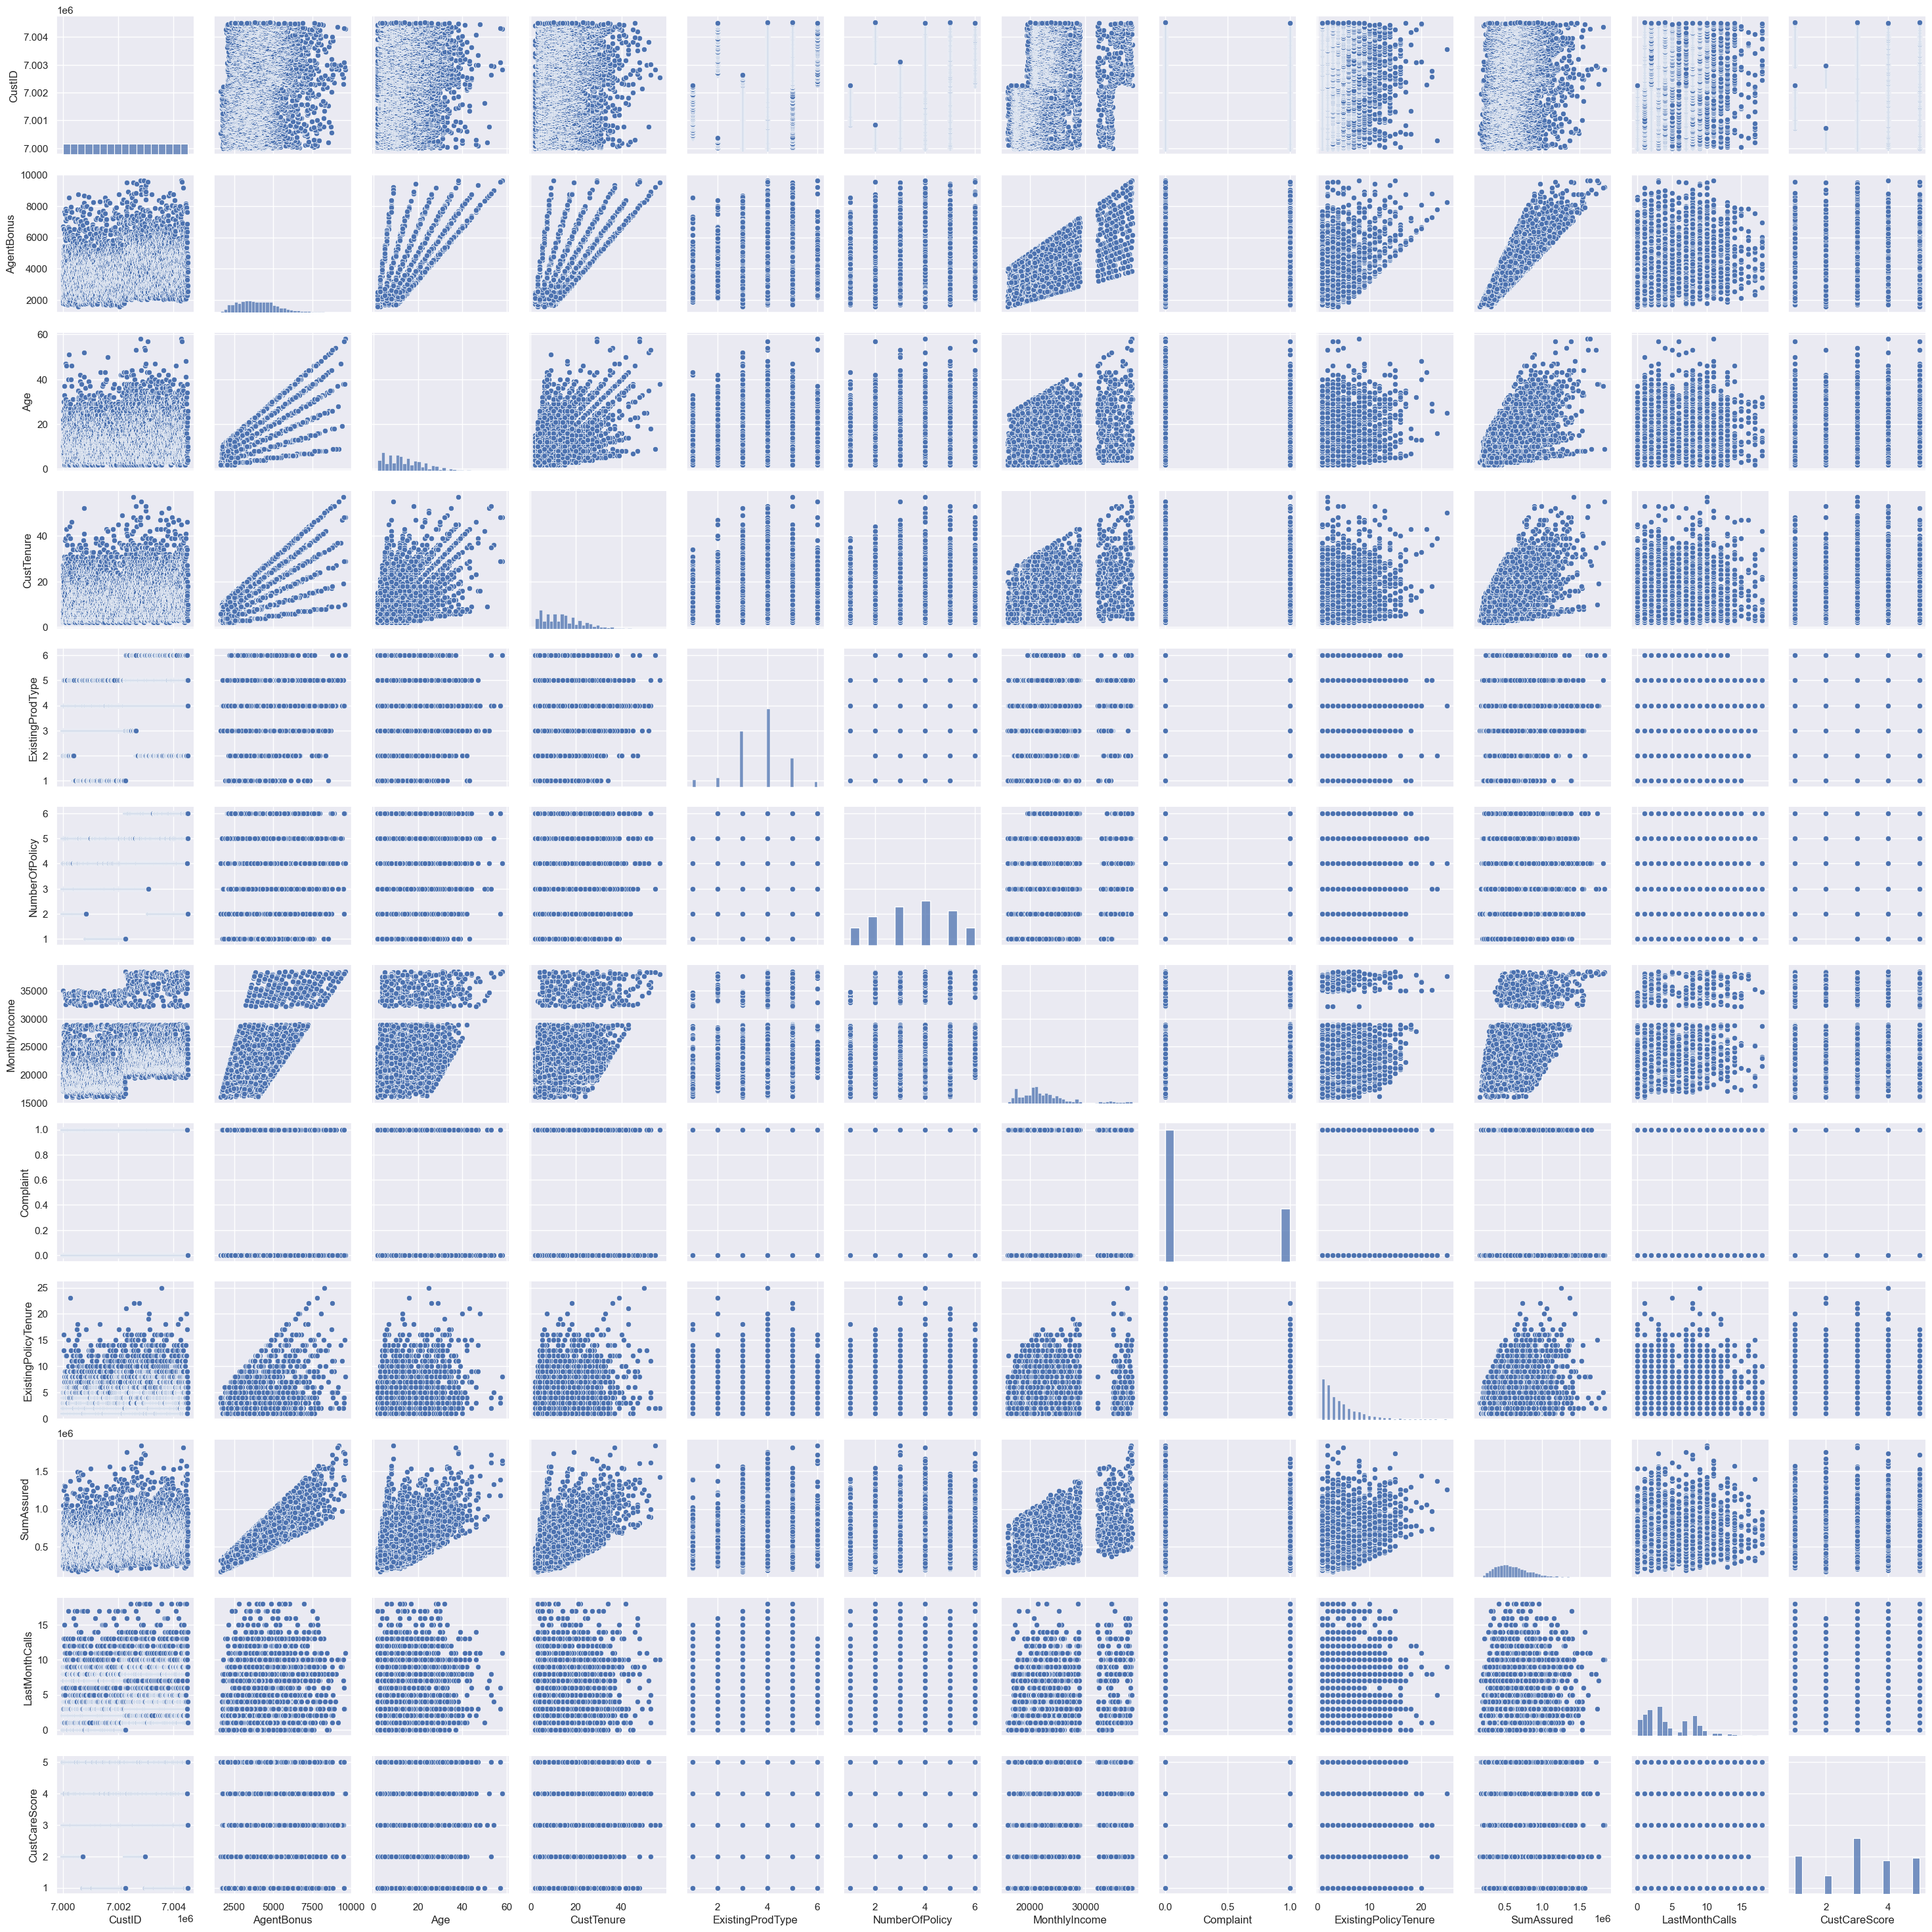

In [35]:
sns.pairplot(num_data);

<Axes: >

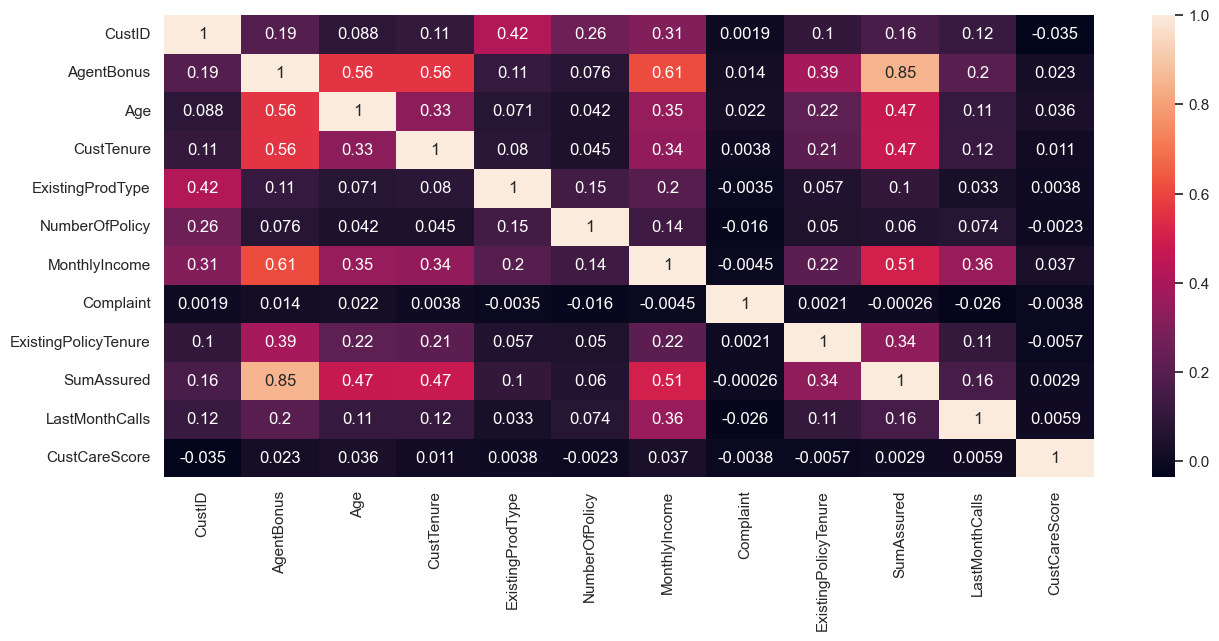

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(num_data.corr(),annot=True)

In [37]:
cat_data

Channel      Occupation  EducationField  Gender  \
0                   Agent        Salaried  Under Graduate  Female   
1     Third Party Partner        Salaried  Under Graduate    Male   
2                   Agent     Free Lancer   Post Graduate    Male   
3     Third Party Partner        Salaried  Under Graduate  Female   
4                   Agent  Small Business  Under Graduate    Male   
...                   ...             ...             ...     ...   
4515                Agent  Small Business  Under Graduate    Male   
4516                Agent        Salaried  Under Graduate  Female   
4517                Agent        Salaried        Engineer  Female   
4518               Online  Small Business  Under Graduate  Female   
4519                Agent        Salaried  Under Graduate  Female   

         Designation MaritalStatus   Zone PaymentMethod  
0            Manager        Single  North   Half Yearly  
1            Manager      Divorced  North        Yearly  
2          Executive        Single  North        Yearly  
3          Executive      Divorced   West   Half Yearly  
4          Executive      Divorced   West   Half Yearly  
...              ...           ...    ...           ...  
4515  Senior Manager        Single   West        Yearly  
4516       Executive       Married  North        Yearly  
4517             AVP        Single  North   Half Yearly  
4518       Executive        Single   West   Half Yearly  
4519         Manager       Married  North   Half Yearly  

[4520 rows x 8 columns]

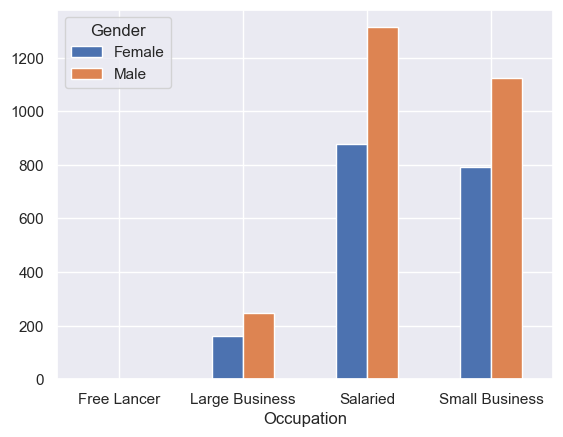

In [38]:
crosstb = pd.crosstab(cat_data.Occupation, cat_data.Gender)
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

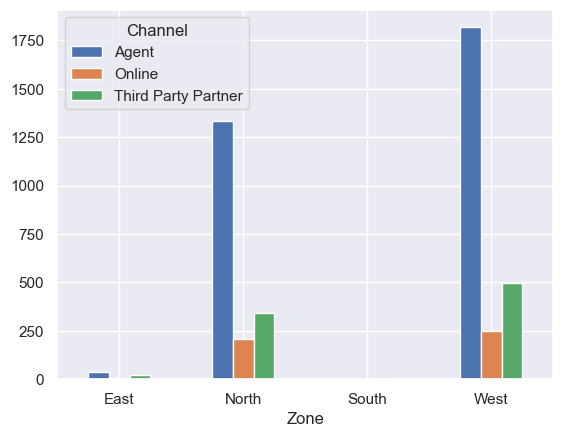

In [39]:
crosstb = pd.crosstab(cat_data.Zone,cat_data.Channel)
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

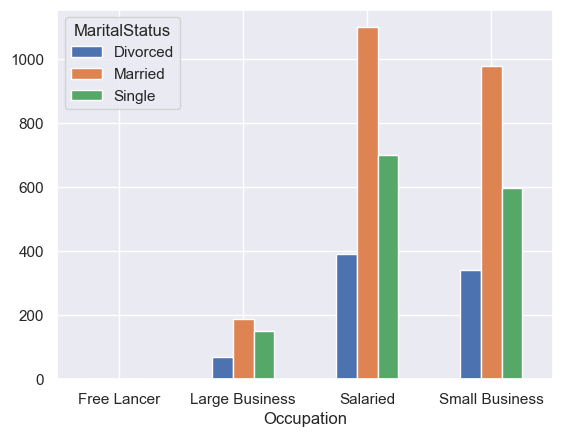

In [40]:
crosstb = pd.crosstab(cat_data.Occupation, cat_data.MaritalStatus)
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

In [41]:
df.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

   EducationField  Gender  ExistingProdType Designation  NumberOfPolicy  \
0  Under Graduate  Female                 3     Manager             2.0   
1  Under Graduate    Male                 4     Manager             4.0   
2   Post Graduate    Male                 4   Executive             3.0   
3  Under Graduate  Female                 3   Executive             3.0   
4  Under Graduate    Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2        Single        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

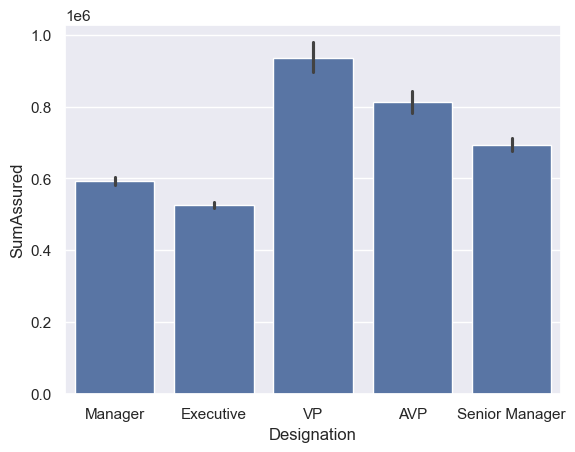

In [42]:
sns.barplot(x=df['Designation'],y=df['SumAssured']);

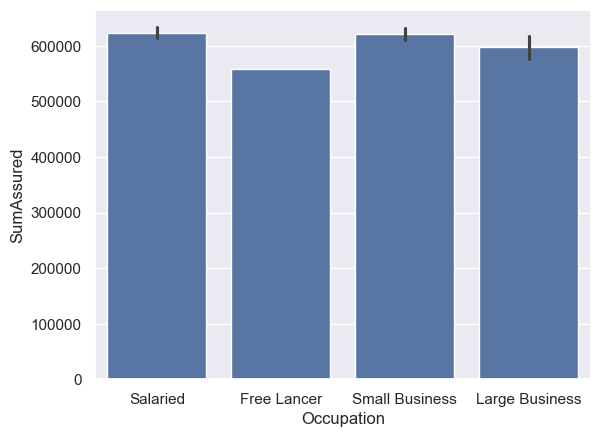

In [43]:
sns.barplot(x=df['Occupation'],y=df['SumAssured']);

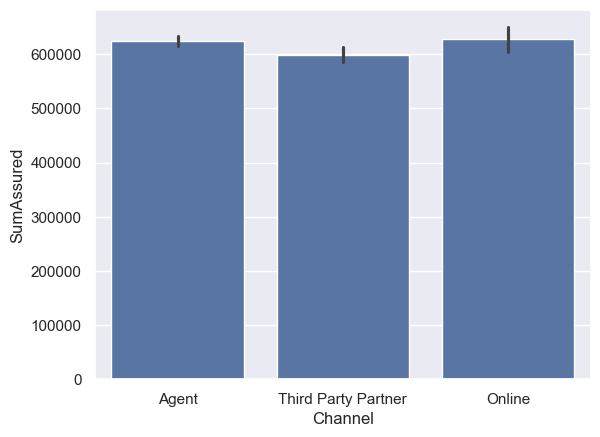

In [44]:
sns.barplot(x=df['Channel'],y=df['SumAssured']);

In [45]:
df.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

   EducationField  Gender  ExistingProdType Designation  NumberOfPolicy  \
0  Under Graduate  Female                 3     Manager             2.0   
1  Under Graduate    Male                 4     Manager             4.0   
2   Post Graduate    Male                 4   Executive             3.0   
3  Under Graduate  Female                 3   Executive             3.0   
4  Under Graduate    Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2        Single        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

In [46]:
num_data = num_data.drop('CustID', axis=1)
num_data = num_data.drop('Age', axis=1)


In [47]:
df['Complaint'].value_counts(normalize=True)

Complaint
0    0.712832
1    0.287168
Name: proportion, dtype: float64

In [48]:
num_data.isnull().sum()

AgentBonus                0
CustTenure              226
ExistingProdType          0
NumberOfPolicy           45
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [49]:
cat_data.isnull().sum()

Channel           0
Occupation        0
EducationField    0
Gender            0
Designation       0
MaritalStatus     0
Zone              0
PaymentMethod     0
dtype: int64

In [50]:
# df[] = imputer.fit_transform(data)

In [51]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [52]:
num_data=pd.DataFrame(imputer.fit_transform(num_data), columns = num_data.columns)

In [53]:
num_data.isnull().sum()

AgentBonus              0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
dtype: int64

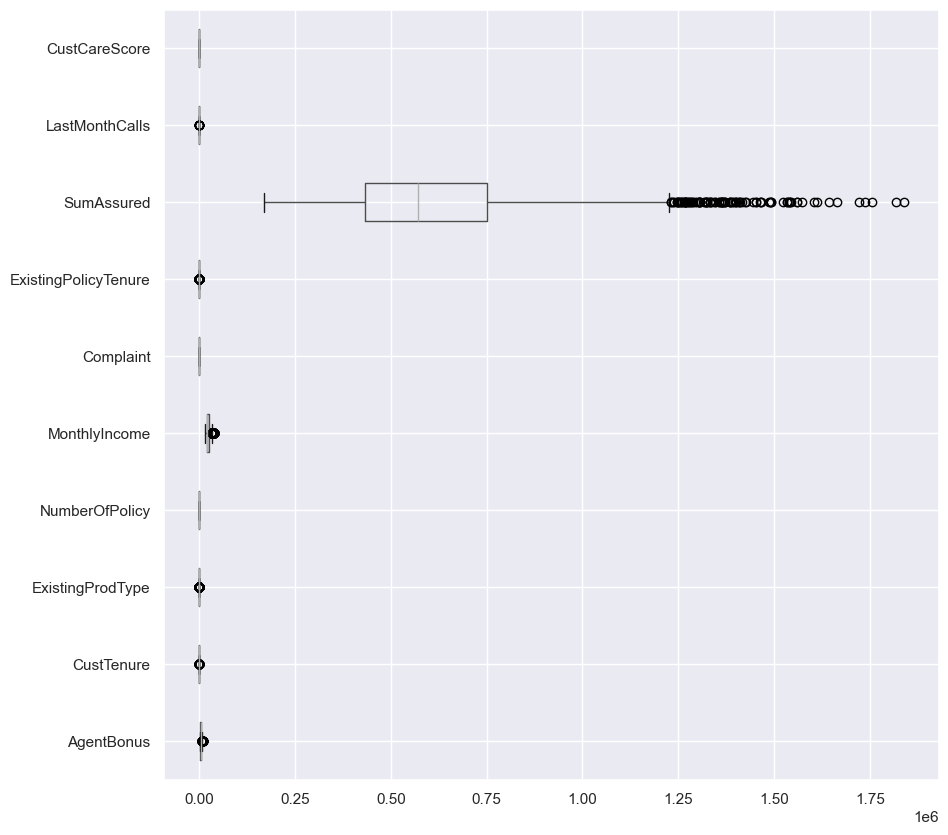

In [54]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
num_data.boxplot(vert=0)
plt.show()

In [55]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [56]:
for column in num_data.columns:
    lr,ur=remove_outlier(num_data[column])
    num_data[column]=np.where(num_data[column]>ur,ur,num_data[column])
    num_data[column]=np.where(num_data[column]<lr,lr,num_data[column])

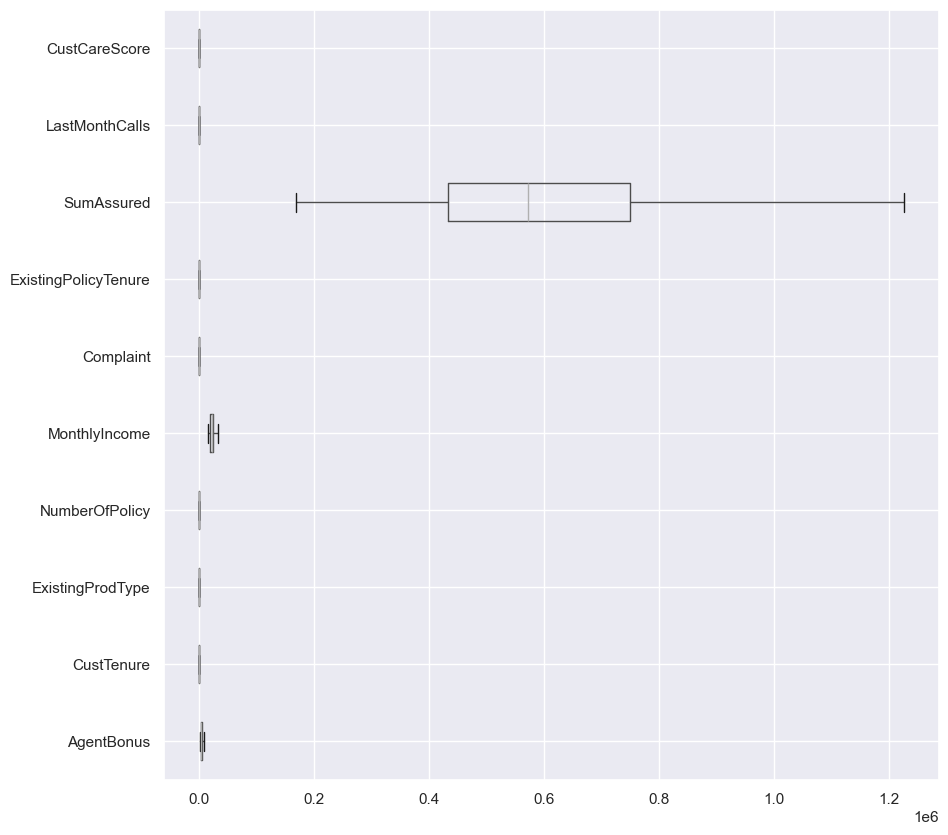

In [57]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
num_data.boxplot(vert=0)
plt.show()

In [58]:
cat_data=pd.get_dummies(cat_data,dtype='int',drop_first=True)
cat_data

Channel_Online  Channel_Third Party Partner  Occupation_Large Business  \
0                  0                            0                          0   
1                  0                            1                          0   
2                  0                            0                          0   
3                  0                            1                          0   
4                  0                            0                          0   
...              ...                          ...                        ...   
4515               0                            0                          0   
4516               0                            0                          0   
4517               0                            0                          0   
4518               1                            0                          0   
4519               0                            0                          0   

      Occupation_Salaried  Occupation_Small Business  EducationField_Engineer  \
0                       1                          0                        0   
1                       1                          0                        0   
2                       0                          0                        0   
3                       1                          0                        0   
4                       0                          1                        0   
...                   ...                        ...                      ...   
4515                    0                          1                        0   
4516                    1                          0                        0   
4517                    1                          0                        1   
4518                    0                          1                        0   
4519                    1                          0                        0   

      EducationField_MBA  EducationField_Post Graduate  \
0                      0                             0   
1                      0                             0   
2                      0                             1   
3                      0                             0   
4                      0                             0   
...                  ...                           ...   
4515                   0                             0   
4516                   0                             0   
4517                   0                             0   
4518                   0                             0   
4519                   0                             0   

      EducationField_Under Graduate  Gender_Male  ...  \
0                                 1            0  ...   
1                                 1            1  ...   
2                                 0            1  ...   
3                                 1            0  ...   
4                                 1            1  ...   
...                             ...          ...  ...   
4515                              1            1  ...   
4516                              1            0  ...   
4517                              0            0  ...   
4518                              1            0  ...   
4519                              1            0  ...   

      Designation_Senior Manager  Designation_VP  MaritalStatus_Married  \
0                              0               0                      0   
1                              0               0                      0   
2                              0               0                      0   
3                              0               0                      0   
4                              0               0                      0   
...                          ...             ...                    ...   
4515                           1               0                      0   
4516                           0               0                      1   
4517           

In [59]:
df = pd.concat([cat_data, num_data], axis="columns")

In [60]:
df.head()

Channel_Online  Channel_Third Party Partner  Occupation_Large Business  \
0               0                            0                          0   
1               0                            1                          0   
2               0                            0                          0   
3               0                            1                          0   
4               0                            0                          0   

   Occupation_Salaried  Occupation_Small Business  EducationField_Engineer  \
0                    1                          0                        0   
1                    1                          0                        0   
2                    0                          0                        0   
3                    1                          0                        0   
4                    0                          1                        0   

   EducationField_MBA  EducationField_Post Graduate  \
0                   0                             0   
1                   0                             0   
2                   0                             1   
3                   0                             0   
4                   0                             0   

   EducationField_Under Graduate  Gender_Male  ...  AgentBonus  CustTenure  \
0                              1            0  ...      4409.0         4.0   
1                              1            1  ...      2214.0         2.0   
2                              0            1  ...      4273.0         4.0   
3                              1            0  ...      1791.0         6.8   
4                              1            1  ...      2955.0        11.0   

   ExistingProdType  NumberOfPolicy  MonthlyIncome  Complaint  \
0               3.0             2.0        20993.0        1.0   
1               4.0             4.0        20130.0        0.0   
2               4.0             3.0        17090.0        1.0   
3               3.0             3.0        17909.0        1.0   
4               3.0             4.0        18468.0        0.0   

   ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  
0                   2.0    806761.0             5.0            2.0  
1                   3.0    294502.0             7.0            3.0  
2                   2.0    689382.8             0.0            3.0  
3                   2.0    268635.0             0.0            5.0  
4                   4.0    366405.0             2.0            5.0  

[5 rows x 32 columns]

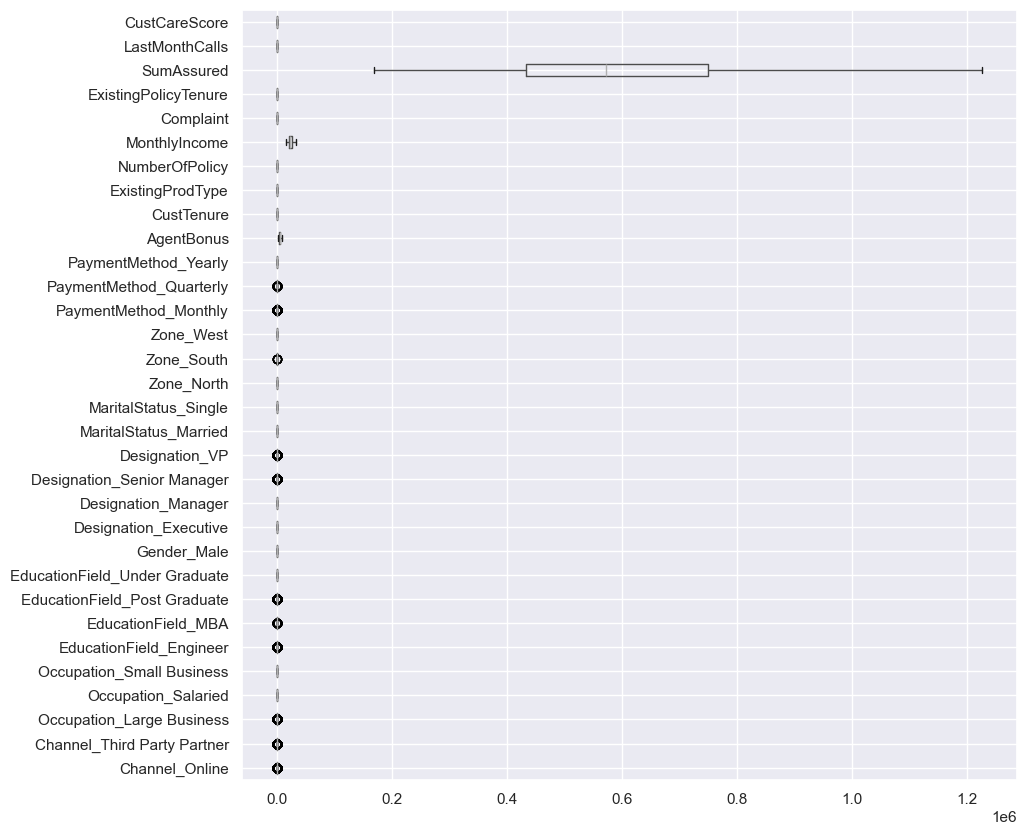

In [61]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [63]:
scaled_df.head()

Channel_Online  Channel_Third Party Partner  Occupation_Large Business  \
0       -0.339851                    -0.484044                  -0.314995   
1       -0.339851                     2.065930                  -0.314995   
2       -0.339851                    -0.484044                  -0.314995   
3       -0.339851                     2.065930                  -0.314995   
4       -0.339851                    -0.484044                  -0.314995   

   Occupation_Salaried  Occupation_Small Business  EducationField_Engineer  \
0             1.030555                  -0.858560                -0.314995   
1             1.030555                  -0.858560                -0.314995   
2            -0.970351                  -0.858560                -0.314995   
3             1.030555                  -0.858560                -0.314995   
4            -0.970351                   1.164741                -0.314995   

   EducationField_MBA  EducationField_Post Graduate  \
0           -0.129012                     -0.242990   
1           -0.129012                     -0.242990   
2           -0.129012                      4.115399   
3           -0.129012                     -0.242990   
4           -0.129012                     -0.242990   

   EducationField_Under Graduate  Gender_Male  ...  AgentBonus  CustTenure  \
0                       0.611441    -1.211301  ...    0.254928   -1.202108   
1                       0.611441     0.825559  ...   -1.361260   -1.438151   
2                      -1.635481     0.825559  ...    0.154790   -1.202108   
3                       0.611441    -1.211301  ...   -1.672717   -0.871647   
4                       0.611441     0.825559  ...   -0.815659   -0.375956   

   ExistingProdType  NumberOfPolicy  MonthlyIncome  Complaint  \
0         -0.742887        -1.08084      -0.370616   1.575525   
1          0.325131         0.29906      -0.572419  -0.634709   
2          0.325131        -0.39089      -1.283289   1.575525   
3         -0.742887        -0.39089      -1.091775   1.575525   
4         -0.742887         0.29906      -0.961059  -0.634709   

   ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  
0             -0.690942    0.841422        0.104054      -0.774436  
1             -0.363131   -1.351217        0.658028      -0.047870  
2             -0.690942    0.339004       -1.280881      -0.047870  
3             -0.690942   -1.461936       -1.280881       1.405262  
4             -0.035319   -1.043448       -0.726907       1.405262  

[5 rows x 32 columns]

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [65]:
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    labels = KM.labels_
    sil_score = silhouette_score(scaled_df, labels)
    print("For i={}, The Silhouette Score is {}".format(i, sil_score))

For i=2, The Silhouette Score is 0.09300386762104516
For i=3, The Silhouette Score is 0.11161535252972202
For i=4, The Silhouette Score is 0.08831263339489193
For i=5, The Silhouette Score is 0.09564812519881592
For i=6, The Silhouette Score is 0.09707282262366976
For i=7, The Silhouette Score is 0.10347530769503431
For i=8, The Silhouette Score is 0.10721827700212368
For i=9, The Silhouette Score is 0.11056818450653236
For i=10, The Silhouette Score is 0.11135562253208486


In [66]:
k_means = KMeans(n_clusters=3,random_state = 1)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels)

0.11161535252972202

In [67]:
df["Clus_kmeans3"] = labels
df_copy["Clus_kmeans3"] = labels

df_copy.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  ...  MaritalStatus  \
0       Graduate   Female                 3     Manager  ...         Single   
1       Graduate     Male                 4     Manager  ...       Divorced   
2  Post Graduate     Male                 4         Exe  ...      Unmarried   
3       Graduate  Fe male                 3   Executive  ...       Divorced   
4             UG     Male                 3   Executive  ...       Divorced   

  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured   Zone  \
0       20993.0          1                   2.0    806761.0  North   
1       20130.0          0                   3.0    294502.0  North   
2       17090.0          1                   2.0         NaN  North   
3       17909.0          1                   2.0    268635.0   West   
4       18468.0          0                   4.0    366405.0   West   

  PaymentMethod LastMonthCalls  CustCareScore  Clus_kmeans3  
0   Half Yearly              5            2.0             1  
1        Yearly              7            3.0             1  
2        Yearly              0            3.0             1  
3   Half Yearly              0            5.0             1  
4   Half Yearly              2            5.0             1  

[5 rows x 21 columns]

In [68]:
df_copy.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore', 'Clus_kmeans3'],
      dtype='object')

In [69]:
df_copy['Clus_kmeans3'].value_counts(normalize=True)

Clus_kmeans3
1    0.599336
0    0.311062
2    0.089602
Name: proportion, dtype: float64

In [70]:
df_copy.groupby('Clus_kmeans3').agg({'CustTenure':'median','MonthlyIncome':'mean', 'SumAssured':'mean', 'CustCareScore':'median', 'ExistingPolicyTenure':'median', 'NumberOfPolicy':'median', 'LastMonthCalls':'median','AgentBonus':'mean'})

CustTenure  MonthlyIncome     SumAssured  CustCareScore  \
Clus_kmeans3                                                            
0                   20.0   27836.305929  834120.626600            3.0   
1                   11.0   20614.663126  506732.699961            3.0   
2                   12.0   22216.472585  595146.896641            3.0   

              ExistingPolicyTenure  NumberOfPolicy  LastMonthCalls  \
Clus_kmeans3                                                         
0                              5.0             4.0             7.0   
1                              3.0             4.0             3.0   
2                              3.0             4.0             4.0   

               AgentBonus  
Clus_kmeans3               
0             5428.995733  
1             3400.782577  
2             3915.903704

In [71]:
X = df.drop('AgentBonus', axis = 1)
y = df['AgentBonus'] 

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [73]:
X_train_copy=X_train.copy()

In [74]:
#Model building
import statsmodels.formula.api as SM
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)

In [76]:
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables         VIF
3             Occupation_Salaried  109.303069
25                  MonthlyIncome  100.605565
4       Occupation_Small Business   91.310275
23               ExistingProdType   66.337068
18                      Zone_West   41.699919
2       Occupation_Large Business   40.104908
16                     Zone_North   31.181761
5         EducationField_Engineer   20.823367
28                     SumAssured   14.655058
31                   Clus_kmeans3   12.246520
10          Designation_Executive   10.513577
8   EducationField_Under Graduate    9.109204
24                 NumberOfPolicy    7.878140
11            Designation_Manager    7.650407
30                  CustCareScore    5.972521
22                     CustTenure    5.332561
14          MaritalStatus_Married    3.903527
27           ExistingPolicyTenure    3.386278
29                 LastMonthCalls    3.219996
12     Designation_Senior Manager    3.215182
21           PaymentMethod_Yearly    3.214906
15           MaritalStatus_Single    2.882932
9                     Gender_Male    2.518864
19          PaymentMethod_Monthly    2.216646
13                 Designation_VP    1.984463
7    EducationField_Post Graduate    1.819905
26                      Complaint    1.417594
1     Channel_Third Party Partner    1.294653
6              EducationField_MBA    1.258441
0                  Channel_Online    1.159880
20        PaymentMethod_Quarterly    1.141367
17                     Zone_South    1.088981

In [77]:
X_train = X_train.drop('Occupation_Salaried', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables        VIF
24                  MonthlyIncome  71.223253
22               ExistingProdType  65.911082
17                      Zone_West  31.116947
15                     Zone_North  23.378122
4         EducationField_Engineer  20.809877
2       Occupation_Large Business  18.397706
27                     SumAssured  14.352036
30                   Clus_kmeans3  10.766725
9           Designation_Executive   9.041182
7   EducationField_Under Graduate   8.739505
23                 NumberOfPolicy   7.873677
10            Designation_Manager   6.662744
29                  CustCareScore   5.876423
21                     CustTenure   5.292008
13          MaritalStatus_Married   3.854141
26           ExistingPolicyTenure   3.362437
20           PaymentMethod_Yearly   3.207344
28                 LastMonthCalls   3.203875
11     Designation_Senior Manager   2.962197
14           MaritalStatus_Single   2.861788
8                     Gender_Male   2.515319
3       Occupation_Small Business   2.316324
18          PaymentMethod_Monthly   2.210235
12                 Designation_VP   1.970628
6    EducationField_Post Graduate   1.775415
25                      Complaint   1.417261
1     Channel_Third Party Partner   1.290703
5              EducationField_MBA   1.249558
0                  Channel_Online   1.159478
19        PaymentMethod_Quarterly   1.141067
16                     Zone_South   1.065572

In [78]:
X_train = X_train.drop('MonthlyIncome', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables        VIF
22               ExistingProdType  45.977925
17                      Zone_West  25.987177
4         EducationField_Engineer  20.640320
15                     Zone_North  19.493576
2       Occupation_Large Business  18.368504
26                     SumAssured  13.961541
29                   Clus_kmeans3  10.737119
7   EducationField_Under Graduate   8.561098
23                 NumberOfPolicy   7.821587
9           Designation_Executive   7.793763
10            Designation_Manager   6.380821
28                  CustCareScore   5.786391
21                     CustTenure   5.289302
13          MaritalStatus_Married   3.825385
25           ExistingPolicyTenure   3.357003
27                 LastMonthCalls   3.195594
11     Designation_Senior Manager   2.962032
14           MaritalStatus_Single   2.842975
20           PaymentMethod_Yearly   2.774388
8                     Gender_Male   2.500944
3       Occupation_Small Business   2.292381
18          PaymentMethod_Monthly   1.903232
6    EducationField_Post Graduate   1.758137
12                 Designation_VP   1.716742
24                      Complaint   1.414652
1     Channel_Third Party Partner   1.290136
5              EducationField_MBA   1.238164
0                  Channel_Online   1.159372
19        PaymentMethod_Quarterly   1.109326
16                     Zone_South   1.056775

In [79]:
X_train = X_train.drop('ExistingProdType', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables        VIF
17                      Zone_West  22.775411
4         EducationField_Engineer  20.540493
2       Occupation_Large Business  18.218856
15                     Zone_North  17.164700
25                     SumAssured  13.349754
28                   Clus_kmeans3  10.696645
7   EducationField_Under Graduate   8.408275
9           Designation_Executive   7.559672
22                 NumberOfPolicy   7.000609
10            Designation_Manager   6.179295
27                  CustCareScore   5.741979
21                     CustTenure   5.231444
13          MaritalStatus_Married   3.798946
24           ExistingPolicyTenure   3.350966
26                 LastMonthCalls   3.123348
11     Designation_Senior Manager   2.926231
14           MaritalStatus_Single   2.819723
8                     Gender_Male   2.495598
3       Occupation_Small Business   2.267702
6    EducationField_Post Graduate   1.735323
12                 Designation_VP   1.713163
20           PaymentMethod_Yearly   1.558422
23                      Complaint   1.413564
1     Channel_Third Party Partner   1.289460
5              EducationField_MBA   1.233879
18          PaymentMethod_Monthly   1.163066
0                  Channel_Online   1.158564
19        PaymentMethod_Quarterly   1.051615
16                     Zone_South   1.050284

In [80]:
X_train = X_train.drop('Zone_West', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables        VIF
4         EducationField_Engineer  20.533971
2       Occupation_Large Business  18.218055
24                     SumAssured  11.917820
27                   Clus_kmeans3   9.713068
7   EducationField_Under Graduate   7.870780
9           Designation_Executive   7.049688
21                 NumberOfPolicy   6.739368
10            Designation_Manager   5.708840
26                  CustCareScore   5.461184
20                     CustTenure   5.169028
13          MaritalStatus_Married   3.705706
23           ExistingPolicyTenure   3.308972
25                 LastMonthCalls   3.025449
14           MaritalStatus_Single   2.768936
11     Designation_Senior Manager   2.683787
8                     Gender_Male   2.451656
3       Occupation_Small Business   2.167656
15                     Zone_North   1.735685
6    EducationField_Post Graduate   1.680583
12                 Designation_VP   1.659022
19           PaymentMethod_Yearly   1.551606
22                      Complaint   1.402649
1     Channel_Third Party Partner   1.289460
5              EducationField_MBA   1.218577
17          PaymentMethod_Monthly   1.162256
0                  Channel_Online   1.158527
18        PaymentMethod_Quarterly   1.050884
16                     Zone_South   1.006509

In [81]:
X_train = X_train.drop('EducationField_Engineer', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables        VIF
23                     SumAssured  11.834444
26                   Clus_kmeans3   8.957661
6   EducationField_Under Graduate   7.346662
8           Designation_Executive   7.011234
20                 NumberOfPolicy   6.730074
9             Designation_Manager   5.669621
25                  CustCareScore   5.459465
19                     CustTenure   5.153062
2       Occupation_Large Business   3.854405
12          MaritalStatus_Married   3.705439
22           ExistingPolicyTenure   3.308524
24                 LastMonthCalls   3.025383
13           MaritalStatus_Single   2.768926
10     Designation_Senior Manager   2.683711
7                     Gender_Male   2.451115
3       Occupation_Small Business   2.154500
14                     Zone_North   1.734187
11                 Designation_VP   1.658688
5    EducationField_Post Graduate   1.640626
18           PaymentMethod_Yearly   1.550284
21                      Complaint   1.401970
1     Channel_Third Party Partner   1.289018
4              EducationField_MBA   1.204592
16          PaymentMethod_Monthly   1.162038
0                  Channel_Online   1.158508
17        PaymentMethod_Quarterly   1.050849
15                     Zone_South   1.006508

In [82]:
X_train = X_train.drop('SumAssured', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables       VIF
25                   Clus_kmeans3  8.496223
6   EducationField_Under Graduate  6.986834
8           Designation_Executive  6.951929
20                 NumberOfPolicy  6.560141
9             Designation_Manager  5.568293
24                  CustCareScore  5.379354
19                     CustTenure  4.320311
12          MaritalStatus_Married  3.643790
2       Occupation_Large Business  3.620410
22           ExistingPolicyTenure  3.077659
23                 LastMonthCalls  3.011933
13           MaritalStatus_Single  2.714711
10     Designation_Senior Manager  2.628689
7                     Gender_Male  2.444433
3       Occupation_Small Business  2.132935
14                     Zone_North  1.726428
11                 Designation_VP  1.608599
5    EducationField_Post Graduate  1.604609
18           PaymentMethod_Yearly  1.549455
21                      Complaint  1.397641
1     Channel_Third Party Partner  1.288832
4              EducationField_MBA  1.190927
16          PaymentMethod_Monthly  1.161654
0                  Channel_Online  1.157064
17        PaymentMethod_Quarterly  1.050202
15                     Zone_South  1.006340

In [83]:
X_train = X_train.drop('Clus_kmeans3', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables       VIF
6   EducationField_Under Graduate  6.881712
20                 NumberOfPolicy  6.550267
24                  CustCareScore  5.317258
8           Designation_Executive  4.999164
9             Designation_Manager  4.427352
19                     CustTenure  4.058544
12          MaritalStatus_Married  3.622969
23                 LastMonthCalls  3.011460
22           ExistingPolicyTenure  2.969914
13           MaritalStatus_Single  2.674847
10     Designation_Senior Manager  2.563835
7                     Gender_Male  2.441965
3       Occupation_Small Business  2.131634
2       Occupation_Large Business  2.029038
14                     Zone_North  1.725991
11                 Designation_VP  1.608268
5    EducationField_Post Graduate  1.600911
18           PaymentMethod_Yearly  1.546511
21                      Complaint  1.394949
1     Channel_Third Party Partner  1.288819
4              EducationField_MBA  1.185496
0                  Channel_Online  1.156947
16          PaymentMethod_Monthly  1.155153
17        PaymentMethod_Quarterly  1.049605
15                     Zone_South  1.006340

In [84]:
X_train = X_train.drop('EducationField_Under Graduate', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables       VIF
19                NumberOfPolicy  6.402583
23                 CustCareScore  5.094209
7          Designation_Executive  4.276021
8            Designation_Manager  4.076177
18                    CustTenure  3.941665
11         MaritalStatus_Married  3.556726
22                LastMonthCalls  2.982330
21          ExistingPolicyTenure  2.967177
12          MaritalStatus_Single  2.626867
9     Designation_Senior Manager  2.420371
6                    Gender_Male  2.420195
3      Occupation_Small Business  1.966800
13                    Zone_North  1.721721
10                Designation_VP  1.569665
17          PaymentMethod_Yearly  1.544950
20                     Complaint  1.391372
1    Channel_Third Party Partner  1.285804
2      Occupation_Large Business  1.236448
0                 Channel_Online  1.152010
15         PaymentMethod_Monthly  1.150800
5   EducationField_Post Graduate  1.135242
4             EducationField_MBA  1.053939
16       PaymentMethod_Quarterly  1.048712
14                    Zone_South  1.006211

In [85]:
X_train = X_train.drop('NumberOfPolicy', axis=1)
calc_vif(X_train).sort_values(by = 'VIF',ascending = False)

variables       VIF
22                 CustCareScore  4.992657
7          Designation_Executive  3.862980
18                    CustTenure  3.819376
8            Designation_Manager  3.762367
11         MaritalStatus_Married  3.549114
20          ExistingPolicyTenure  2.940310
21                LastMonthCalls  2.893097
12          MaritalStatus_Single  2.619798
6                    Gender_Male  2.418984
9     Designation_Senior Manager  2.302948
3      Occupation_Small Business  1.938090
13                    Zone_North  1.709226
10                Designation_VP  1.550093
17          PaymentMethod_Yearly  1.539778
19                     Complaint  1.390485
1    Channel_Third Party Partner  1.285436
2      Occupation_Large Business  1.230518
0                 Channel_Online  1.151522
15         PaymentMethod_Monthly  1.148726
5   EducationField_Post Graduate  1.134773
4             EducationField_MBA  1.051079
16       PaymentMethod_Quarterly  1.046959
14                    Zone_South  1.006181

In [86]:


# Bringing together X and y as its required for the Statsmodel
train_XY = pd.concat([X_train,y_train], axis=1)
test_XY = pd.concat([X_test,y_test], axis=1)



In [87]:
from patsy.builtins import *
import statsmodels.api as SM
import statsmodels.formula.api as SMF

In [88]:
cols_str = " + ".join(X_train.columns)
print(cols_str) 

Channel_Online + Channel_Third Party Partner + Occupation_Large Business + Occupation_Small Business + EducationField_MBA + EducationField_Post Graduate + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior Manager + Designation_VP + MaritalStatus_Married + MaritalStatus_Single + Zone_North + Zone_South + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly + CustTenure + Complaint + ExistingPolicyTenure + LastMonthCalls + CustCareScore


In [89]:
f_1= 'AgentBonus ~ Channel_Online + Q("Channel_Third Party Partner") + Q("Occupation_Large Business") + Q("Occupation_Small Business") + EducationField_MBA + Q("EducationField_Post Graduate") + Gender_Male + Designation_Executive + Designation_Manager + Q("Designation_Senior Manager") + Designation_VP + MaritalStatus_Married + MaritalStatus_Single + Zone_North + Zone_South + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly + CustTenure + Complaint + ExistingPolicyTenure + LastMonthCalls + CustCareScore'


In [90]:
model_1 = SMF.ols(formula = f_1, data= train_XY).fit()

In [91]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     153.0
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:29:56   Log-Likelihood:                -28029.
No. Observations:                3390   AIC:                         5.611e+04
Df Residuals:                    3366   BIC:                         5.625e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3594.2034    102.277     35.142      0.000    3393.671    3794.735
Channel_Online                       79.2272     55.776      1.420      0.156     -30.132     188.586
Q("Channel_Third Party Partner")    -22.6463     41.688     -0.543      0.587    -104.383      59.091
Q("Occupation_Large Business")      -27.9603     59.322     -0.471      0.637    -144.272      88.351
Q("Occupation_Small Business")      -48.1707     35.696     -1.349      0.177    -118.159      21.817
EducationField_MBA                   70.9749    134.850      0.526      0.599    -193.422     335.372
Q("EducationField_Post Graduate")    14.9026     73.583      0.203      0.840    -129.369     159.174
Gender_Male                         -15.5566     33.400     -0.466      0.641     -81.043      49.929
Designation_Executive             -1325.2277     69.881    -18.964      0.000   -1462.242   -1188.214
Designation_Manager               -1076.3397     67.449    -15.958      0.000   -1208.584    -944.095
Q("Designation_Senior Manager")    -513.2190     73.780     -6.956      0.000    -657.877    -368.561
Designation_VP                      464.1806     94.149      4.930      0.000     279.585     648.776
MaritalStatus_Married                23.7018     45.284      0.523      0.601     -65.085     112.488
MaritalStatus_Single                 82.5387     48.683      1.695      0.090     -12.913     177.990
Zone_North                           52.8672     33.155      1.595      0.111     -12.139     117.873
Zone_South                         -599.5319    474.647     -1.263      0.207   -1530.157     331.093
PaymentMethod_Monthly                32.0315     62.724      0.511      0.610     -90.950     155.013
PaymentMethod_Quarterly             168.8843    124.184      1.360      0.174     -74.599     412.368
PaymentMethod_Yearly                -24.2203     35.824     -0.676      0.499     -94.459      46.018
CustTenure                           64.6123      2.046     31.574      0.000      60.600      68.625
Complaint                            50.3555     36.076      1.396      0.163     -20.379     121.090
ExistingPolicyTenure                 98.8870      5.534     17.870      0.000      88.038     109.736
LastMonthCalls                       -2.0403      4.880     -0.418      0.676     -11.609       7.528
CustCareScore                         3.7353     11.890      0.314      0.753     -19.577      27.047
==============================================================================
Omnibus:                      121.006   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.799
Skew:                           0.486   Prob(JB):                     8.83e-30
Kurtosis:    

In [92]:
f_2= 'AgentBonus ~ Designation_Executive + Designation_Manager + Q("Designation_Senior Manager") + Designation_VP + CustTenure + ExistingPolicyTenure'


In [93]:
model_2 = SMF.ols(formula = f_2, data= train_XY).fit()

In [94]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     583.4
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:29:56   Log-Likelihood:                -28038.
No. Observations:                3390   AIC:                         5.609e+04
Df Residuals:                    3383   BIC:                         5.613e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3638.8910     74.172     49.060      0.000    3493.464    3784.318
Designation_Executive           -1314.9767     67.396    -19.511      0.000   -1447.119   -1182.835
Designation_Manager             -1072.6283     66.655    -16.092      0.000   -1203.316    -941.941
Q("Designation_Senior Manager")  -521.2436     73.264     -7.115      0.000    -664.891    -377.596
Designation_VP                    446.2691     93.455      4.775      0.000     263.036     629.502
CustTenure                         64.6308      2.045     31.611      0.000      60.622      68.640
ExistingPolicyTenure               98.7090      5.514     17.900      0.000      87.897     109.521
==============================================================================
Omnibus:                      121.414   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.293
Skew:                           0.487   Prob(JB):                     6.90e-30
Kurtosis:                       2.960   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
y_prob_pred_train = model_2.predict(train_XY)

In [96]:
y_prob_pred_test = model_2.predict(test_XY)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
mse = mean_squared_error(y_true=y_test, y_pred=y_prob_pred_test, squared=True)
print("The MSE of the model is", mse)
rmse = mean_squared_error(y_true=y_test, y_pred=y_prob_pred_test, squared=False)
print("The RMSE of the model is", rmse)
mae = mean_absolute_error(y_true=y_test, y_pred=y_prob_pred_test)
print("The MAE of the model is", mae)
r2 = r2_score(y_true=y_test, y_pred=y_prob_pred_test)
print("The R2 of the model is:", r2)

The MSE of the model is 919855.6831659729
The RMSE of the model is 959.0910713618248
The MAE of the model is 775.6911195409459
The R2 of the model is: 0.5202917318276443


In [98]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(X_train_copy, y_train)

RandomForestRegressor(random_state=42)

In [99]:
y_test_pred_rf = rf.predict(X_test)

In [100]:
mse_rf = mean_squared_error(y_true=y_test, y_pred=y_test_pred_rf, squared=True)
print("The MSE of the model is", mse_rf)
rmse_rf = mean_squared_error(y_true=y_test, y_pred=y_test_pred_rf, squared=False)
print("The RMSE of the model is", rmse_rf)
mae_rf = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_rf)
print("The MAE of the model is", mae_rf)
r2_rf = r2_score(y_true=y_test, y_pred=y_test_pred_rf)
print("The R2 of the model is:", r2_rf)

The MSE of the model is 315162.51731048676
The RMSE of the model is 561.3933712740886
The MAE of the model is 429.4654336283186
The R2 of the model is: 0.8356415379731099


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

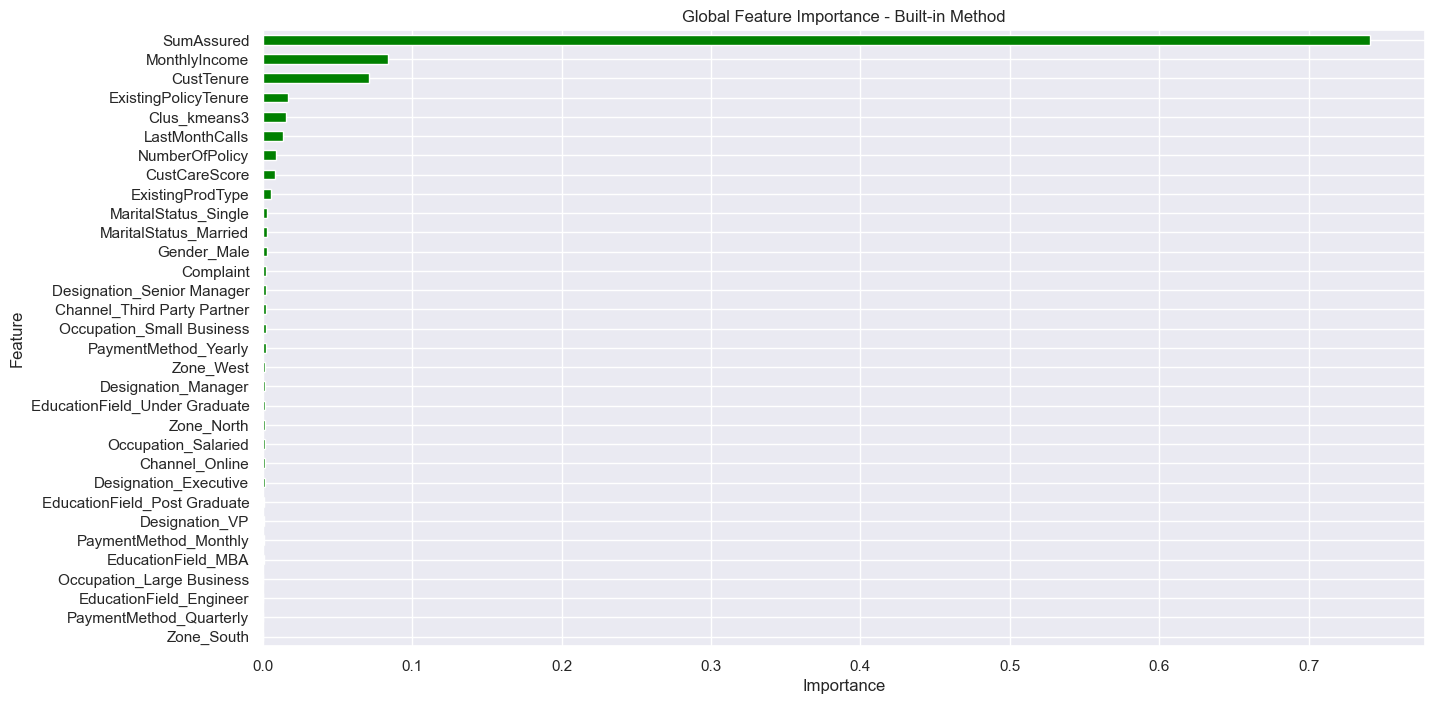

In [101]:
global_importances = pd.Series(rf.feature_importances_, index=X_train_copy.columns)
global_importances.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(15,8))
global_importances.plot.barh(color='green')
# plt.figure(figsize=(20,8))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")


In [102]:
b= {'Model': ['RandomForestRegressor'], 
               'MSE': [mse_rf], 
               'MAE': [mae_rf],
               'RMSE': [rmse_rf],
               'R2' :[r2_rf]
               }
Model_comparision = pd.DataFrame.from_dict(b)
print(Model_comparision)

                   Model           MSE         MAE        RMSE        R2
0  RandomForestRegressor  315162.51731  429.465434  561.393371  0.835642


In [103]:
import xgboost

In [104]:
xgb = xgboost.XGBRegressor(seed=42) 

In [105]:
xgb.fit(X_train_copy, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
y_test_pred_xgb = xgb.predict(X_test)

In [107]:
mse_xgb = mean_squared_error(y_true=y_test, y_pred=y_test_pred_xgb, squared=True)
print("The MSE of the model is", mse_xgb)
rmse_xgb = mean_squared_error(y_true=y_test, y_pred=y_test_pred_xgb, squared=False)
print("The RMSE of the model is", rmse_xgb)
mae_xgb = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_xgb)
print("The MAE of the model is", mae_xgb)
r2_xgb = r2_score(y_true=y_test, y_pred=y_test_pred_xgb)
print("The R2 of the model is:", r2_xgb)

The MSE of the model is 351309.51837777055
The RMSE of the model is 592.713690054288
The MAE of the model is 453.5307895896709
The R2 of the model is: 0.8167907382238166


In [108]:
# !pip install lightgbm

In [109]:
import lightgbm as lgb

In [110]:
# hyper_params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'regression',
#     'metric': ['l1','l2','rmse'],
#     'learning_rate': 0.005,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.7,
#     'bagging_freq': 10,
#     'verbose': 1,
#     "max_depth": 8,
#     "num_leaves": 128,  
#     "max_bin": 512,
#     "num_iterations": 100,
#     'device':'gpu',
#     'max_bin':255
# }

In [111]:
# gbm = lgb.LGBMRegressor(**hyper_params)
gbm = lgb.LGBMRegressor()

In [112]:
gbm.fit(X_train_copy, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
         )

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 3390, number of used features: 31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 4045.119469


LGBMRegressor()

In [113]:
y_test_pred_gbm = gbm.predict(X_test)

In [114]:
mse_gbm = mean_squared_error(y_true=y_test, y_pred=y_test_pred_gbm, squared=True)
print("The MSE of the model is", mse_gbm)
rmse_gbm = mean_squared_error(y_true=y_test, y_pred=y_test_pred_gbm, squared=False)
print("The RMSE of the model is", rmse_gbm)
mae_gbm = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_gbm)
print("The MAE of the model is", mae_gbm)
r2_gbm = r2_score(y_true=y_test, y_pred=y_test_pred_gbm)
print("The R2 of the model is:", r2_gbm)

The MSE of the model is 312044.38689102884
The RMSE of the model is 558.6093329788081
The MAE of the model is 430.6758921850999
The R2 of the model is: 0.8372676549508355


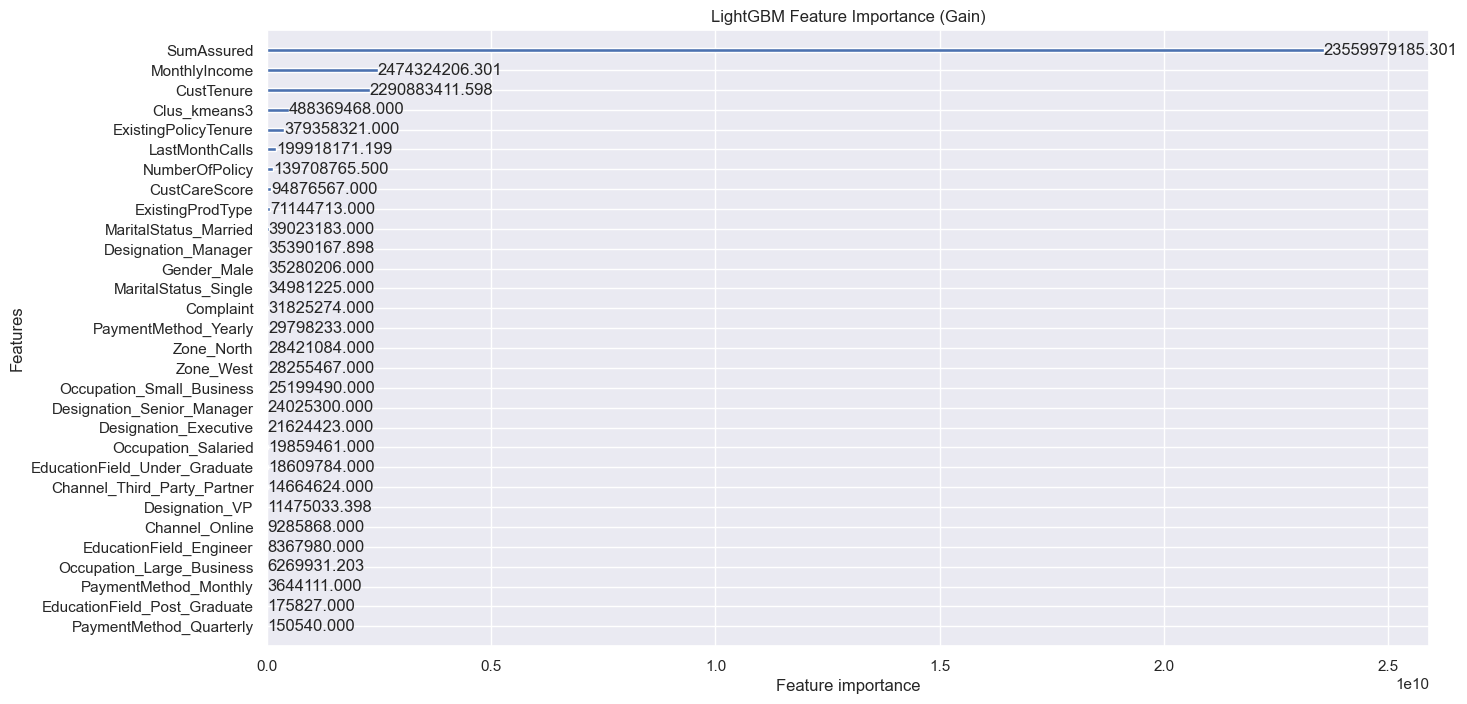

In [115]:
lgb.plot_importance(gbm, importance_type="gain", figsize=(15,8), title="LightGBM Feature Importance (Gain)")
plt.show()

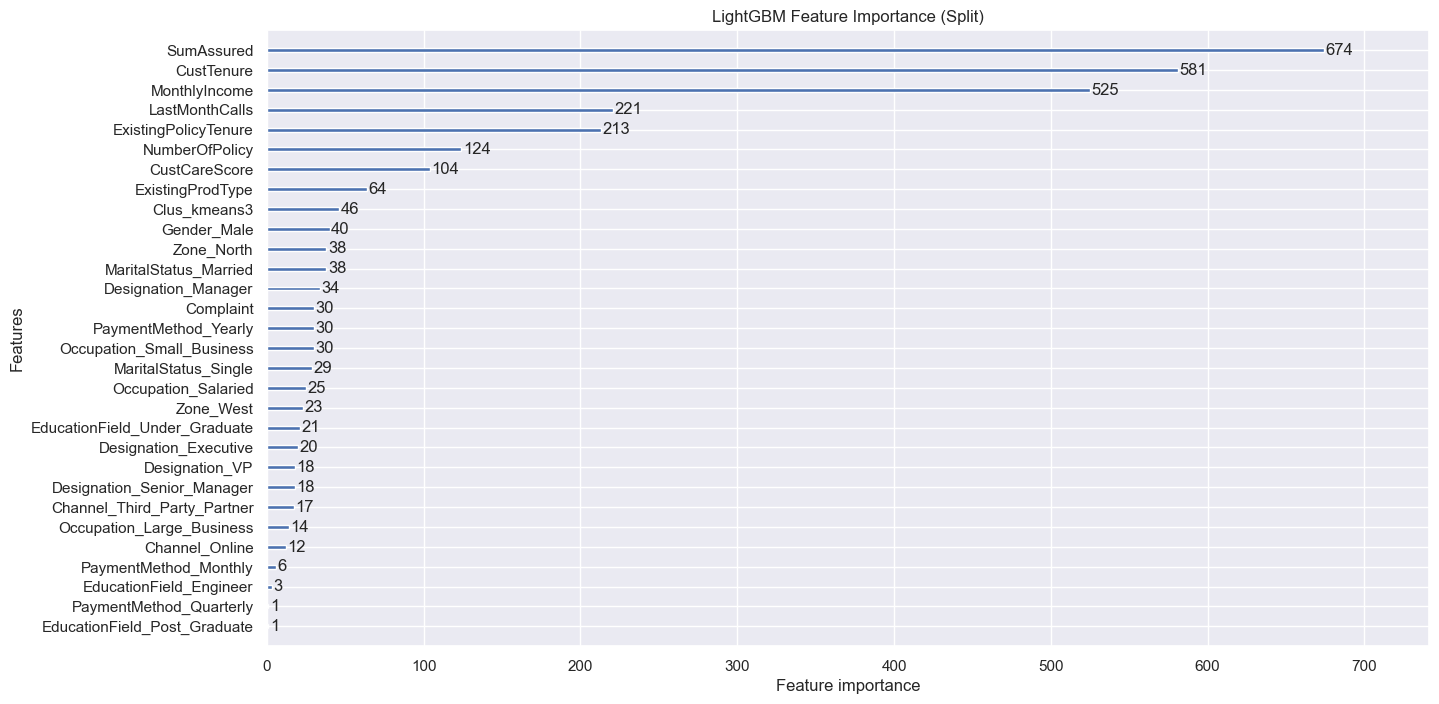

In [116]:
lgb.plot_importance(gbm, importance_type="split", figsize=(15,8), title="LightGBM Feature Importance (Split)")
plt.show()

In [117]:
Model_vanilla = pd.DataFrame(
    {
        "Model": ['Linear regression', 'Random_Forest','XGBoost','LightGBM'],
        "MSE": [mse,mse_rf,mse_xgb,mse_gbm],
        "MAE": [mae, mae_rf,mae_xgb,mae_gbm],
        "RMSE": [rmse,rmse_rf,rmse_xgb, rmse_gbm],
        "R2": [r2,r2_rf,r2_xgb, r2_gbm],
    }
)
Model_vanilla

Model            MSE         MAE        RMSE        R2
0  Linear regression  919855.683166  775.691120  959.091071  0.520292
1      Random_Forest  315162.517310  429.465434  561.393371  0.835642
2            XGBoost  351309.518378  453.530790  592.713690  0.816791
3           LightGBM  312044.386891  430.675892  558.609333  0.837268

In [594]:
# Define objective function
def objective_rf(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 1000, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 30)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 30)
    

    # Create and fit random forest model
    model_rf = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42,n_jobs = -1
    )
    model_rf.fit(X_train_copy, y_train)

    # Make predictions and calculate RMSE
    y_pred = model_rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return MAE
    return rmse

In [595]:
# Create study object
study = optuna.create_study(direction="minimize")

# Run optimization process
study.optimize(objective_rf, n_trials=300, show_progress_bar=True)

[I 2023-12-16 02:04:15,463] A new study created in memory with name: no-name-37a08dfe-fe61-45c2-888c-8f8340021e1b
Best trial: 0. Best value: 591.256:   0%|▏                                             | 1/300 [00:00<01:56,  2.57it/s]

[I 2023-12-16 02:04:15,852] Trial 0 finished with value: 591.2560289483848 and parameters: {'n_estimators': 197, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 30}. Best is trial 0 with value: 591.2560289483848.


Best trial: 1. Best value: 572.82:   1%|▎                                              | 2/300 [00:01<03:09,  1.57it/s]

[I 2023-12-16 02:04:16,662] Trial 1 finished with value: 572.8196598737895 and parameters: {'n_estimators': 383, 'max_depth': 12, 'min_samples_split': 26, 'min_samples_leaf': 15}. Best is trial 1 with value: 572.8196598737895.


Best trial: 1. Best value: 572.82:   1%|▋                                              | 4/300 [00:01<01:29,  3.32it/s]

[I 2023-12-16 02:04:16,847] Trial 2 finished with value: 745.4333418441076 and parameters: {'n_estimators': 140, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 24}. Best is trial 1 with value: 572.8196598737895.
[I 2023-12-16 02:04:16,949] Trial 3 finished with value: 662.8050236471289 and parameters: {'n_estimators': 58, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 30}. Best is trial 1 with value: 572.8196598737895.


Best trial: 4. Best value: 564.214:   2%|▉                                             | 6/300 [00:01<01:00,  4.83it/s]

[I 2023-12-16 02:04:17,072] Trial 4 finished with value: 564.2142798308275 and parameters: {'n_estimators': 31, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 4 with value: 564.2142798308275.
[I 2023-12-16 02:04:17,221] Trial 5 finished with value: 569.804271831483 and parameters: {'n_estimators': 53, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 11}. Best is trial 4 with value: 564.2142798308275.


Best trial: 4. Best value: 564.214:   2%|█                                             | 7/300 [00:01<01:00,  4.86it/s]

[I 2023-12-16 02:04:17,423] Trial 6 finished with value: 584.199512119152 and parameters: {'n_estimators': 96, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 24}. Best is trial 4 with value: 564.2142798308275.


Best trial: 4. Best value: 564.214:   3%|█▏                                            | 8/300 [00:03<02:33,  1.91it/s]

[I 2023-12-16 02:04:18,630] Trial 7 finished with value: 568.7001002730391 and parameters: {'n_estimators': 558, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 12}. Best is trial 4 with value: 564.2142798308275.
[I 2023-12-16 02:04:18,692] Trial 8 finished with value: 576.4853658200334 and parameters: {'n_estimators': 10, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 13}. Best is trial 4 with value: 564.2142798308275.


Best trial: 4. Best value: 564.214:   3%|█▌                                           | 10/300 [00:03<01:35,  3.05it/s]

[I 2023-12-16 02:04:18,853] Trial 9 finished with value: 565.7256579654812 and parameters: {'n_estimators': 57, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 8}. Best is trial 4 with value: 564.2142798308275.
[I 2023-12-16 02:04:18,942] Trial 10 finished with value: 573.6306002697119 and parameters: {'n_estimators': 17, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 4 with value: 564.2142798308275.


Best trial: 12. Best value: 563.815:   4%|█▉                                          | 13/300 [00:03<01:02,  4.61it/s]

[I 2023-12-16 02:04:19,088] Trial 11 finished with value: 563.8537432623083 and parameters: {'n_estimators': 34, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 11 with value: 563.8537432623083.
[I 2023-12-16 02:04:19,215] Trial 12 finished with value: 563.8147484056478 and parameters: {'n_estimators': 26, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 1}. Best is trial 12 with value: 563.8147484056478.


Best trial: 12. Best value: 563.815:   5%|██                                          | 14/300 [00:03<00:54,  5.25it/s]

[I 2023-12-16 02:04:19,325] Trial 13 finished with value: 566.472505030399 and parameters: {'n_estimators': 23, 'max_depth': 16, 'min_samples_split': 21, 'min_samples_leaf': 1}. Best is trial 12 with value: 563.8147484056478.
[I 2023-12-16 02:04:19,402] Trial 14 finished with value: 567.8594460503306 and parameters: {'n_estimators': 10, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 6}. Best is trial 12 with value: 563.8147484056478.


Best trial: 12. Best value: 563.815:   6%|██▍                                         | 17/300 [00:04<00:40,  6.97it/s]

[I 2023-12-16 02:04:19,523] Trial 15 finished with value: 578.6945925562698 and parameters: {'n_estimators': 35, 'max_depth': 20, 'min_samples_split': 30, 'min_samples_leaf': 19}. Best is trial 12 with value: 563.8147484056478.
[I 2023-12-16 02:04:19,633] Trial 16 finished with value: 566.1286726946046 and parameters: {'n_estimators': 19, 'max_depth': 16, 'min_samples_split': 24, 'min_samples_leaf': 4}. Best is trial 12 with value: 563.8147484056478.


Best trial: 12. Best value: 563.815:   6%|██▋                                         | 18/300 [00:04<00:39,  7.07it/s]

[I 2023-12-16 02:04:19,769] Trial 17 finished with value: 566.4485127771302 and parameters: {'n_estimators': 35, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 12 with value: 563.8147484056478.


Best trial: 18. Best value: 559.676:   6%|██▊                                         | 19/300 [00:04<00:48,  5.81it/s]

[I 2023-12-16 02:04:20,028] Trial 18 finished with value: 559.6757532101881 and parameters: {'n_estimators': 81, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 18 with value: 559.6757532101881.


Best trial: 18. Best value: 559.676:   7%|██▉                                         | 20/300 [00:04<00:51,  5.42it/s]

[I 2023-12-16 02:04:20,245] Trial 19 finished with value: 577.3765710730746 and parameters: {'n_estimators': 90, 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 18}. Best is trial 18 with value: 559.6757532101881.


Best trial: 18. Best value: 559.676:   7%|███                                         | 21/300 [00:05<01:03,  4.43it/s]

[I 2023-12-16 02:04:20,581] Trial 20 finished with value: 594.6754375575979 and parameters: {'n_estimators': 198, 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 18 with value: 559.6757532101881.


Best trial: 18. Best value: 559.676:   7%|███▏                                        | 22/300 [00:05<01:01,  4.49it/s]

[I 2023-12-16 02:04:20,795] Trial 21 finished with value: 561.2840535268404 and parameters: {'n_estimators': 65, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 18 with value: 559.6757532101881.


Best trial: 18. Best value: 559.676:   8%|███▎                                        | 23/300 [00:05<01:01,  4.48it/s]

[I 2023-12-16 02:04:21,020] Trial 22 finished with value: 563.5470489001914 and parameters: {'n_estimators': 73, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 7}. Best is trial 18 with value: 559.6757532101881.


Best trial: 18. Best value: 559.676:   8%|███▌                                        | 24/300 [00:05<01:02,  4.42it/s]

[I 2023-12-16 02:04:21,252] Trial 23 finished with value: 563.9560377403766 and parameters: {'n_estimators': 76, 'max_depth': 20, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 18 with value: 559.6757532101881.


Best trial: 18. Best value: 559.676:   8%|███▋                                        | 25/300 [00:06<01:10,  3.88it/s]

[I 2023-12-16 02:04:21,587] Trial 24 finished with value: 562.1155143014134 and parameters: {'n_estimators': 115, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 6}. Best is trial 18 with value: 559.6757532101881.


Best trial: 25. Best value: 559.106:   9%|███▊                                        | 26/300 [00:06<01:19,  3.47it/s]

[I 2023-12-16 02:04:21,947] Trial 25 finished with value: 559.1058746420699 and parameters: {'n_estimators': 136, 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 4}. Best is trial 25 with value: 559.1058746420699.


Best trial: 25. Best value: 559.106:   9%|███▉                                        | 27/300 [00:06<01:22,  3.30it/s]

[I 2023-12-16 02:04:22,286] Trial 26 finished with value: 560.9476110822427 and parameters: {'n_estimators': 131, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 3}. Best is trial 25 with value: 559.1058746420699.


Best trial: 25. Best value: 559.106:   9%|████                                        | 28/300 [00:07<01:42,  2.66it/s]

[I 2023-12-16 02:04:22,830] Trial 27 finished with value: 565.8135022383316 and parameters: {'n_estimators': 232, 'max_depth': 10, 'min_samples_split': 23, 'min_samples_leaf': 10}. Best is trial 25 with value: 559.1058746420699.


Best trial: 25. Best value: 559.106:  10%|████▎                                       | 29/300 [00:07<01:33,  2.91it/s]

[I 2023-12-16 02:04:23,099] Trial 28 finished with value: 573.3640408464837 and parameters: {'n_estimators': 116, 'max_depth': 7, 'min_samples_split': 17, 'min_samples_leaf': 3}. Best is trial 25 with value: 559.1058746420699.


Best trial: 25. Best value: 559.106:  10%|████▍                                       | 30/300 [00:07<01:32,  2.93it/s]

[I 2023-12-16 02:04:23,434] Trial 29 finished with value: 573.7874511825473 and parameters: {'n_estimators': 158, 'max_depth': 7, 'min_samples_split': 22, 'min_samples_leaf': 3}. Best is trial 25 with value: 559.1058746420699.


Best trial: 25. Best value: 559.106:  10%|████▌                                       | 31/300 [00:08<01:47,  2.49it/s]

[I 2023-12-16 02:04:23,976] Trial 30 finished with value: 572.3593836822721 and parameters: {'n_estimators': 253, 'max_depth': 10, 'min_samples_split': 26, 'min_samples_leaf': 14}. Best is trial 25 with value: 559.1058746420699.


Best trial: 25. Best value: 559.106:  11%|████▋                                       | 32/300 [00:08<01:43,  2.59it/s]

[I 2023-12-16 02:04:24,327] Trial 31 finished with value: 564.7275869881826 and parameters: {'n_estimators': 155, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 5}. Best is trial 25 with value: 559.1058746420699.


Best trial: 32. Best value: 556.222:  11%|████▊                                       | 33/300 [00:09<02:18,  1.93it/s]

[I 2023-12-16 02:04:25,151] Trial 32 finished with value: 556.2219158888305 and parameters: {'n_estimators': 316, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 32 with value: 556.2219158888305.


Best trial: 32. Best value: 556.222:  11%|████▉                                       | 34/300 [00:10<02:46,  1.60it/s]

[I 2023-12-16 02:04:26,029] Trial 33 finished with value: 556.3644793915893 and parameters: {'n_estimators': 321, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 32 with value: 556.2219158888305.


Best trial: 34. Best value: 555.417:  12%|█████▏                                      | 35/300 [00:11<03:24,  1.30it/s]

[I 2023-12-16 02:04:27,140] Trial 34 finished with value: 555.4170332243024 and parameters: {'n_estimators': 394, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  12%|█████▎                                      | 36/300 [00:12<03:32,  1.24it/s]

[I 2023-12-16 02:04:28,030] Trial 35 finished with value: 559.0543628495361 and parameters: {'n_estimators': 361, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  12%|█████▍                                      | 37/300 [00:13<03:34,  1.23it/s]

[I 2023-12-16 02:04:28,863] Trial 36 finished with value: 561.1732596503086 and parameters: {'n_estimators': 346, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  13%|█████▌                                      | 38/300 [00:15<04:45,  1.09s/it]

[I 2023-12-16 02:04:30,599] Trial 37 finished with value: 575.6456553961189 and parameters: {'n_estimators': 877, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 17}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  13%|█████▋                                      | 39/300 [00:15<04:16,  1.02it/s]

[I 2023-12-16 02:04:31,332] Trial 38 finished with value: 589.3721685192545 and parameters: {'n_estimators': 408, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 29}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  13%|█████▊                                      | 40/300 [00:16<03:56,  1.10it/s]

[I 2023-12-16 02:04:32,068] Trial 39 finished with value: 565.1186298370899 and parameters: {'n_estimators': 314, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  14%|██████                                      | 41/300 [00:17<03:41,  1.17it/s]

[I 2023-12-16 02:04:32,796] Trial 40 finished with value: 600.0994016756654 and parameters: {'n_estimators': 467, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 21}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  14%|██████▏                                     | 42/300 [00:18<03:27,  1.24it/s]

[I 2023-12-16 02:04:33,480] Trial 41 finished with value: 559.0548913292442 and parameters: {'n_estimators': 278, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 5}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  14%|██████▎                                     | 43/300 [00:18<03:21,  1.27it/s]

[I 2023-12-16 02:04:34,222] Trial 42 finished with value: 559.6387782283341 and parameters: {'n_estimators': 282, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 34 with value: 555.4170332243024.


Best trial: 34. Best value: 555.417:  15%|██████▍                                     | 44/300 [00:20<04:01,  1.06it/s]

[I 2023-12-16 02:04:35,531] Trial 43 finished with value: 556.2164265253203 and parameters: {'n_estimators': 503, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 34 with value: 555.4170332243024.


Best trial: 44. Best value: 555.198:  15%|██████▌                                     | 45/300 [00:21<04:53,  1.15s/it]

[I 2023-12-16 02:04:37,167] Trial 44 finished with value: 555.1980499422529 and parameters: {'n_estimators': 548, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 44 with value: 555.1980499422529.


Best trial: 44. Best value: 555.198:  15%|██████▋                                     | 46/300 [00:23<05:21,  1.27s/it]

[I 2023-12-16 02:04:38,703] Trial 45 finished with value: 556.2572922141438 and parameters: {'n_estimators': 553, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 44 with value: 555.1980499422529.


Best trial: 44. Best value: 555.198:  16%|██████▉                                     | 47/300 [00:25<05:58,  1.42s/it]

[I 2023-12-16 02:04:40,476] Trial 46 finished with value: 555.2281950191749 and parameters: {'n_estimators': 613, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 44 with value: 555.1980499422529.


Best trial: 44. Best value: 555.198:  16%|███████                                     | 48/300 [00:27<06:53,  1.64s/it]

[I 2023-12-16 02:04:42,637] Trial 47 finished with value: 555.2353260511924 and parameters: {'n_estimators': 666, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 44 with value: 555.1980499422529.


Best trial: 48. Best value: 555.181:  16%|███████▏                                    | 49/300 [00:29<07:58,  1.91s/it]

[I 2023-12-16 02:04:45,169] Trial 48 finished with value: 555.1808109077002 and parameters: {'n_estimators': 774, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  17%|███████▎                                    | 50/300 [00:33<09:41,  2.33s/it]

[I 2023-12-16 02:04:48,474] Trial 49 finished with value: 555.8212228810019 and parameters: {'n_estimators': 803, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  17%|███████▍                                    | 51/300 [00:34<08:43,  2.10s/it]

[I 2023-12-16 02:04:50,047] Trial 50 finished with value: 568.9612305191616 and parameters: {'n_estimators': 674, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 12}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  17%|███████▋                                    | 52/300 [00:38<11:15,  2.72s/it]

[I 2023-12-16 02:04:54,223] Trial 51 finished with value: 555.5790550839897 and parameters: {'n_estimators': 944, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  18%|███████▊                                    | 53/300 [00:42<11:54,  2.89s/it]

[I 2023-12-16 02:04:57,512] Trial 52 finished with value: 555.6226191994895 and parameters: {'n_estimators': 983, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  18%|███████▉                                    | 54/300 [00:43<10:40,  2.60s/it]

[I 2023-12-16 02:04:59,437] Trial 53 finished with value: 556.1894724604792 and parameters: {'n_estimators': 689, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  18%|████████                                    | 55/300 [00:45<09:49,  2.41s/it]

[I 2023-12-16 02:05:01,384] Trial 54 finished with value: 555.5075759162785 and parameters: {'n_estimators': 646, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  19%|████████▏                                   | 56/300 [00:47<09:09,  2.25s/it]

[I 2023-12-16 02:05:03,272] Trial 55 finished with value: 555.636613777234 and parameters: {'n_estimators': 646, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  19%|████████▎                                   | 57/300 [00:49<07:58,  1.97s/it]

[I 2023-12-16 02:05:04,578] Trial 56 finished with value: 559.1040718906612 and parameters: {'n_estimators': 470, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  19%|████████▌                                   | 58/300 [00:50<07:42,  1.91s/it]

[I 2023-12-16 02:05:06,364] Trial 57 finished with value: 555.7966289353054 and parameters: {'n_estimators': 601, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  20%|████████▋                                   | 59/300 [00:52<07:31,  1.88s/it]

[I 2023-12-16 02:05:08,151] Trial 58 finished with value: 561.6555948344306 and parameters: {'n_estimators': 764, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  20%|████████▊                                   | 60/300 [00:54<06:54,  1.73s/it]

[I 2023-12-16 02:05:09,531] Trial 59 finished with value: 585.4846512604437 and parameters: {'n_estimators': 762, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 26}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  20%|████████▉                                   | 61/300 [00:55<06:49,  1.71s/it]

[I 2023-12-16 02:05:11,209] Trial 60 finished with value: 558.0202632926477 and parameters: {'n_estimators': 565, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  21%|█████████                                   | 62/300 [00:59<09:21,  2.36s/it]

[I 2023-12-16 02:05:15,084] Trial 61 finished with value: 555.3055542921021 and parameters: {'n_estimators': 975, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  21%|█████████▏                                  | 63/300 [01:02<09:32,  2.41s/it]

[I 2023-12-16 02:05:17,622] Trial 62 finished with value: 555.4316106665776 and parameters: {'n_estimators': 817, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  21%|█████████▍                                  | 64/300 [01:04<09:27,  2.40s/it]

[I 2023-12-16 02:05:20,003] Trial 63 finished with value: 556.7497496942034 and parameters: {'n_estimators': 825, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  22%|█████████▌                                  | 65/300 [01:07<10:12,  2.61s/it]

[I 2023-12-16 02:05:23,087] Trial 64 finished with value: 555.51338605094 and parameters: {'n_estimators': 992, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  22%|█████████▋                                  | 66/300 [01:09<08:50,  2.27s/it]

[I 2023-12-16 02:05:24,558] Trial 65 finished with value: 556.2980675325664 and parameters: {'n_estimators': 432, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  22%|█████████▊                                  | 67/300 [01:11<08:26,  2.17s/it]

[I 2023-12-16 02:05:26,514] Trial 66 finished with value: 556.1834580377044 and parameters: {'n_estimators': 531, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  23%|█████████▉                                  | 68/300 [01:12<08:01,  2.08s/it]

[I 2023-12-16 02:05:28,361] Trial 67 finished with value: 560.5995805583773 and parameters: {'n_estimators': 739, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 48 with value: 555.1808109077002.


Best trial: 48. Best value: 555.181:  23%|██████████                                  | 69/300 [01:15<08:16,  2.15s/it]

[I 2023-12-16 02:05:30,682] Trial 68 finished with value: 555.9133873652396 and parameters: {'n_estimators': 861, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 48 with value: 555.1808109077002.


Best trial: 69. Best value: 555.139:  23%|██████████▎                                 | 70/300 [01:17<07:52,  2.05s/it]

[I 2023-12-16 02:05:32,514] Trial 69 finished with value: 555.1389901940038 and parameters: {'n_estimators': 600, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  24%|██████████▍                                 | 71/300 [01:18<06:44,  1.77s/it]

[I 2023-12-16 02:05:33,610] Trial 70 finished with value: 558.721674819064 and parameters: {'n_estimators': 407, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  24%|██████████▌                                 | 72/300 [01:19<06:47,  1.79s/it]

[I 2023-12-16 02:05:35,448] Trial 71 finished with value: 555.5351608504096 and parameters: {'n_estimators': 584, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  24%|██████████▋                                 | 73/300 [01:22<07:49,  2.07s/it]

[I 2023-12-16 02:05:38,167] Trial 72 finished with value: 555.517136961009 and parameters: {'n_estimators': 698, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  25%|██████████▊                                 | 74/300 [01:24<07:21,  1.95s/it]

[I 2023-12-16 02:05:39,848] Trial 73 finished with value: 555.2841957020473 and parameters: {'n_estimators': 469, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  25%|███████████                                 | 75/300 [01:25<06:53,  1.84s/it]

[I 2023-12-16 02:05:41,421] Trial 74 finished with value: 555.5507962081949 and parameters: {'n_estimators': 472, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  25%|███████████▏                                | 76/300 [01:27<06:45,  1.81s/it]

[I 2023-12-16 02:05:43,169] Trial 75 finished with value: 556.7213309097776 and parameters: {'n_estimators': 606, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  26%|███████████▎                                | 77/300 [01:29<06:41,  1.80s/it]

[I 2023-12-16 02:05:44,952] Trial 76 finished with value: 555.4224791700212 and parameters: {'n_estimators': 519, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  26%|███████████▍                                | 78/300 [01:30<06:16,  1.69s/it]

[I 2023-12-16 02:05:46,396] Trial 77 finished with value: 556.1873896983146 and parameters: {'n_estimators': 380, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  26%|███████████▌                                | 79/300 [01:33<06:40,  1.81s/it]

[I 2023-12-16 02:05:48,481] Trial 78 finished with value: 556.2558619138099 and parameters: {'n_estimators': 719, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  27%|███████████▋                                | 80/300 [01:34<06:06,  1.67s/it]

[I 2023-12-16 02:05:49,809] Trial 79 finished with value: 556.181435756842 and parameters: {'n_estimators': 458, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  27%|███████████▉                                | 81/300 [01:35<05:33,  1.52s/it]

[I 2023-12-16 02:05:50,996] Trial 80 finished with value: 563.0934382192278 and parameters: {'n_estimators': 527, 'max_depth': 12, 'min_samples_split': 30, 'min_samples_leaf': 6}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  27%|████████████                                | 82/300 [01:37<05:39,  1.56s/it]

[I 2023-12-16 02:05:52,627] Trial 81 finished with value: 555.1478882743824 and parameters: {'n_estimators': 502, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  28%|████████████▏                               | 83/300 [01:37<04:28,  1.24s/it]

[I 2023-12-16 02:05:53,116] Trial 82 finished with value: 746.6356017606379 and parameters: {'n_estimators': 403, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 69 with value: 555.1389901940038.


Best trial: 69. Best value: 555.139:  28%|████████████▎                               | 84/300 [01:39<05:16,  1.46s/it]

[I 2023-12-16 02:05:55,111] Trial 83 finished with value: 555.2683419069206 and parameters: {'n_estimators': 641, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 69 with value: 555.1389901940038.


Best trial: 84. Best value: 555.03:  28%|████████████▊                                | 85/300 [01:42<06:36,  1.84s/it]

[I 2023-12-16 02:05:57,838] Trial 84 finished with value: 555.0300687874069 and parameters: {'n_estimators': 902, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  29%|████████████▉                                | 86/300 [01:44<06:38,  1.86s/it]

[I 2023-12-16 02:05:59,740] Trial 85 finished with value: 555.212264035397 and parameters: {'n_estimators': 623, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  29%|█████████████                                | 87/300 [01:45<06:26,  1.81s/it]

[I 2023-12-16 02:06:01,445] Trial 86 finished with value: 558.1712677655532 and parameters: {'n_estimators': 631, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  29%|█████████████▏                               | 88/300 [01:48<07:07,  2.01s/it]

[I 2023-12-16 02:06:03,930] Trial 87 finished with value: 555.7472646570288 and parameters: {'n_estimators': 889, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  30%|█████████████▎                               | 89/300 [01:50<07:09,  2.04s/it]

[I 2023-12-16 02:06:06,018] Trial 88 finished with value: 555.499639512872 and parameters: {'n_estimators': 692, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  30%|█████████████▌                               | 90/300 [01:52<06:33,  1.87s/it]

[I 2023-12-16 02:06:07,513] Trial 89 finished with value: 559.0857545939036 and parameters: {'n_estimators': 590, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  30%|█████████████▋                               | 91/300 [01:53<06:03,  1.74s/it]

[I 2023-12-16 02:06:08,933] Trial 90 finished with value: 579.7560524821291 and parameters: {'n_estimators': 749, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 21}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  31%|█████████████▊                               | 92/300 [01:55<05:55,  1.71s/it]

[I 2023-12-16 02:06:10,573] Trial 91 finished with value: 555.5386002855745 and parameters: {'n_estimators': 504, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  31%|█████████████▉                               | 93/300 [01:58<07:07,  2.06s/it]

[I 2023-12-16 02:06:13,464] Trial 92 finished with value: 555.2717099859929 and parameters: {'n_estimators': 876, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  31%|██████████████                               | 94/300 [02:00<07:24,  2.16s/it]

[I 2023-12-16 02:06:15,844] Trial 93 finished with value: 556.5518950144155 and parameters: {'n_estimators': 830, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  32%|██████████████▎                              | 95/300 [02:03<07:51,  2.30s/it]

[I 2023-12-16 02:06:18,467] Trial 94 finished with value: 555.3110129344982 and parameters: {'n_estimators': 906, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  32%|██████████████▍                              | 96/300 [02:04<07:18,  2.15s/it]

[I 2023-12-16 02:06:20,262] Trial 95 finished with value: 555.9304097387603 and parameters: {'n_estimators': 659, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  32%|██████████████▌                              | 97/300 [02:06<07:15,  2.14s/it]

[I 2023-12-16 02:06:22,397] Trial 96 finished with value: 558.1372178089559 and parameters: {'n_estimators': 775, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  33%|██████████████▋                              | 98/300 [02:08<06:47,  2.02s/it]

[I 2023-12-16 02:06:24,117] Trial 97 finished with value: 555.839929166475 and parameters: {'n_estimators': 577, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  33%|██████████████▊                              | 99/300 [02:11<07:31,  2.25s/it]

[I 2023-12-16 02:06:26,907] Trial 98 finished with value: 555.2583873846712 and parameters: {'n_estimators': 861, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  33%|██████████████▋                             | 100/300 [02:13<07:15,  2.18s/it]

[I 2023-12-16 02:06:28,920] Trial 99 finished with value: 555.9436609385967 and parameters: {'n_estimators': 728, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  34%|██████████████▊                             | 101/300 [02:15<06:37,  2.00s/it]

[I 2023-12-16 02:06:30,497] Trial 100 finished with value: 560.842983947437 and parameters: {'n_estimators': 638, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  34%|██████████████▉                             | 102/300 [02:16<06:25,  1.95s/it]

[I 2023-12-16 02:06:32,334] Trial 101 finished with value: 574.5733134289611 and parameters: {'n_estimators': 891, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 16}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  34%|███████████████                             | 103/300 [02:19<07:10,  2.19s/it]

[I 2023-12-16 02:06:35,073] Trial 102 finished with value: 555.0461819822566 and parameters: {'n_estimators': 890, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  35%|███████████████▎                            | 104/300 [02:22<08:03,  2.47s/it]

[I 2023-12-16 02:06:38,197] Trial 103 finished with value: 555.6125010311864 and parameters: {'n_estimators': 997, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  35%|███████████████▍                            | 105/300 [02:25<07:50,  2.41s/it]

[I 2023-12-16 02:06:40,481] Trial 104 finished with value: 556.0462305182981 and parameters: {'n_estimators': 810, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  35%|███████████████▌                            | 106/300 [02:26<07:07,  2.20s/it]

[I 2023-12-16 02:06:42,191] Trial 105 finished with value: 555.2222816865476 and parameters: {'n_estimators': 557, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  36%|███████████████▋                            | 107/300 [02:28<06:25,  2.00s/it]

[I 2023-12-16 02:06:43,706] Trial 106 finished with value: 558.1584410123533 and parameters: {'n_estimators': 547, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  36%|███████████████▊                            | 108/300 [02:30<06:26,  2.01s/it]

[I 2023-12-16 02:06:45,754] Trial 107 finished with value: 556.136264800253 and parameters: {'n_estimators': 703, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 84 with value: 555.0300687874069.


Best trial: 84. Best value: 555.03:  36%|███████████████▉                            | 109/300 [02:33<07:07,  2.24s/it]

[I 2023-12-16 02:06:48,513] Trial 108 finished with value: 555.0478803341441 and parameters: {'n_estimators': 788, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 84 with value: 555.0300687874069.


Best trial: 109. Best value: 554.941:  37%|███████████████▍                          | 110/300 [02:35<06:52,  2.17s/it]

[I 2023-12-16 02:06:50,539] Trial 109 finished with value: 554.9412633253265 and parameters: {'n_estimators': 573, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 109 with value: 554.9412633253265.


Best trial: 109. Best value: 554.941:  37%|███████████████▌                          | 111/300 [02:35<05:18,  1.69s/it]

[I 2023-12-16 02:06:51,092] Trial 110 finished with value: 662.2017030721178 and parameters: {'n_estimators': 432, 'max_depth': 3, 'min_samples_split': 28, 'min_samples_leaf': 1}. Best is trial 109 with value: 554.9412633253265.


Best trial: 111. Best value: 554.939:  37%|███████████████▋                          | 112/300 [02:37<05:32,  1.77s/it]

[I 2023-12-16 02:06:53,047] Trial 111 finished with value: 554.9389785852313 and parameters: {'n_estimators': 550, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 111 with value: 554.9389785852313.


Best trial: 112. Best value: 554.793:  38%|███████████████▊                          | 113/300 [02:39<05:49,  1.87s/it]

[I 2023-12-16 02:06:55,147] Trial 112 finished with value: 554.7930107884887 and parameters: {'n_estimators': 546, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 112 with value: 554.7930107884887.


Best trial: 112. Best value: 554.793:  38%|███████████████▉                          | 114/300 [02:41<05:50,  1.89s/it]

[I 2023-12-16 02:06:57,077] Trial 113 finished with value: 554.891181816593 and parameters: {'n_estimators': 511, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 112 with value: 554.7930107884887.


Best trial: 112. Best value: 554.793:  38%|████████████████                          | 115/300 [02:43<05:56,  1.92s/it]

[I 2023-12-16 02:06:59,092] Trial 114 finished with value: 554.8885302457446 and parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 112 with value: 554.7930107884887.


Best trial: 112. Best value: 554.793:  39%|████████████████▏                         | 116/300 [02:45<05:44,  1.87s/it]

[I 2023-12-16 02:07:00,845] Trial 115 finished with value: 555.0375562294172 and parameters: {'n_estimators': 502, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 112 with value: 554.7930107884887.


Best trial: 116. Best value: 554.604:  39%|████████████████▍                         | 117/300 [02:46<05:16,  1.73s/it]

[I 2023-12-16 02:07:02,243] Trial 116 finished with value: 554.6037566539773 and parameters: {'n_estimators': 366, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 116 with value: 554.6037566539773.


Best trial: 117. Best value: 554.132:  39%|████████████████▌                         | 118/300 [02:47<04:45,  1.57s/it]

[I 2023-12-16 02:07:03,435] Trial 117 finished with value: 554.1315253749569 and parameters: {'n_estimators': 352, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 117 with value: 554.1315253749569.


Best trial: 118. Best value: 553.991:  40%|████████████████▋                         | 119/300 [02:49<04:20,  1.44s/it]

[I 2023-12-16 02:07:04,575] Trial 118 finished with value: 553.9906144604969 and parameters: {'n_estimators': 338, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  40%|████████████████▊                         | 120/300 [02:50<04:06,  1.37s/it]

[I 2023-12-16 02:07:05,781] Trial 119 finished with value: 554.0754108728572 and parameters: {'n_estimators': 351, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  40%|████████████████▉                         | 121/300 [02:51<03:56,  1.32s/it]

[I 2023-12-16 02:07:06,979] Trial 120 finished with value: 554.1315253749569 and parameters: {'n_estimators': 352, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  41%|█████████████████                         | 122/300 [02:52<03:46,  1.27s/it]

[I 2023-12-16 02:07:08,144] Trial 121 finished with value: 554.0733026986849 and parameters: {'n_estimators': 349, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  41%|█████████████████▏                        | 123/300 [02:53<03:41,  1.25s/it]

[I 2023-12-16 02:07:09,344] Trial 122 finished with value: 554.1734990249013 and parameters: {'n_estimators': 354, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  41%|█████████████████▎                        | 124/300 [02:54<03:25,  1.17s/it]

[I 2023-12-16 02:07:10,320] Trial 123 finished with value: 555.7230395458477 and parameters: {'n_estimators': 337, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  42%|█████████████████▌                        | 125/300 [02:56<03:36,  1.24s/it]

[I 2023-12-16 02:07:11,714] Trial 124 finished with value: 554.1056551857131 and parameters: {'n_estimators': 379, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  42%|█████████████████▋                        | 126/300 [02:57<03:30,  1.21s/it]

[I 2023-12-16 02:07:12,867] Trial 125 finished with value: 554.309910696622 and parameters: {'n_estimators': 343, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  42%|█████████████████▊                        | 127/300 [02:58<03:30,  1.22s/it]

[I 2023-12-16 02:07:14,093] Trial 126 finished with value: 554.3859238576905 and parameters: {'n_estimators': 364, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  43%|█████████████████▉                        | 128/300 [02:59<03:30,  1.23s/it]

[I 2023-12-16 02:07:15,343] Trial 127 finished with value: 554.3820300488275 and parameters: {'n_estimators': 365, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  43%|██████████████████                        | 129/300 [03:01<03:29,  1.22s/it]

[I 2023-12-16 02:07:16,561] Trial 128 finished with value: 554.3007200810595 and parameters: {'n_estimators': 366, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  43%|██████████████████▏                       | 130/300 [03:02<03:13,  1.14s/it]

[I 2023-12-16 02:07:17,500] Trial 129 finished with value: 555.8902259794711 and parameters: {'n_estimators': 307, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  44%|██████████████████▎                       | 131/300 [03:03<03:10,  1.13s/it]

[I 2023-12-16 02:07:18,601] Trial 130 finished with value: 554.1765306828913 and parameters: {'n_estimators': 358, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  44%|██████████████████▍                       | 132/300 [03:04<03:16,  1.17s/it]

[I 2023-12-16 02:07:19,869] Trial 131 finished with value: 554.3491277944983 and parameters: {'n_estimators': 362, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  44%|██████████████████▌                       | 133/300 [03:05<03:18,  1.19s/it]

[I 2023-12-16 02:07:21,098] Trial 132 finished with value: 554.4348716539566 and parameters: {'n_estimators': 370, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  45%|██████████████████▊                       | 134/300 [03:06<03:12,  1.16s/it]

[I 2023-12-16 02:07:22,198] Trial 133 finished with value: 554.1415288967037 and parameters: {'n_estimators': 349, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  45%|██████████████████▉                       | 135/300 [03:07<02:56,  1.07s/it]

[I 2023-12-16 02:07:23,064] Trial 134 finished with value: 556.805467548734 and parameters: {'n_estimators': 338, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  45%|███████████████████                       | 136/300 [03:08<02:47,  1.02s/it]

[I 2023-12-16 02:07:23,966] Trial 135 finished with value: 554.6632617098126 and parameters: {'n_estimators': 289, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  46%|███████████████████▏                      | 137/300 [03:09<02:46,  1.02s/it]

[I 2023-12-16 02:07:24,993] Trial 136 finished with value: 554.3848623947105 and parameters: {'n_estimators': 312, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  46%|███████████████████▎                      | 138/300 [03:10<02:35,  1.04it/s]

[I 2023-12-16 02:07:25,803] Trial 137 finished with value: 556.5074984531101 and parameters: {'n_estimators': 258, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  46%|███████████████████▍                      | 139/300 [03:11<02:42,  1.01s/it]

[I 2023-12-16 02:07:26,932] Trial 138 finished with value: 554.3843584163054 and parameters: {'n_estimators': 315, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 118 with value: 553.9906144604969.


Best trial: 118. Best value: 553.991:  47%|███████████████████▌                      | 140/300 [03:12<02:36,  1.02it/s]

[I 2023-12-16 02:07:27,838] Trial 139 finished with value: 585.6293649248305 and parameters: {'n_estimators': 395, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 26}. Best is trial 118 with value: 553.9906144604969.


Best trial: 140. Best value: 553.931:  47%|███████████████████▋                      | 141/300 [03:13<02:44,  1.04s/it]

[I 2023-12-16 02:07:29,013] Trial 140 finished with value: 553.9312215942862 and parameters: {'n_estimators': 343, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 140 with value: 553.9312215942862.


Best trial: 140. Best value: 553.931:  47%|███████████████████▉                      | 142/300 [03:14<02:34,  1.03it/s]

[I 2023-12-16 02:07:29,842] Trial 141 finished with value: 571.9127262568912 and parameters: {'n_estimators': 340, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 14}. Best is trial 140 with value: 553.9312215942862.


Best trial: 140. Best value: 553.931:  48%|████████████████████                      | 143/300 [03:15<02:34,  1.01it/s]

[I 2023-12-16 02:07:30,856] Trial 142 finished with value: 554.7352119422111 and parameters: {'n_estimators': 287, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 140 with value: 553.9312215942862.


Best trial: 140. Best value: 553.931:  48%|████████████████████▏                     | 144/300 [03:16<03:00,  1.16s/it]

[I 2023-12-16 02:07:32,403] Trial 143 finished with value: 554.4579599420978 and parameters: {'n_estimators': 416, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 140 with value: 553.9312215942862.


Best trial: 144. Best value: 553.764:  48%|████████████████████▎                     | 145/300 [03:18<03:00,  1.17s/it]

[I 2023-12-16 02:07:33,595] Trial 144 finished with value: 553.7643761738373 and parameters: {'n_estimators': 329, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  49%|████████████████████▍                     | 146/300 [03:18<02:41,  1.05s/it]

[I 2023-12-16 02:07:34,373] Trial 145 finished with value: 555.807252287985 and parameters: {'n_estimators': 259, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  49%|████████████████████▌                     | 147/300 [03:19<02:25,  1.05it/s]

[I 2023-12-16 02:07:35,105] Trial 146 finished with value: 554.9131145164118 and parameters: {'n_estimators': 232, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  49%|████████████████████▋                     | 148/300 [03:20<02:28,  1.02it/s]

[I 2023-12-16 02:07:36,141] Trial 147 finished with value: 555.6229111651863 and parameters: {'n_estimators': 354, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  50%|████████████████████▊                     | 149/300 [03:21<02:39,  1.05s/it]

[I 2023-12-16 02:07:37,368] Trial 148 finished with value: 553.8460016366765 and parameters: {'n_estimators': 376, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  50%|█████████████████████                     | 150/300 [03:23<02:49,  1.13s/it]

[I 2023-12-16 02:07:38,669] Trial 149 finished with value: 554.3033502827008 and parameters: {'n_estimators': 408, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  50%|█████████████████████▏                    | 151/300 [03:24<02:51,  1.15s/it]

[I 2023-12-16 02:07:39,867] Trial 150 finished with value: 556.1193940228411 and parameters: {'n_estimators': 432, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  51%|█████████████████████▎                    | 152/300 [03:25<02:50,  1.15s/it]

[I 2023-12-16 02:07:41,031] Trial 151 finished with value: 554.2578019937874 and parameters: {'n_estimators': 389, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  51%|█████████████████████▍                    | 153/300 [03:26<02:54,  1.19s/it]

[I 2023-12-16 02:07:42,292] Trial 152 finished with value: 553.9979567913862 and parameters: {'n_estimators': 391, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  51%|█████████████████████▌                    | 154/300 [03:28<02:56,  1.21s/it]

[I 2023-12-16 02:07:43,565] Trial 153 finished with value: 554.0278127926906 and parameters: {'n_estimators': 397, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  52%|█████████████████████▋                    | 155/300 [03:29<02:44,  1.14s/it]

[I 2023-12-16 02:07:44,523] Trial 154 finished with value: 554.6431432737081 and parameters: {'n_estimators': 324, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  52%|█████████████████████▊                    | 156/300 [03:29<02:34,  1.07s/it]

[I 2023-12-16 02:07:45,453] Trial 155 finished with value: 554.7352119422111 and parameters: {'n_estimators': 287, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  52%|█████████████████████▉                    | 157/300 [03:31<02:41,  1.13s/it]

[I 2023-12-16 02:07:46,703] Trial 156 finished with value: 554.0464921422326 and parameters: {'n_estimators': 390, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  53%|██████████████████████                    | 158/300 [03:32<02:45,  1.17s/it]

[I 2023-12-16 02:07:47,960] Trial 157 finished with value: 556.1412309619501 and parameters: {'n_estimators': 442, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  53%|██████████████████████▎                   | 159/300 [03:33<02:43,  1.16s/it]

[I 2023-12-16 02:07:49,108] Trial 158 finished with value: 554.4419066369534 and parameters: {'n_estimators': 397, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  53%|██████████████████████▍                   | 160/300 [03:34<02:33,  1.10s/it]

[I 2023-12-16 02:07:50,063] Trial 159 finished with value: 554.9638292006589 and parameters: {'n_estimators': 303, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  54%|██████████████████████▌                   | 161/300 [03:35<02:41,  1.16s/it]

[I 2023-12-16 02:07:51,363] Trial 160 finished with value: 554.755589234185 and parameters: {'n_estimators': 395, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  54%|██████████████████████▋                   | 162/300 [03:37<02:47,  1.22s/it]

[I 2023-12-16 02:07:52,714] Trial 161 finished with value: 554.2654410393747 and parameters: {'n_estimators': 451, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  54%|██████████████████████▊                   | 163/300 [03:38<02:50,  1.24s/it]

[I 2023-12-16 02:07:54,022] Trial 162 finished with value: 554.4184442867036 and parameters: {'n_estimators': 437, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  55%|██████████████████████▉                   | 164/300 [03:39<02:38,  1.17s/it]

[I 2023-12-16 02:07:55,016] Trial 163 finished with value: 554.4767384456795 and parameters: {'n_estimators': 332, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  55%|███████████████████████                   | 165/300 [03:40<02:21,  1.05s/it]

[I 2023-12-16 02:07:55,775] Trial 164 finished with value: 556.2650241239262 and parameters: {'n_estimators': 272, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  55%|███████████████████████▏                  | 166/300 [03:41<02:19,  1.04s/it]

[I 2023-12-16 02:07:56,804] Trial 165 finished with value: 555.5987256225875 and parameters: {'n_estimators': 391, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  56%|███████████████████████▍                  | 167/300 [03:42<02:37,  1.19s/it]

[I 2023-12-16 02:07:58,328] Trial 166 finished with value: 555.0226923516382 and parameters: {'n_estimators': 466, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  56%|███████████████████████▌                  | 168/300 [03:43<02:18,  1.05s/it]

[I 2023-12-16 02:07:59,061] Trial 167 finished with value: 565.2393567484567 and parameters: {'n_estimators': 301, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  56%|███████████████████████▋                  | 169/300 [03:44<02:14,  1.03s/it]

[I 2023-12-16 02:08:00,040] Trial 168 finished with value: 554.6063880900757 and parameters: {'n_estimators': 325, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  57%|███████████████████████▊                  | 170/300 [03:45<02:23,  1.10s/it]

[I 2023-12-16 02:08:01,310] Trial 169 finished with value: 554.4840061609307 and parameters: {'n_estimators': 432, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  57%|███████████████████████▉                  | 171/300 [03:47<02:30,  1.16s/it]

[I 2023-12-16 02:08:02,617] Trial 170 finished with value: 554.8559840628686 and parameters: {'n_estimators': 388, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  57%|████████████████████████                  | 172/300 [03:48<02:28,  1.16s/it]

[I 2023-12-16 02:08:03,777] Trial 171 finished with value: 554.3478974239388 and parameters: {'n_estimators': 344, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  58%|████████████████████████▏                 | 173/300 [03:49<02:29,  1.18s/it]

[I 2023-12-16 02:08:04,991] Trial 172 finished with value: 554.4348716539566 and parameters: {'n_estimators': 370, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  58%|████████████████████████▎                 | 174/300 [03:50<02:13,  1.06s/it]

[I 2023-12-16 02:08:05,768] Trial 173 finished with value: 577.60538590263 and parameters: {'n_estimators': 371, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 19}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  58%|████████████████████████▌                 | 175/300 [03:51<02:05,  1.01s/it]

[I 2023-12-16 02:08:06,655] Trial 174 finished with value: 555.9760549858372 and parameters: {'n_estimators': 240, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  59%|████████████████████████▋                 | 176/300 [03:52<02:14,  1.09s/it]

[I 2023-12-16 02:08:07,927] Trial 175 finished with value: 555.4155576781183 and parameters: {'n_estimators': 454, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  59%|████████████████████████▊                 | 177/300 [03:53<02:11,  1.07s/it]

[I 2023-12-16 02:08:08,970] Trial 176 finished with value: 554.8052944446453 and parameters: {'n_estimators': 306, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  59%|████████████████████████▉                 | 178/300 [03:54<02:01,  1.01it/s]

[I 2023-12-16 02:08:09,777] Trial 177 finished with value: 556.3668268174262 and parameters: {'n_estimators': 276, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  60%|█████████████████████████                 | 179/300 [03:55<02:06,  1.04s/it]

[I 2023-12-16 02:08:10,943] Trial 178 finished with value: 554.7158906186244 and parameters: {'n_estimators': 342, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  60%|█████████████████████████▏                | 180/300 [03:56<02:11,  1.10s/it]

[I 2023-12-16 02:08:12,158] Trial 179 finished with value: 554.922491131422 and parameters: {'n_estimators': 399, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  60%|█████████████████████████▎                | 181/300 [03:57<01:57,  1.01it/s]

[I 2023-12-16 02:08:12,902] Trial 180 finished with value: 555.7953716642038 and parameters: {'n_estimators': 254, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  61%|█████████████████████████▍                | 182/300 [03:58<02:09,  1.10s/it]

[I 2023-12-16 02:08:14,243] Trial 181 finished with value: 554.4686856946893 and parameters: {'n_estimators': 416, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  61%|█████████████████████████▌                | 183/300 [03:59<02:03,  1.05s/it]

[I 2023-12-16 02:08:15,203] Trial 182 finished with value: 559.097494948783 and parameters: {'n_estimators': 382, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  61%|█████████████████████████▊                | 184/300 [04:01<02:09,  1.12s/it]

[I 2023-12-16 02:08:16,463] Trial 183 finished with value: 555.1996861049902 and parameters: {'n_estimators': 418, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  62%|█████████████████████████▉                | 185/300 [04:02<02:07,  1.11s/it]

[I 2023-12-16 02:08:17,556] Trial 184 finished with value: 553.91181577633 and parameters: {'n_estimators': 349, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  62%|██████████████████████████                | 186/300 [04:02<01:57,  1.03s/it]

[I 2023-12-16 02:08:18,393] Trial 185 finished with value: 560.8751930677957 and parameters: {'n_estimators': 334, 'max_depth': 12, 'min_samples_split': 25, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  62%|██████████████████████████▏               | 187/300 [04:04<01:57,  1.04s/it]

[I 2023-12-16 02:08:19,471] Trial 186 finished with value: 554.2570843330279 and parameters: {'n_estimators': 354, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  63%|██████████████████████████▎               | 188/300 [04:04<01:53,  1.02s/it]

[I 2023-12-16 02:08:20,429] Trial 187 finished with value: 555.2656464734451 and parameters: {'n_estimators': 308, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  63%|██████████████████████████▍               | 189/300 [04:06<02:08,  1.16s/it]

[I 2023-12-16 02:08:21,906] Trial 188 finished with value: 554.3441257122095 and parameters: {'n_estimators': 468, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  63%|██████████████████████████▌               | 190/300 [04:07<01:58,  1.07s/it]

[I 2023-12-16 02:08:22,792] Trial 189 finished with value: 555.5624509034149 and parameters: {'n_estimators': 284, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  64%|██████████████████████████▋               | 191/300 [04:08<01:54,  1.05s/it]

[I 2023-12-16 02:08:23,792] Trial 190 finished with value: 556.0969902804774 and parameters: {'n_estimators': 352, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  64%|██████████████████████████▉               | 192/300 [04:09<01:58,  1.10s/it]

[I 2023-12-16 02:08:24,993] Trial 191 finished with value: 554.3859238576905 and parameters: {'n_estimators': 364, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  64%|███████████████████████████               | 193/300 [04:10<01:55,  1.08s/it]

[I 2023-12-16 02:08:26,035] Trial 192 finished with value: 554.2730110083529 and parameters: {'n_estimators': 342, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  65%|███████████████████████████▏              | 194/300 [04:11<01:43,  1.02it/s]

[I 2023-12-16 02:08:26,767] Trial 193 finished with value: 555.4304238513055 and parameters: {'n_estimators': 218, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  65%|███████████████████████████▎              | 195/300 [04:12<01:35,  1.11it/s]

[I 2023-12-16 02:08:27,506] Trial 194 finished with value: 566.9526071794985 and parameters: {'n_estimators': 324, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 11}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  65%|███████████████████████████▍              | 196/300 [04:13<01:36,  1.08it/s]

[I 2023-12-16 02:08:28,472] Trial 195 finished with value: 554.3751894092786 and parameters: {'n_estimators': 297, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  66%|███████████████████████████▌              | 197/300 [04:14<01:47,  1.04s/it]

[I 2023-12-16 02:08:29,796] Trial 196 finished with value: 554.3020198200793 and parameters: {'n_estimators': 441, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  66%|███████████████████████████▋              | 198/300 [04:15<01:53,  1.11s/it]

[I 2023-12-16 02:08:31,072] Trial 197 finished with value: 554.6072103171622 and parameters: {'n_estimators': 385, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  66%|███████████████████████████▊              | 199/300 [04:16<01:43,  1.03s/it]

[I 2023-12-16 02:08:31,894] Trial 198 finished with value: 557.6795670010608 and parameters: {'n_estimators': 332, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  67%|████████████████████████████              | 200/300 [04:17<01:38,  1.01it/s]

[I 2023-12-16 02:08:32,786] Trial 199 finished with value: 554.6940997057842 and parameters: {'n_estimators': 279, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  67%|████████████████████████████▏             | 201/300 [04:18<01:47,  1.08s/it]

[I 2023-12-16 02:08:34,095] Trial 200 finished with value: 554.8432274520251 and parameters: {'n_estimators': 472, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  67%|████████████████████████████▎             | 202/300 [04:19<01:47,  1.10s/it]

[I 2023-12-16 02:08:35,233] Trial 201 finished with value: 554.6999005610245 and parameters: {'n_estimators': 360, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  68%|████████████████████████████▍             | 203/300 [04:21<01:56,  1.20s/it]

[I 2023-12-16 02:08:36,667] Trial 202 finished with value: 554.3047592858973 and parameters: {'n_estimators': 402, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  68%|████████████████████████████▌             | 204/300 [04:22<01:51,  1.16s/it]

[I 2023-12-16 02:08:37,748] Trial 203 finished with value: 554.2364313531308 and parameters: {'n_estimators': 365, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  68%|████████████████████████████▋             | 205/300 [04:23<01:46,  1.12s/it]

[I 2023-12-16 02:08:38,776] Trial 204 finished with value: 554.3667415652839 and parameters: {'n_estimators': 319, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  69%|████████████████████████████▊             | 206/300 [04:24<01:39,  1.06s/it]

[I 2023-12-16 02:08:39,690] Trial 205 finished with value: 557.4625804920092 and parameters: {'n_estimators': 357, 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  69%|████████████████████████████▉             | 207/300 [04:25<01:43,  1.11s/it]

[I 2023-12-16 02:08:40,928] Trial 206 finished with value: 555.2220837887703 and parameters: {'n_estimators': 415, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  69%|█████████████████████████████             | 208/300 [04:26<01:33,  1.01s/it]

[I 2023-12-16 02:08:41,707] Trial 207 finished with value: 560.1193380160411 and parameters: {'n_estimators': 332, 'max_depth': 10, 'min_samples_split': 22, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  70%|█████████████████████████████▎            | 209/300 [04:26<01:22,  1.10it/s]

[I 2023-12-16 02:08:42,378] Trial 208 finished with value: 556.0119485939695 and parameters: {'n_estimators': 187, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  70%|█████████████████████████████▍            | 210/300 [04:28<01:28,  1.02it/s]

[I 2023-12-16 02:08:43,534] Trial 209 finished with value: 554.4910887841796 and parameters: {'n_estimators': 381, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  70%|█████████████████████████████▌            | 211/300 [04:29<01:27,  1.02it/s]

[I 2023-12-16 02:08:44,501] Trial 210 finished with value: 554.5619505044361 and parameters: {'n_estimators': 304, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  71%|█████████████████████████████▋            | 212/300 [04:30<01:31,  1.04s/it]

[I 2023-12-16 02:08:45,680] Trial 211 finished with value: 554.3021990928484 and parameters: {'n_estimators': 355, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  71%|█████████████████████████████▊            | 213/300 [04:31<01:37,  1.12s/it]

[I 2023-12-16 02:08:46,977] Trial 212 finished with value: 554.2186617060912 and parameters: {'n_estimators': 381, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  71%|█████████████████████████████▉            | 214/300 [04:32<01:43,  1.20s/it]

[I 2023-12-16 02:08:48,377] Trial 213 finished with value: 554.3983104075503 and parameters: {'n_estimators': 433, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  72%|██████████████████████████████            | 215/300 [04:34<01:43,  1.22s/it]

[I 2023-12-16 02:08:49,645] Trial 214 finished with value: 554.1935531568123 and parameters: {'n_estimators': 385, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  72%|██████████████████████████████▏           | 216/300 [04:35<01:43,  1.23s/it]

[I 2023-12-16 02:08:50,895] Trial 215 finished with value: 554.536331214745 and parameters: {'n_estimators': 392, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  72%|██████████████████████████████▍           | 217/300 [04:36<01:32,  1.11s/it]

[I 2023-12-16 02:08:51,742] Trial 216 finished with value: 590.2528964203577 and parameters: {'n_estimators': 465, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 30}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  73%|██████████████████████████████▌           | 218/300 [04:37<01:34,  1.15s/it]

[I 2023-12-16 02:08:52,967] Trial 217 finished with value: 555.496520934622 and parameters: {'n_estimators': 411, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  73%|██████████████████████████████▋           | 219/300 [04:38<01:36,  1.19s/it]

[I 2023-12-16 02:08:54,261] Trial 218 finished with value: 554.078047957663 and parameters: {'n_estimators': 380, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  73%|██████████████████████████████▊           | 220/300 [04:40<01:37,  1.22s/it]

[I 2023-12-16 02:08:55,545] Trial 219 finished with value: 554.1716454908991 and parameters: {'n_estimators': 373, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  74%|██████████████████████████████▉           | 221/300 [04:41<01:31,  1.16s/it]

[I 2023-12-16 02:08:56,576] Trial 220 finished with value: 555.032966700074 and parameters: {'n_estimators': 315, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  74%|███████████████████████████████           | 222/300 [04:42<01:33,  1.20s/it]

[I 2023-12-16 02:08:57,861] Trial 221 finished with value: 554.078047957663 and parameters: {'n_estimators': 380, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  74%|███████████████████████████████▏          | 223/300 [04:43<01:35,  1.24s/it]

[I 2023-12-16 02:08:59,179] Trial 222 finished with value: 554.1575473585126 and parameters: {'n_estimators': 369, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  75%|███████████████████████████████▎          | 224/300 [04:44<01:34,  1.25s/it]

[I 2023-12-16 02:09:00,457] Trial 223 finished with value: 554.0428829329493 and parameters: {'n_estimators': 376, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  75%|███████████████████████████████▌          | 225/300 [04:45<01:14,  1.01it/s]

[I 2023-12-16 02:09:00,853] Trial 224 finished with value: 557.6660411033805 and parameters: {'n_estimators': 100, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  75%|███████████████████████████████▋          | 226/300 [04:46<01:20,  1.09s/it]

[I 2023-12-16 02:09:02,175] Trial 225 finished with value: 553.9448724261601 and parameters: {'n_estimators': 392, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  76%|███████████████████████████████▊          | 227/300 [04:47<01:19,  1.09s/it]

[I 2023-12-16 02:09:03,250] Trial 226 finished with value: 554.5035679220274 and parameters: {'n_estimators': 331, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  76%|███████████████████████████████▉          | 228/300 [04:49<01:28,  1.23s/it]

[I 2023-12-16 02:09:04,810] Trial 227 finished with value: 555.1981761908721 and parameters: {'n_estimators': 428, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  76%|████████████████████████████████          | 229/300 [04:50<01:17,  1.09s/it]

[I 2023-12-16 02:09:05,573] Trial 228 finished with value: 559.5776940327811 and parameters: {'n_estimators': 292, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  77%|████████████████████████████████▏         | 230/300 [04:51<01:19,  1.14s/it]

[I 2023-12-16 02:09:06,835] Trial 229 finished with value: 554.6387321899821 and parameters: {'n_estimators': 382, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  77%|████████████████████████████████▎         | 231/300 [04:52<01:20,  1.17s/it]

[I 2023-12-16 02:09:08,082] Trial 230 finished with value: 554.3709509685269 and parameters: {'n_estimators': 331, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  77%|████████████████████████████████▍         | 232/300 [04:53<01:22,  1.22s/it]

[I 2023-12-16 02:09:09,399] Trial 231 finished with value: 554.0099915683578 and parameters: {'n_estimators': 385, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  78%|████████████████████████████████▌         | 233/300 [04:55<01:25,  1.28s/it]

[I 2023-12-16 02:09:10,826] Trial 232 finished with value: 554.3277456758901 and parameters: {'n_estimators': 414, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  78%|████████████████████████████████▊         | 234/300 [04:56<01:23,  1.26s/it]

[I 2023-12-16 02:09:12,052] Trial 233 finished with value: 554.1244410222004 and parameters: {'n_estimators': 357, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  78%|████████████████████████████████▉         | 235/300 [04:57<01:20,  1.24s/it]

[I 2023-12-16 02:09:13,253] Trial 234 finished with value: 554.0419284165181 and parameters: {'n_estimators': 346, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  79%|█████████████████████████████████         | 236/300 [04:58<01:16,  1.20s/it]

[I 2023-12-16 02:09:14,341] Trial 235 finished with value: 554.9108937771356 and parameters: {'n_estimators': 319, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  79%|█████████████████████████████████▏        | 237/300 [05:00<01:15,  1.19s/it]

[I 2023-12-16 02:09:15,525] Trial 236 finished with value: 554.073302698685 and parameters: {'n_estimators': 349, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  79%|█████████████████████████████████▎        | 238/300 [05:00<01:08,  1.11s/it]

[I 2023-12-16 02:09:16,432] Trial 237 finished with value: 555.2031554942827 and parameters: {'n_estimators': 258, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  80%|█████████████████████████████████▍        | 239/300 [05:02<01:08,  1.13s/it]

[I 2023-12-16 02:09:17,610] Trial 238 finished with value: 554.8377905262192 and parameters: {'n_estimators': 346, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  80%|█████████████████████████████████▌        | 240/300 [05:03<01:17,  1.29s/it]

[I 2023-12-16 02:09:19,278] Trial 239 finished with value: 554.7710576879787 and parameters: {'n_estimators': 488, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  80%|█████████████████████████████████▋        | 241/300 [05:05<01:15,  1.28s/it]

[I 2023-12-16 02:09:20,526] Trial 240 finished with value: 554.3429648310001 and parameters: {'n_estimators': 412, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  81%|█████████████████████████████████▉        | 242/300 [05:06<01:13,  1.27s/it]

[I 2023-12-16 02:09:21,769] Trial 241 finished with value: 554.2646661017025 and parameters: {'n_estimators': 363, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  81%|██████████████████████████████████        | 243/300 [05:07<01:08,  1.21s/it]

[I 2023-12-16 02:09:22,843] Trial 242 finished with value: 554.4483547756255 and parameters: {'n_estimators': 306, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  81%|██████████████████████████████████▏       | 244/300 [05:08<01:07,  1.20s/it]

[I 2023-12-16 02:09:24,022] Trial 243 finished with value: 554.1794486354808 and parameters: {'n_estimators': 347, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  82%|██████████████████████████████████▎       | 245/300 [05:08<00:49,  1.11it/s]

[I 2023-12-16 02:09:24,227] Trial 244 finished with value: 561.7800959953264 and parameters: {'n_estimators': 46, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  82%|██████████████████████████████████▍       | 246/300 [05:10<00:54,  1.01s/it]

[I 2023-12-16 02:09:25,493] Trial 245 finished with value: 554.9228068942882 and parameters: {'n_estimators': 381, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  82%|██████████████████████████████████▌       | 247/300 [05:11<01:01,  1.15s/it]

[I 2023-12-16 02:09:26,973] Trial 246 finished with value: 554.2663539428737 and parameters: {'n_estimators': 435, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  83%|██████████████████████████████████▋       | 248/300 [05:12<00:56,  1.09s/it]

[I 2023-12-16 02:09:27,911] Trial 247 finished with value: 555.5856865707744 and parameters: {'n_estimators': 277, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  83%|██████████████████████████████████▊       | 249/300 [05:13<00:54,  1.08s/it]

[I 2023-12-16 02:09:28,962] Trial 248 finished with value: 553.909483897859 and parameters: {'n_estimators': 328, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  83%|███████████████████████████████████       | 250/300 [05:14<00:46,  1.07it/s]

[I 2023-12-16 02:09:29,578] Trial 249 finished with value: 582.4694515516913 and parameters: {'n_estimators': 306, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 23}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  84%|███████████████████████████████████▏      | 251/300 [05:15<00:48,  1.01it/s]

[I 2023-12-16 02:09:30,700] Trial 250 finished with value: 554.8868452439254 and parameters: {'n_estimators': 335, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  84%|███████████████████████████████████▎      | 252/300 [05:16<00:51,  1.06s/it]

[I 2023-12-16 02:09:31,931] Trial 251 finished with value: 554.0464921422328 and parameters: {'n_estimators': 390, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  84%|███████████████████████████████████▍      | 253/300 [05:17<00:52,  1.11s/it]

[I 2023-12-16 02:09:33,136] Trial 252 finished with value: 554.770897596113 and parameters: {'n_estimators': 413, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  85%|███████████████████████████████████▌      | 254/300 [05:19<00:56,  1.23s/it]

[I 2023-12-16 02:09:34,658] Trial 253 finished with value: 555.1831440681825 and parameters: {'n_estimators': 463, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  85%|███████████████████████████████████▋      | 255/300 [05:20<00:52,  1.17s/it]

[I 2023-12-16 02:09:35,695] Trial 254 finished with value: 554.1930226359893 and parameters: {'n_estimators': 323, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  85%|███████████████████████████████████▊      | 256/300 [05:21<00:52,  1.19s/it]

[I 2023-12-16 02:09:36,924] Trial 255 finished with value: 553.9660713006433 and parameters: {'n_estimators': 393, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  86%|███████████████████████████████████▉      | 257/300 [05:22<00:42,  1.01it/s]

[I 2023-12-16 02:09:37,464] Trial 256 finished with value: 555.6282108793603 and parameters: {'n_estimators': 169, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  86%|████████████████████████████████████      | 258/300 [05:23<00:45,  1.09s/it]

[I 2023-12-16 02:09:38,785] Trial 257 finished with value: 554.9616137265798 and parameters: {'n_estimators': 402, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  86%|████████████████████████████████████▎     | 259/300 [05:24<00:42,  1.03s/it]

[I 2023-12-16 02:09:39,684] Trial 258 finished with value: 554.7937639051491 and parameters: {'n_estimators': 292, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  87%|████████████████████████████████████▍     | 260/300 [05:25<00:44,  1.12s/it]

[I 2023-12-16 02:09:40,994] Trial 259 finished with value: 555.0174114417748 and parameters: {'n_estimators': 440, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  87%|████████████████████████████████████▌     | 261/300 [05:26<00:43,  1.11s/it]

[I 2023-12-16 02:09:42,102] Trial 260 finished with value: 553.91181577633 and parameters: {'n_estimators': 349, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  87%|████████████████████████████████████▋     | 262/300 [05:27<00:32,  1.15it/s]

[I 2023-12-16 02:09:42,391] Trial 261 finished with value: 588.4583866297432 and parameters: {'n_estimators': 132, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 28}. Best is trial 144 with value: 553.7643761738373.
[I 2023-12-16 02:09:42,488] Trial 262 finished with value: 574.9571479624968 and parameters: {'n_estimators': 12, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  88%|████████████████████████████████████▉     | 264/300 [05:28<00:26,  1.36it/s]

[I 2023-12-16 02:09:43,543] Trial 263 finished with value: 556.7355010828721 and parameters: {'n_estimators': 395, 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  88%|█████████████████████████████████████     | 265/300 [05:29<00:28,  1.22it/s]

[I 2023-12-16 02:09:44,616] Trial 264 finished with value: 553.9550384646564 and parameters: {'n_estimators': 339, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  89%|█████████████████████████████████████▏    | 266/300 [05:29<00:27,  1.24it/s]

[I 2023-12-16 02:09:45,397] Trial 265 finished with value: 555.4949784032757 and parameters: {'n_estimators': 263, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  89%|█████████████████████████████████████▍    | 267/300 [05:30<00:23,  1.40it/s]

[I 2023-12-16 02:09:45,870] Trial 266 finished with value: 556.0041331989473 and parameters: {'n_estimators': 143, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  89%|█████████████████████████████████████▌    | 268/300 [05:32<00:30,  1.04it/s]

[I 2023-12-16 02:09:47,479] Trial 267 finished with value: 554.9415399995494 and parameters: {'n_estimators': 494, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  90%|█████████████████████████████████████▋    | 269/300 [05:32<00:29,  1.04it/s]

[I 2023-12-16 02:09:48,432] Trial 268 finished with value: 554.6431432737081 and parameters: {'n_estimators': 324, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  90%|█████████████████████████████████████▊    | 270/300 [05:34<00:30,  1.03s/it]

[I 2023-12-16 02:09:49,612] Trial 269 finished with value: 554.0323324763128 and parameters: {'n_estimators': 372, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  90%|█████████████████████████████████████▉    | 271/300 [05:35<00:30,  1.06s/it]

[I 2023-12-16 02:09:50,760] Trial 270 finished with value: 554.1218108258455 and parameters: {'n_estimators': 378, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  91%|██████████████████████████████████████    | 272/300 [05:36<00:31,  1.13s/it]

[I 2023-12-16 02:09:52,059] Trial 271 finished with value: 555.0645215210753 and parameters: {'n_estimators': 432, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  91%|██████████████████████████████████████▏   | 273/300 [05:36<00:24,  1.10it/s]

[I 2023-12-16 02:09:52,449] Trial 272 finished with value: 594.5241828283671 and parameters: {'n_estimators': 215, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  91%|██████████████████████████████████████▎   | 274/300 [05:38<00:26,  1.02s/it]

[I 2023-12-16 02:09:53,709] Trial 273 finished with value: 554.2240830306134 and parameters: {'n_estimators': 402, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  92%|██████████████████████████████████████▌   | 275/300 [05:39<00:23,  1.06it/s]

[I 2023-12-16 02:09:54,497] Trial 274 finished with value: 575.0356071981724 and parameters: {'n_estimators': 383, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 17}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  92%|██████████████████████████████████████▋   | 276/300 [05:40<00:25,  1.04s/it]

[I 2023-12-16 02:09:55,769] Trial 275 finished with value: 556.1007248556314 and parameters: {'n_estimators': 463, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  92%|██████████████████████████████████████▊   | 277/300 [05:41<00:22,  1.00it/s]

[I 2023-12-16 02:09:56,659] Trial 276 finished with value: 555.2869953254361 and parameters: {'n_estimators': 292, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  93%|██████████████████████████████████████▉   | 278/300 [05:42<00:22,  1.01s/it]

[I 2023-12-16 02:09:57,708] Trial 277 finished with value: 553.9847743824809 and parameters: {'n_estimators': 327, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  93%|███████████████████████████████████████   | 279/300 [05:42<00:16,  1.27it/s]

[I 2023-12-16 02:09:57,963] Trial 278 finished with value: 558.1173542424536 and parameters: {'n_estimators': 69, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  93%|███████████████████████████████████████▏  | 280/300 [05:43<00:17,  1.15it/s]

[I 2023-12-16 02:09:59,024] Trial 279 finished with value: 555.3784168345911 and parameters: {'n_estimators': 314, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  94%|███████████████████████████████████████▎  | 281/300 [05:43<00:13,  1.43it/s]

[I 2023-12-16 02:09:59,328] Trial 280 finished with value: 557.9469125903911 and parameters: {'n_estimators': 81, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  94%|███████████████████████████████████████▍  | 282/300 [05:44<00:13,  1.35it/s]

[I 2023-12-16 02:10:00,176] Trial 281 finished with value: 555.4704614226971 and parameters: {'n_estimators': 243, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  94%|███████████████████████████████████████▌  | 283/300 [05:45<00:13,  1.23it/s]

[I 2023-12-16 02:10:01,149] Trial 282 finished with value: 554.4767384456795 and parameters: {'n_estimators': 332, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  95%|███████████████████████████████████████▊  | 284/300 [05:46<00:12,  1.33it/s]

[I 2023-12-16 02:10:01,767] Trial 283 finished with value: 570.7078306319714 and parameters: {'n_estimators': 271, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  95%|███████████████████████████████████████▉  | 285/300 [05:46<00:09,  1.52it/s]

[I 2023-12-16 02:10:02,205] Trial 284 finished with value: 558.2513269076888 and parameters: {'n_estimators': 115, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  95%|████████████████████████████████████████  | 286/300 [05:47<00:11,  1.22it/s]

[I 2023-12-16 02:10:03,398] Trial 285 finished with value: 554.0754108728572 and parameters: {'n_estimators': 351, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  96%|████████████████████████████████████████▏ | 287/300 [05:48<00:11,  1.14it/s]

[I 2023-12-16 02:10:04,397] Trial 286 finished with value: 555.366489699379 and parameters: {'n_estimators': 301, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  96%|████████████████████████████████████████▎ | 288/300 [05:50<00:11,  1.06it/s]

[I 2023-12-16 02:10:05,503] Trial 287 finished with value: 554.6291346995793 and parameters: {'n_estimators': 348, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  96%|████████████████████████████████████████▍ | 289/300 [05:51<00:11,  1.06s/it]

[I 2023-12-16 02:10:06,821] Trial 288 finished with value: 554.4575246400765 and parameters: {'n_estimators': 418, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  97%|████████████████████████████████████████▌ | 290/300 [05:52<00:10,  1.03s/it]

[I 2023-12-16 02:10:07,789] Trial 289 finished with value: 554.3822387855624 and parameters: {'n_estimators': 331, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  97%|████████████████████████████████████████▋ | 291/300 [05:53<00:09,  1.07s/it]

[I 2023-12-16 02:10:08,949] Trial 290 finished with value: 554.2697768617932 and parameters: {'n_estimators': 362, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  97%|████████████████████████████████████████▉ | 292/300 [05:53<00:06,  1.21it/s]

[I 2023-12-16 02:10:09,215] Trial 291 finished with value: 557.9675947538979 and parameters: {'n_estimators': 61, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  98%|█████████████████████████████████████████ | 293/300 [05:54<00:05,  1.21it/s]

[I 2023-12-16 02:10:10,039] Trial 292 finished with value: 554.9197100271433 and parameters: {'n_estimators': 274, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  98%|█████████████████████████████████████████▏| 294/300 [05:55<00:05,  1.01it/s]

[I 2023-12-16 02:10:11,414] Trial 293 finished with value: 556.2036934216262 and parameters: {'n_estimators': 506, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  98%|█████████████████████████████████████████▎| 295/300 [05:57<00:05,  1.01s/it]

[I 2023-12-16 02:10:12,480] Trial 294 finished with value: 555.3918390388104 and parameters: {'n_estimators': 311, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  99%|█████████████████████████████████████████▌| 297/300 [05:58<00:02,  1.29it/s]

[I 2023-12-16 02:10:13,622] Trial 295 finished with value: 558.098997546134 and parameters: {'n_estimators': 439, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.
[I 2023-12-16 02:10:13,748] Trial 296 finished with value: 565.7720439914764 and parameters: {'n_estimators': 26, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764:  99%|█████████████████████████████████████████▋| 298/300 [05:58<00:01,  1.50it/s]

[I 2023-12-16 02:10:14,169] Trial 297 finished with value: 556.9435782246039 and parameters: {'n_estimators': 104, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764: 100%|█████████████████████████████████████████▊| 299/300 [05:59<00:00,  1.23it/s]

[I 2023-12-16 02:10:15,323] Trial 298 finished with value: 554.3744333000136 and parameters: {'n_estimators': 394, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 144 with value: 553.7643761738373.


Best trial: 144. Best value: 553.764: 100%|██████████████████████████████████████████| 300/300 [06:01<00:00,  1.20s/it]

[I 2023-12-16 02:10:16,479] Trial 299 finished with value: 554.8788592979057 and parameters: {'n_estimators': 344, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 144 with value: 553.7643761738373.


In [596]:
print('Best hyperparameters:', study.best_params)
print('Best MAE:', study.best_value)


Best hyperparameters: {'n_estimators': 329, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}
Best MAE: 553.7643761738373


In [118]:
params = {'n_estimators': 329, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2}
#{'n_estimators': 329, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2} rmse
#{'n_estimators': 964, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2} r2
# {'n_estimators': 752, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 2} mae
# study.best_params
Optuna_rf = RandomForestRegressor(**params,random_state=42)
Optuna_rf.fit(X_train_copy, y_train)
y_test_pred_rf_tuned = Optuna_rf.predict(X_test)

In [119]:
mse_rf_tuned = mean_squared_error(y_true=y_test, y_pred=y_test_pred_rf_tuned, squared=True)
print("The MSE of the model is", mse_rf_tuned)
rmse_rf_tuned = mean_squared_error(y_true=y_test, y_pred=y_test_pred_rf_tuned, squared=False)
print("The RMSE of the model is", rmse_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_rf_tuned)
print("The MAE of the model is", mae_rf_tuned)
r2_rf_tuned = r2_score(y_true=y_test, y_pred=y_test_pred_rf_tuned)
print("The R2 of the model is:", r2_rf_tuned)

The MSE of the model is 306654.9843191991
The RMSE of the model is 553.7643761738373
The MAE of the model is 426.13410138892397
The R2 of the model is: 0.8400782490706847


In [189]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "objective": "regression_l2",

        "device": "gpu",
        'random_state': 42,
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",                
        "seed": 42,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100)
   
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train_copy, y_train,eval_set=[(X_test,y_test)])
    # model.fit(X_train_copy,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return rmse

In [190]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100,show_progress_bar=True)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-12-16 15:28:56,134] A new study created in memory with name: no-name-8b339c5b-7073-4865-9223-6efa0b0dca03
Best trial: 0. Best value: 571.6:   1%|▍                                               | 1/100 [00:01<02:20,  1.42s/it]

[I 2023-12-16 15:28:57,554] Trial 0 finished with value: 571.6004524391849 and parameters: {'max_depth': 9, 'lambda_l1': 1.2362811216132682e-05, 'lambda_l2': 1.2363651580575628e-08, 'num_leaves': 317, 'feature_fraction': 0.37407393707291037, 'bagging_fraction': 0.9039299364578013, 'bagging_freq': 5, 'min_child_samples': 11}. Best is trial 0 with value: 571.6004524391849.


Best trial: 0. Best value: 571.6:   3%|█▍                                              | 3/100 [00:01<00:48,  2.01it/s]

[I 2023-12-16 15:28:57,870] Trial 1 finished with value: 594.6978667374186 and parameters: {'max_depth': 6, 'lambda_l1': 0.0002843943192535412, 'lambda_l2': 1.00716169014496, 'num_leaves': 431, 'feature_fraction': 0.3392410739215864, 'bagging_fraction': 0.7100649408193537, 'bagging_freq': 14, 'min_child_samples': 97}. Best is trial 0 with value: 571.6004524391849.
[I 2023-12-16 15:28:58,045] Trial 2 finished with value: 608.0598947265163 and parameters: {'max_depth': 2, 'lambda_l1': 0.0940397172533461, 'lambda_l2': 2.196508760516923e-06, 'num_leaves': 224, 'feature_fraction': 0.2990698158735444, 'bagging_fraction': 0.49880605745866025, 'bagging_freq': 12, 'min_child_samples': 16}. Best is trial 0 with value: 571.6004524391849.


Best trial: 0. Best value: 571.6:   4%|█▉                                              | 4/100 [00:02<00:41,  2.32it/s]

[I 2023-12-16 15:28:58,374] Trial 3 finished with value: 672.9605506052744 and parameters: {'max_depth': 2, 'lambda_l1': 0.02545945895222789, 'lambda_l2': 2.1056282915407776e-06, 'num_leaves': 349, 'feature_fraction': 0.10240469775487315, 'bagging_fraction': 0.2303902024149751, 'bagging_freq': 2, 'min_child_samples': 95}. Best is trial 0 with value: 571.6004524391849.


Best trial: 0. Best value: 571.6:   5%|██▍                                             | 5/100 [00:02<00:35,  2.65it/s]

[I 2023-12-16 15:28:58,653] Trial 4 finished with value: 625.266511410714 and parameters: {'max_depth': 6, 'lambda_l1': 2.0192619653733716e-05, 'lambda_l2': 0.13405736057261197, 'num_leaves': 204, 'feature_fraction': 0.8310082757426183, 'bagging_fraction': 0.241315524155282, 'bagging_freq': 4, 'min_child_samples': 92}. Best is trial 0 with value: 571.6004524391849.


Best trial: 0. Best value: 571.6:   6%|██▉                                             | 6/100 [00:02<00:37,  2.48it/s]

[I 2023-12-16 15:28:59,111] Trial 5 finished with value: 572.4117181108957 and parameters: {'max_depth': 8, 'lambda_l1': 0.4669946386574233, 'lambda_l2': 1.6796668004054126e-07, 'num_leaves': 119, 'feature_fraction': 0.46149624399470723, 'bagging_fraction': 0.8942271764602006, 'bagging_freq': 12, 'min_child_samples': 66}. Best is trial 0 with value: 571.6004524391849.


Best trial: 6. Best value: 563.274:   7%|███▏                                          | 7/100 [00:03<00:38,  2.44it/s]

[I 2023-12-16 15:28:59,531] Trial 6 finished with value: 563.2741133595457 and parameters: {'max_depth': 6, 'lambda_l1': 0.0009477906222288119, 'lambda_l2': 0.0028804204145312672, 'num_leaves': 139, 'feature_fraction': 0.8030486409582084, 'bagging_fraction': 0.7701924641629267, 'bagging_freq': 13, 'min_child_samples': 27}. Best is trial 6 with value: 563.2741133595457.


Best trial: 6. Best value: 563.274:   8%|███▋                                          | 8/100 [00:04<00:50,  1.82it/s]

[I 2023-12-16 15:29:00,383] Trial 7 finished with value: 583.6119087713162 and parameters: {'max_depth': 6, 'lambda_l1': 0.00021306767457086566, 'lambda_l2': 3.282575224259875e-05, 'num_leaves': 483, 'feature_fraction': 0.3342789032561951, 'bagging_fraction': 0.7011841516517895, 'bagging_freq': 2, 'min_child_samples': 3}. Best is trial 6 with value: 563.2741133595457.


Best trial: 6. Best value: 563.274:   9%|████▏                                         | 9/100 [00:04<00:41,  2.19it/s]

[I 2023-12-16 15:29:00,634] Trial 8 finished with value: 618.2397273601773 and parameters: {'max_depth': 4, 'lambda_l1': 3.340938697533574e-05, 'lambda_l2': 5.469468569126036e-08, 'num_leaves': 432, 'feature_fraction': 0.1812911788617525, 'bagging_fraction': 0.6679264184145884, 'bagging_freq': 1, 'min_child_samples': 81}. Best is trial 6 with value: 563.2741133595457.


Best trial: 6. Best value: 563.274:  10%|████▌                                        | 10/100 [00:04<00:34,  2.64it/s]

[I 2023-12-16 15:29:00,840] Trial 9 finished with value: 595.6600741369581 and parameters: {'max_depth': 2, 'lambda_l1': 0.057840757028585245, 'lambda_l2': 2.44957614656289e-08, 'num_leaves': 94, 'feature_fraction': 0.9440736157429874, 'bagging_fraction': 0.8075900434962369, 'bagging_freq': 7, 'min_child_samples': 12}. Best is trial 6 with value: 563.2741133595457.


Best trial: 10. Best value: 561.131:  11%|████▊                                       | 11/100 [00:05<00:36,  2.44it/s]

[I 2023-12-16 15:29:01,319] Trial 10 finished with value: 561.1307010036379 and parameters: {'max_depth': 10, 'lambda_l1': 1.0871768887291694e-07, 'lambda_l2': 0.005950231133822942, 'num_leaves': 26, 'feature_fraction': 0.6827198888800879, 'bagging_fraction': 0.9912430404405165, 'bagging_freq': 10, 'min_child_samples': 39}. Best is trial 10 with value: 561.1307010036379.


Best trial: 11. Best value: 559.41:  12%|█████▍                                       | 12/100 [00:05<00:36,  2.40it/s]

[I 2023-12-16 15:29:01,751] Trial 11 finished with value: 559.4102973145169 and parameters: {'max_depth': 10, 'lambda_l1': 3.461732544234593e-08, 'lambda_l2': 0.005890706564176425, 'num_leaves': 23, 'feature_fraction': 0.6661015103999414, 'bagging_fraction': 0.9984887533904965, 'bagging_freq': 10, 'min_child_samples': 39}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  13%|█████▊                                       | 13/100 [00:05<00:30,  2.84it/s]

[I 2023-12-16 15:29:01,955] Trial 12 finished with value: 610.7739567624905 and parameters: {'max_depth': 10, 'lambda_l1': 1.3731842724826196e-08, 'lambda_l2': 0.004470111155905753, 'num_leaves': 3, 'feature_fraction': 0.6075414941288957, 'bagging_fraction': 0.9808272906310134, 'bagging_freq': 9, 'min_child_samples': 41}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  14%|██████▎                                      | 14/100 [00:06<00:27,  3.07it/s]

[I 2023-12-16 15:29:02,219] Trial 13 finished with value: 585.443709099478 and parameters: {'max_depth': 8, 'lambda_l1': 1.1245042973395924e-08, 'lambda_l2': 0.022176696991356472, 'num_leaves': 6, 'feature_fraction': 0.6916519889147044, 'bagging_fraction': 0.9799515291634965, 'bagging_freq': 9, 'min_child_samples': 47}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  15%|██████▊                                      | 15/100 [00:06<00:36,  2.35it/s]

[I 2023-12-16 15:29:02,877] Trial 14 finished with value: 565.9685658285106 and parameters: {'max_depth': 10, 'lambda_l1': 2.255074205737289e-07, 'lambda_l2': 8.835211236939756, 'num_leaves': 66, 'feature_fraction': 0.5531961030882098, 'bagging_fraction': 0.8596324871255928, 'bagging_freq': 10, 'min_child_samples': 35}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  16%|███████▏                                     | 16/100 [00:07<00:39,  2.13it/s]

[I 2023-12-16 15:29:03,445] Trial 15 finished with value: 566.1022170291133 and parameters: {'max_depth': 8, 'lambda_l1': 6.445440143364536e-07, 'lambda_l2': 0.0004159195984690589, 'num_leaves': 180, 'feature_fraction': 0.6646170705843992, 'bagging_fraction': 0.9651799626756888, 'bagging_freq': 7, 'min_child_samples': 60}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  17%|███████▋                                     | 17/100 [00:07<00:41,  1.99it/s]

[I 2023-12-16 15:29:04,031] Trial 16 finished with value: 568.9603508361889 and parameters: {'max_depth': 10, 'lambda_l1': 3.887880382195961e-07, 'lambda_l2': 0.00014736762591575507, 'num_leaves': 61, 'feature_fraction': 0.5110647729175289, 'bagging_fraction': 0.9998802234128003, 'bagging_freq': 15, 'min_child_samples': 58}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  18%|████████                                     | 18/100 [00:08<00:36,  2.26it/s]

[I 2023-12-16 15:29:04,333] Trial 17 finished with value: 571.7442814788242 and parameters: {'max_depth': 4, 'lambda_l1': 5.982271098556342, 'lambda_l2': 0.052534719026979045, 'num_leaves': 282, 'feature_fraction': 0.7468482524342969, 'bagging_fraction': 0.5691256095914486, 'bagging_freq': 11, 'min_child_samples': 27}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  19%|████████▌                                    | 19/100 [00:08<00:41,  1.94it/s]

[I 2023-12-16 15:29:05,015] Trial 18 finished with value: 565.7530132442863 and parameters: {'max_depth': 9, 'lambda_l1': 7.285985823035779e-08, 'lambda_l2': 0.0022537418405002485, 'num_leaves': 161, 'feature_fraction': 0.6310751954698148, 'bagging_fraction': 0.8700662420187617, 'bagging_freq': 8, 'min_child_samples': 32}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  20%|█████████                                    | 20/100 [00:09<00:39,  2.00it/s]

[I 2023-12-16 15:29:05,477] Trial 19 finished with value: 565.7551809891162 and parameters: {'max_depth': 7, 'lambda_l1': 8.767036201751754e-07, 'lambda_l2': 0.23153978496235073, 'num_leaves': 48, 'feature_fraction': 0.9983821105498997, 'bagging_fraction': 0.8065827647724889, 'bagging_freq': 5, 'min_child_samples': 50}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  21%|█████████▍                                   | 21/100 [00:09<00:34,  2.29it/s]

[I 2023-12-16 15:29:05,765] Trial 20 finished with value: 575.4296180916017 and parameters: {'max_depth': 4, 'lambda_l1': 3.1860440664166534e-06, 'lambda_l2': 0.006874600621662882, 'num_leaves': 94, 'feature_fraction': 0.7214242107461551, 'bagging_fraction': 0.9088255348839589, 'bagging_freq': 11, 'min_child_samples': 69}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  22%|█████████▉                                   | 22/100 [00:10<00:42,  1.86it/s]

[I 2023-12-16 15:29:06,544] Trial 21 finished with value: 571.4096573740858 and parameters: {'max_depth': 9, 'lambda_l1': 0.0027396125306472807, 'lambda_l2': 0.0011867989916334147, 'num_leaves': 140, 'feature_fraction': 0.8240544694055958, 'bagging_fraction': 0.7939157059711195, 'bagging_freq': 14, 'min_child_samples': 23}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  23%|██████████▎                                  | 23/100 [00:10<00:39,  1.94it/s]

[I 2023-12-16 15:29:07,009] Trial 22 finished with value: 561.7337875131299 and parameters: {'max_depth': 7, 'lambda_l1': 3.581747543168129e-08, 'lambda_l2': 0.012673533309947669, 'num_leaves': 37, 'feature_fraction': 0.7865760249564122, 'bagging_fraction': 0.9941779587587509, 'bagging_freq': 13, 'min_child_samples': 45}. Best is trial 11 with value: 559.4102973145169.


Best trial: 11. Best value: 559.41:  24%|██████████▊                                  | 24/100 [00:11<00:36,  2.06it/s]

[I 2023-12-16 15:29:07,426] Trial 23 finished with value: 563.2230932027668 and parameters: {'max_depth': 7, 'lambda_l1': 6.161171644671684e-08, 'lambda_l2': 0.01809839108188265, 'num_leaves': 28, 'feature_fraction': 0.5903878058828637, 'bagging_fraction': 0.9994555979174348, 'bagging_freq': 10, 'min_child_samples': 41}. Best is trial 11 with value: 559.4102973145169.


Best trial: 24. Best value: 558.493:  25%|███████████                                 | 25/100 [00:11<00:39,  1.91it/s]

[I 2023-12-16 15:29:08,031] Trial 24 finished with value: 558.493195266379 and parameters: {'max_depth': 9, 'lambda_l1': 6.066772081521601e-08, 'lambda_l2': 0.01547655961298217, 'num_leaves': 89, 'feature_fraction': 0.7441318547168287, 'bagging_fraction': 0.892904956156201, 'bagging_freq': 12, 'min_child_samples': 43}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  26%|███████████▍                                | 26/100 [00:12<00:39,  1.89it/s]

[I 2023-12-16 15:29:08,576] Trial 25 finished with value: 566.9293400510571 and parameters: {'max_depth': 10, 'lambda_l1': 1.6768510290775474e-07, 'lambda_l2': 0.07609337684574465, 'num_leaves': 75, 'feature_fraction': 0.6518897423359412, 'bagging_fraction': 0.9079371843870147, 'bagging_freq': 8, 'min_child_samples': 57}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  27%|███████████▉                                | 27/100 [00:13<00:41,  1.76it/s]

[I 2023-12-16 15:29:09,236] Trial 26 finished with value: 561.5186661533647 and parameters: {'max_depth': 9, 'lambda_l1': 2.1348741904639177e-06, 'lambda_l2': 0.00042420267328482594, 'num_leaves': 102, 'feature_fraction': 0.7308650523593652, 'bagging_fraction': 0.9270797537808897, 'bagging_freq': 11, 'min_child_samples': 36}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  28%|████████████▎                               | 28/100 [00:13<00:33,  2.14it/s]

[I 2023-12-16 15:29:09,464] Trial 27 finished with value: 609.297251808676 and parameters: {'max_depth': 10, 'lambda_l1': 1.1393210285116384e-08, 'lambda_l2': 0.0009560963287249464, 'num_leaves': 3, 'feature_fraction': 0.8795969029824721, 'bagging_fraction': 0.8657316896689556, 'bagging_freq': 6, 'min_child_samples': 75}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  29%|████████████▊                               | 29/100 [00:13<00:35,  2.02it/s]

[I 2023-12-16 15:29:10,028] Trial 28 finished with value: 565.2844729147955 and parameters: {'max_depth': 8, 'lambda_l1': 7.792309383439508e-08, 'lambda_l2': 0.35426132655746434, 'num_leaves': 241, 'feature_fraction': 0.6774736074986247, 'bagging_fraction': 0.8346770118262744, 'bagging_freq': 9, 'min_child_samples': 40}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  30%|█████████████▏                              | 30/100 [00:14<00:44,  1.59it/s]

[I 2023-12-16 15:29:10,972] Trial 29 finished with value: 566.5346061911147 and parameters: {'max_depth': 9, 'lambda_l1': 4.665812365536921e-06, 'lambda_l2': 0.030864187417103083, 'num_leaves': 312, 'feature_fraction': 0.4812885051648825, 'bagging_fraction': 0.9326667825577306, 'bagging_freq': 12, 'min_child_samples': 20}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  31%|█████████████▋                              | 31/100 [00:15<00:42,  1.62it/s]

[I 2023-12-16 15:29:11,564] Trial 30 finished with value: 564.2223187370391 and parameters: {'max_depth': 9, 'lambda_l1': 3.9668463194734896e-07, 'lambda_l2': 0.005564135282813538, 'num_leaves': 41, 'feature_fraction': 0.5707765777023991, 'bagging_fraction': 0.9151680050681668, 'bagging_freq': 10, 'min_child_samples': 53}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  32%|██████████████                              | 32/100 [00:16<00:43,  1.55it/s]

[I 2023-12-16 15:29:12,264] Trial 31 finished with value: 562.2681699058173 and parameters: {'max_depth': 9, 'lambda_l1': 1.5317715590461169e-06, 'lambda_l2': 0.0002531078146419488, 'num_leaves': 107, 'feature_fraction': 0.7336438928004765, 'bagging_fraction': 0.9304328200684437, 'bagging_freq': 11, 'min_child_samples': 35}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  33%|██████████████▌                             | 33/100 [00:16<00:44,  1.52it/s]

[I 2023-12-16 15:29:12,959] Trial 32 finished with value: 567.5015349193922 and parameters: {'max_depth': 9, 'lambda_l1': 1.989837134425487e-07, 'lambda_l2': 0.0007606969342266277, 'num_leaves': 81, 'feature_fraction': 0.7316119336903577, 'bagging_fraction': 0.9439418569219542, 'bagging_freq': 13, 'min_child_samples': 32}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  34%|██████████████▉                             | 34/100 [00:17<00:43,  1.51it/s]

[I 2023-12-16 15:29:13,629] Trial 33 finished with value: 571.76185206902 and parameters: {'max_depth': 10, 'lambda_l1': 2.5615206812984782e-06, 'lambda_l2': 0.009361941121803989, 'num_leaves': 118, 'feature_fraction': 0.630327130050488, 'bagging_fraction': 0.8652268448734904, 'bagging_freq': 11, 'min_child_samples': 46}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  35%|███████████████▍                            | 35/100 [00:18<00:43,  1.49it/s]

[I 2023-12-16 15:29:14,318] Trial 34 finished with value: 562.9443592015982 and parameters: {'max_depth': 8, 'lambda_l1': 3.001299028388091e-08, 'lambda_l2': 7.698905233451363e-05, 'num_leaves': 184, 'feature_fraction': 0.7687681846091959, 'bagging_fraction': 0.9447786574173743, 'bagging_freq': 15, 'min_child_samples': 27}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  36%|███████████████▊                            | 36/100 [00:18<00:34,  1.88it/s]

[I 2023-12-16 15:29:14,526] Trial 35 finished with value: 623.8175828598917 and parameters: {'max_depth': 1, 'lambda_l1': 1.1204882841111428e-07, 'lambda_l2': 0.0019158405725638436, 'num_leaves': 33, 'feature_fraction': 0.6991388790138171, 'bagging_fraction': 0.7461942725183023, 'bagging_freq': 10, 'min_child_samples': 37}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  37%|████████████████▎                           | 37/100 [00:19<00:42,  1.49it/s]

[I 2023-12-16 15:29:15,521] Trial 36 finished with value: 559.5905276648192 and parameters: {'max_depth': 9, 'lambda_l1': 7.67224947226884e-07, 'lambda_l2': 0.08067343380318247, 'num_leaves': 356, 'feature_fraction': 0.8301799448573847, 'bagging_fraction': 0.8405176632991369, 'bagging_freq': 12, 'min_child_samples': 18}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  38%|████████████████▋                           | 38/100 [00:21<01:05,  1.05s/it]

[I 2023-12-16 15:29:17,468] Trial 37 finished with value: 574.5575834877816 and parameters: {'max_depth': 10, 'lambda_l1': 8.850361003110662e-06, 'lambda_l2': 0.09395985862067081, 'num_leaves': 373, 'feature_fraction': 0.8677492138971281, 'bagging_fraction': 0.8227265722927487, 'bagging_freq': 13, 'min_child_samples': 7}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  39%|█████████████████▏                          | 39/100 [00:22<00:58,  1.04it/s]

[I 2023-12-16 15:29:18,220] Trial 38 finished with value: 563.1140850652544 and parameters: {'max_depth': 7, 'lambda_l1': 6.418770122648582e-07, 'lambda_l2': 0.8300476227736913, 'num_leaves': 415, 'feature_fraction': 0.7866935044130187, 'bagging_fraction': 0.7425950124120559, 'bagging_freq': 14, 'min_child_samples': 17}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  40%|█████████████████▌                          | 40/100 [00:22<00:48,  1.24it/s]

[I 2023-12-16 15:29:18,671] Trial 39 finished with value: 562.6836890515054 and parameters: {'max_depth': 5, 'lambda_l1': 3.370201563208009e-08, 'lambda_l2': 0.030441835968075318, 'num_leaves': 346, 'feature_fraction': 0.828738468943542, 'bagging_fraction': 0.8764834691823097, 'bagging_freq': 12, 'min_child_samples': 12}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  41%|██████████████████                          | 41/100 [00:23<00:46,  1.28it/s]

[I 2023-12-16 15:29:19,381] Trial 40 finished with value: 564.3156237745413 and parameters: {'max_depth': 8, 'lambda_l1': 1.4916262759502116e-07, 'lambda_l2': 0.10729293916364288, 'num_leaves': 279, 'feature_fraction': 0.8690863288732131, 'bagging_fraction': 0.7759499761900399, 'bagging_freq': 12, 'min_child_samples': 24}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  42%|██████████████████▍                         | 42/100 [00:23<00:44,  1.31it/s]

[I 2023-12-16 15:29:20,107] Trial 41 finished with value: 564.0115796147179 and parameters: {'max_depth': 9, 'lambda_l1': 1.4079354994124074e-06, 'lambda_l2': 0.0031592527023133884, 'num_leaves': 221, 'feature_fraction': 0.7028000509043384, 'bagging_fraction': 0.9443842724981404, 'bagging_freq': 9, 'min_child_samples': 31}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  43%|██████████████████▉                         | 43/100 [00:24<00:41,  1.38it/s]

[I 2023-12-16 15:29:20,736] Trial 42 finished with value: 558.6382956862636 and parameters: {'max_depth': 9, 'lambda_l1': 2.2104200865529278e-05, 'lambda_l2': 0.007514531685268187, 'num_leaves': 467, 'feature_fraction': 0.7771359736831173, 'bagging_fraction': 0.8985092278100079, 'bagging_freq': 12, 'min_child_samples': 42}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  44%|███████████████████▎                        | 44/100 [00:25<00:38,  1.46it/s]

[I 2023-12-16 15:29:21,330] Trial 43 finished with value: 565.3786839752454 and parameters: {'max_depth': 10, 'lambda_l1': 1.0199097356362237e-05, 'lambda_l2': 0.010712681154040456, 'num_leaves': 392, 'feature_fraction': 0.7955161769628941, 'bagging_fraction': 0.8348611890668769, 'bagging_freq': 13, 'min_child_samples': 51}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  45%|███████████████████▊                        | 45/100 [00:27<00:59,  1.08s/it]

[I 2023-12-16 15:29:23,335] Trial 44 finished with value: 581.9458080354611 and parameters: {'max_depth': 8, 'lambda_l1': 8.596535287709925e-05, 'lambda_l2': 0.043058277390318714, 'num_leaves': 491, 'feature_fraction': 0.6609164916049899, 'bagging_fraction': 0.6865680817444209, 'bagging_freq': 12, 'min_child_samples': 1}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  46%|████████████████████▏                       | 46/100 [00:27<00:51,  1.05it/s]

[I 2023-12-16 15:29:23,999] Trial 45 finished with value: 564.4619004037972 and parameters: {'max_depth': 10, 'lambda_l1': 4.3611425545103433e-07, 'lambda_l2': 0.007184651528037776, 'num_leaves': 460, 'feature_fraction': 0.7576861212292392, 'bagging_fraction': 0.8903825903178193, 'bagging_freq': 14, 'min_child_samples': 42}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  47%|████████████████████▋                       | 47/100 [00:28<00:44,  1.19it/s]

[I 2023-12-16 15:29:24,559] Trial 46 finished with value: 564.569507695484 and parameters: {'max_depth': 9, 'lambda_l1': 2.5859539851799182e-08, 'lambda_l2': 0.02238891778664436, 'num_leaves': 511, 'feature_fraction': 0.6208473478355951, 'bagging_fraction': 0.9630251041326345, 'bagging_freq': 10, 'min_child_samples': 56}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  48%|█████████████████████                       | 48/100 [00:28<00:37,  1.38it/s]

[I 2023-12-16 15:29:25,014] Trial 47 finished with value: 580.5419474827303 and parameters: {'max_depth': 10, 'lambda_l1': 3.5053581620690484e-05, 'lambda_l2': 0.003167777947783097, 'num_leaves': 445, 'feature_fraction': 0.5888372223998974, 'bagging_fraction': 0.8383391926589888, 'bagging_freq': 11, 'min_child_samples': 86}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  49%|█████████████████████▌                      | 49/100 [00:29<00:31,  1.62it/s]

[I 2023-12-16 15:29:25,381] Trial 48 finished with value: 575.0171110723967 and parameters: {'max_depth': 5, 'lambda_l1': 2.942304523859917e-07, 'lambda_l2': 0.24317012192846904, 'num_leaves': 325, 'feature_fraction': 0.5358783577490568, 'bagging_fraction': 0.8964882710726767, 'bagging_freq': 8, 'min_child_samples': 65}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  50%|██████████████████████                      | 50/100 [00:29<00:29,  1.71it/s]

[I 2023-12-16 15:29:25,889] Trial 49 finished with value: 567.0032345474656 and parameters: {'max_depth': 8, 'lambda_l1': 1.0539858872932224e-06, 'lambda_l2': 0.0011548022912373879, 'num_leaves': 395, 'feature_fraction': 0.6769898144508719, 'bagging_fraction': 0.9712479350446372, 'bagging_freq': 9, 'min_child_samples': 63}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  51%|██████████████████████▍                     | 51/100 [00:29<00:23,  2.09it/s]

[I 2023-12-16 15:29:26,120] Trial 50 finished with value: 577.213228114124 and parameters: {'max_depth': 3, 'lambda_l1': 5.599646115190907e-06, 'lambda_l2': 0.05656153015564244, 'num_leaves': 20, 'feature_fraction': 0.7628013280475148, 'bagging_fraction': 0.7251148642091503, 'bagging_freq': 14, 'min_child_samples': 46}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  52%|██████████████████████▉                     | 52/100 [00:30<00:26,  1.84it/s]

[I 2023-12-16 15:29:26,813] Trial 51 finished with value: 561.34803410149 and parameters: {'max_depth': 9, 'lambda_l1': 2.2817786500042624e-06, 'lambda_l2': 0.00035276209707726605, 'num_leaves': 56, 'feature_fraction': 0.7047204578026303, 'bagging_fraction': 0.9998840579765529, 'bagging_freq': 11, 'min_child_samples': 31}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  53%|███████████████████████▎                    | 53/100 [00:31<00:28,  1.67it/s]

[I 2023-12-16 15:29:27,542] Trial 52 finished with value: 563.1644673942177 and parameters: {'max_depth': 9, 'lambda_l1': 1.7798337866953404e-05, 'lambda_l2': 0.0045432648543219795, 'num_leaves': 54, 'feature_fraction': 0.7036744488953446, 'bagging_fraction': 0.9965067086100633, 'bagging_freq': 12, 'min_child_samples': 30}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  54%|███████████████████████▊                    | 54/100 [00:32<00:37,  1.22it/s]

[I 2023-12-16 15:29:28,872] Trial 53 finished with value: 566.8341963041637 and parameters: {'max_depth': 10, 'lambda_l1': 7.438422196744681e-08, 'lambda_l2': 0.01455092571840716, 'num_leaves': 144, 'feature_fraction': 0.8065201033044603, 'bagging_fraction': 0.9509393490058495, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 24 with value: 558.493195266379.


Best trial: 24. Best value: 558.493:  55%|████████████████████████▏                   | 55/100 [00:33<00:35,  1.28it/s]

[I 2023-12-16 15:29:29,573] Trial 54 finished with value: 566.6925872755804 and parameters: {'max_depth': 9, 'lambda_l1': 7.013792009173654e-07, 'lambda_l2': 1.721190345115187e-05, 'num_leaves': 82, 'feature_fraction': 0.6247477039807029, 'bagging_fraction': 0.895987537045105, 'bagging_freq': 11, 'min_child_samples': 38}. Best is trial 24 with value: 558.493195266379.


Best trial: 55. Best value: 558.008:  56%|████████████████████████▋                   | 56/100 [00:34<00:33,  1.33it/s]

[I 2023-12-16 15:29:30,247] Trial 55 finished with value: 558.0081308464481 and parameters: {'max_depth': 8, 'lambda_l1': 2.4811610689195405e-07, 'lambda_l2': 0.0019525704527044076, 'num_leaves': 61, 'feature_fraction': 0.8436642425885754, 'bagging_fraction': 0.9636410025546047, 'bagging_freq': 13, 'min_child_samples': 23}. Best is trial 55 with value: 558.0081308464481.


Best trial: 55. Best value: 558.008:  57%|█████████████████████████                   | 57/100 [00:34<00:26,  1.60it/s]

[I 2023-12-16 15:29:30,574] Trial 56 finished with value: 567.9620688175225 and parameters: {'max_depth': 8, 'lambda_l1': 1.991931008740616e-08, 'lambda_l2': 0.00276536995246821, 'num_leaves': 12, 'feature_fraction': 0.8682380935786619, 'bagging_fraction': 0.7852332748663173, 'bagging_freq': 13, 'min_child_samples': 22}. Best is trial 55 with value: 558.0081308464481.


Best trial: 55. Best value: 558.008:  58%|█████████████████████████▌                  | 58/100 [00:35<00:28,  1.49it/s]

[I 2023-12-16 15:29:31,360] Trial 57 finished with value: 561.805499726812 and parameters: {'max_depth': 7, 'lambda_l1': 5.353993277105071e-08, 'lambda_l2': 0.008641157633153772, 'num_leaves': 269, 'feature_fraction': 0.9174850474184739, 'bagging_fraction': 0.9681209117501974, 'bagging_freq': 0, 'min_child_samples': 8}. Best is trial 55 with value: 558.0081308464481.


Best trial: 55. Best value: 558.008:  59%|█████████████████████████▉                  | 59/100 [00:35<00:27,  1.50it/s]

[I 2023-12-16 15:29:32,011] Trial 58 finished with value: 563.2288999068193 and parameters: {'max_depth': 10, 'lambda_l1': 1.5471791312813035e-07, 'lambda_l2': 0.02325146649437414, 'num_leaves': 121, 'feature_fraction': 0.8355417460187533, 'bagging_fraction': 0.8544521907542579, 'bagging_freq': 15, 'min_child_samples': 43}. Best is trial 55 with value: 558.0081308464481.


Best trial: 55. Best value: 558.008:  60%|██████████████████████████▍                 | 60/100 [00:36<00:24,  1.66it/s]

[I 2023-12-16 15:29:32,462] Trial 59 finished with value: 562.2936101891092 and parameters: {'max_depth': 6, 'lambda_l1': 1.0191680418368871e-08, 'lambda_l2': 0.15419625122016942, 'num_leaves': 314, 'feature_fraction': 0.7607429894007345, 'bagging_fraction': 0.9084420287183421, 'bagging_freq': 12, 'min_child_samples': 49}. Best is trial 55 with value: 558.0081308464481.


Best trial: 55. Best value: 558.008:  61%|██████████████████████████▊                 | 61/100 [00:37<00:25,  1.52it/s]

[I 2023-12-16 15:29:33,252] Trial 60 finished with value: 564.3736113740352 and parameters: {'max_depth': 10, 'lambda_l1': 3.496794326405466e-07, 'lambda_l2': 0.0017179083350913498, 'num_leaves': 67, 'feature_fraction': 0.8324521995754577, 'bagging_fraction': 0.809302001230549, 'bagging_freq': 13, 'min_child_samples': 26}. Best is trial 55 with value: 558.0081308464481.


Best trial: 55. Best value: 558.008:  62%|███████████████████████████▎                | 62/100 [00:37<00:25,  1.47it/s]

[I 2023-12-16 15:29:33,984] Trial 61 finished with value: 564.1948564657687 and parameters: {'max_depth': 9, 'lambda_l1': 1.5367486383419771e-06, 'lambda_l2': 0.0005824818797221531, 'num_leaves': 52, 'feature_fraction': 0.7172946131423403, 'bagging_fraction': 0.9786420282755078, 'bagging_freq': 10, 'min_child_samples': 20}. Best is trial 55 with value: 558.0081308464481.


Best trial: 62. Best value: 555.702:  63%|███████████████████████████▋                | 63/100 [00:38<00:22,  1.64it/s]

[I 2023-12-16 15:29:34,430] Trial 62 finished with value: 555.7022158010966 and parameters: {'max_depth': 8, 'lambda_l1': 9.798764076042646e-08, 'lambda_l2': 0.0010790788575600673, 'num_leaves': 24, 'feature_fraction': 0.6480183438613392, 'bagging_fraction': 0.9991343078724039, 'bagging_freq': 11, 'min_child_samples': 29}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  64%|████████████████████████████▏               | 64/100 [00:38<00:21,  1.71it/s]

[I 2023-12-16 15:29:34,954] Trial 63 finished with value: 568.5917747093704 and parameters: {'max_depth': 8, 'lambda_l1': 1.0248184476463789e-07, 'lambda_l2': 0.004711555356645708, 'num_leaves': 34, 'feature_fraction': 0.6433452964454931, 'bagging_fraction': 0.9269404752653568, 'bagging_freq': 12, 'min_child_samples': 39}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  65%|████████████████████████████▌               | 65/100 [00:39<00:19,  1.82it/s]

[I 2023-12-16 15:29:35,422] Trial 64 finished with value: 561.9634223934833 and parameters: {'max_depth': 7, 'lambda_l1': 5.530327538933317e-08, 'lambda_l2': 0.0012010128913680826, 'num_leaves': 21, 'feature_fraction': 0.6826069211250204, 'bagging_fraction': 0.9592296346281353, 'bagging_freq': 7, 'min_child_samples': 35}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  66%|█████████████████████████████               | 66/100 [00:39<00:14,  2.27it/s]

[I 2023-12-16 15:29:35,607] Trial 65 finished with value: 624.7590904690086 and parameters: {'max_depth': 9, 'lambda_l1': 2.159824997451385e-07, 'lambda_l2': 0.04297718420485281, 'num_leaves': 2, 'feature_fraction': 0.7484389693521889, 'bagging_fraction': 0.8927010362746215, 'bagging_freq': 10, 'min_child_samples': 28}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  67%|█████████████████████████████▍              | 67/100 [00:40<00:16,  1.98it/s]

[I 2023-12-16 15:29:36,261] Trial 66 finished with value: 570.7259579559362 and parameters: {'max_depth': 8, 'lambda_l1': 1.777113114454512e-08, 'lambda_l2': 0.012705653462496622, 'num_leaves': 92, 'feature_fraction': 0.6562259650192059, 'bagging_fraction': 0.9337155081672613, 'bagging_freq': 11, 'min_child_samples': 34}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  68%|█████████████████████████████▉              | 68/100 [00:40<00:15,  2.07it/s]

[I 2023-12-16 15:29:36,693] Trial 67 finished with value: 561.2724372853708 and parameters: {'max_depth': 9, 'lambda_l1': 3.7514555810087636e-08, 'lambda_l2': 0.0020295112633443584, 'num_leaves': 22, 'feature_fraction': 0.8071231573626815, 'bagging_fraction': 0.9716571353405766, 'bagging_freq': 13, 'min_child_samples': 53}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  69%|██████████████████████████████▎             | 69/100 [00:41<00:19,  1.62it/s]

[I 2023-12-16 15:29:37,625] Trial 68 finished with value: 562.3906054473501 and parameters: {'max_depth': 10, 'lambda_l1': 1.0961996569523984e-07, 'lambda_l2': 0.0063672167238820855, 'num_leaves': 69, 'feature_fraction': 0.7752940712804728, 'bagging_fraction': 0.865912047109098, 'bagging_freq': 14, 'min_child_samples': 15}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  70%|██████████████████████████████▊             | 70/100 [00:42<00:18,  1.66it/s]

[I 2023-12-16 15:29:38,197] Trial 69 finished with value: 565.5289178164587 and parameters: {'max_depth': 8, 'lambda_l1': 5.331847013977658e-07, 'lambda_l2': 0.000696441001122809, 'num_leaves': 40, 'feature_fraction': 0.6039322532147117, 'bagging_fraction': 0.9121584728044871, 'bagging_freq': 8, 'min_child_samples': 43}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  71%|███████████████████████████████▏            | 71/100 [00:43<00:21,  1.36it/s]

[I 2023-12-16 15:29:39,239] Trial 70 finished with value: 561.7001938332525 and parameters: {'max_depth': 10, 'lambda_l1': 2.789705055417617e-07, 'lambda_l2': 0.020011285916646502, 'num_leaves': 163, 'feature_fraction': 0.7310423605471308, 'bagging_fraction': 0.8486049085018524, 'bagging_freq': 9, 'min_child_samples': 20}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  72%|███████████████████████████████▋            | 72/100 [00:43<00:17,  1.59it/s]

[I 2023-12-16 15:29:39,622] Trial 71 finished with value: 563.625804715136 and parameters: {'max_depth': 9, 'lambda_l1': 4.35110934615543e-08, 'lambda_l2': 0.0017963662913324822, 'num_leaves': 19, 'feature_fraction': 0.8146998556354718, 'bagging_fraction': 0.9620885325026353, 'bagging_freq': 13, 'min_child_samples': 54}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  73%|████████████████████████████████            | 73/100 [00:44<00:16,  1.62it/s]

[I 2023-12-16 15:29:40,215] Trial 72 finished with value: 559.7532666439593 and parameters: {'max_depth': 9, 'lambda_l1': 1.9670141856891212e-08, 'lambda_l2': 0.0037216388785537647, 'num_leaves': 43, 'feature_fraction': 0.7925246006139612, 'bagging_fraction': 0.9788243737368568, 'bagging_freq': 13, 'min_child_samples': 52}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  74%|████████████████████████████████▌           | 74/100 [00:44<00:15,  1.63it/s]

[I 2023-12-16 15:29:40,821] Trial 73 finished with value: 562.6574568473994 and parameters: {'max_depth': 9, 'lambda_l1': 1.3627256290289537e-08, 'lambda_l2': 0.005097323434826053, 'num_leaves': 48, 'feature_fraction': 0.7838880694194644, 'bagging_fraction': 0.9982751835961045, 'bagging_freq': 12, 'min_child_samples': 48}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  75%|█████████████████████████████████           | 75/100 [00:45<00:14,  1.69it/s]

[I 2023-12-16 15:29:41,365] Trial 74 finished with value: 560.7459930604566 and parameters: {'max_depth': 8, 'lambda_l1': 2.397206635194283e-08, 'lambda_l2': 0.013708145747694231, 'num_leaves': 84, 'feature_fraction': 0.8431341737851692, 'bagging_fraction': 0.9247923929119148, 'bagging_freq': 14, 'min_child_samples': 45}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  76%|█████████████████████████████████▍          | 76/100 [00:45<00:13,  1.78it/s]

[I 2023-12-16 15:29:41,854] Trial 75 finished with value: 561.7228744108445 and parameters: {'max_depth': 7, 'lambda_l1': 2.210554054050458e-08, 'lambda_l2': 0.0673846171545677, 'num_leaves': 115, 'feature_fraction': 0.9039742450368519, 'bagging_fraction': 0.9346803735205305, 'bagging_freq': 14, 'min_child_samples': 43}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  77%|█████████████████████████████████▉          | 77/100 [00:46<00:12,  1.89it/s]

[I 2023-12-16 15:29:42,305] Trial 76 finished with value: 567.1283509052967 and parameters: {'max_depth': 8, 'lambda_l1': 8.768594346344387e-08, 'lambda_l2': 0.013359421716737128, 'num_leaves': 85, 'feature_fraction': 0.8338503378467131, 'bagging_fraction': 0.8730243589498475, 'bagging_freq': 15, 'min_child_samples': 61}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  78%|██████████████████████████████████▎         | 78/100 [00:46<00:11,  1.85it/s]

[I 2023-12-16 15:29:42,873] Trial 77 finished with value: 560.2421788659434 and parameters: {'max_depth': 8, 'lambda_l1': 2.7733824299902178e-08, 'lambda_l2': 0.035912331728087055, 'num_leaves': 133, 'feature_fraction': 0.8485656922355385, 'bagging_fraction': 0.9183268259330218, 'bagging_freq': 14, 'min_child_samples': 51}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  79%|██████████████████████████████████▊         | 79/100 [00:47<00:11,  1.87it/s]

[I 2023-12-16 15:29:43,390] Trial 78 finished with value: 561.5230637040628 and parameters: {'max_depth': 8, 'lambda_l1': 4.183491977341853e-08, 'lambda_l2': 0.1046031552892078, 'num_leaves': 190, 'feature_fraction': 0.7970717124120688, 'bagging_fraction': 0.8812689099246944, 'bagging_freq': 13, 'min_child_samples': 51}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  80%|███████████████████████████████████▏        | 80/100 [00:47<00:10,  1.94it/s]

[I 2023-12-16 15:29:43,864] Trial 79 finished with value: 572.4887435117055 and parameters: {'max_depth': 9, 'lambda_l1': 1.7249069641443045e-07, 'lambda_l2': 0.04179389710799395, 'num_leaves': 129, 'feature_fraction': 0.7429358558484684, 'bagging_fraction': 0.9476892416142104, 'bagging_freq': 12, 'min_child_samples': 68}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  81%|███████████████████████████████████▋        | 81/100 [00:48<00:11,  1.67it/s]

[I 2023-12-16 15:29:44,661] Trial 80 finished with value: 567.1206235862471 and parameters: {'max_depth': 7, 'lambda_l1': 1.0657707599465194e-08, 'lambda_l2': 0.003620028886572497, 'num_leaves': 102, 'feature_fraction': 0.8492741412486501, 'bagging_fraction': 0.915082550809881, 'bagging_freq': 15, 'min_child_samples': 14}. Best is trial 62 with value: 555.7022158010966.


Best trial: 62. Best value: 555.702:  82%|████████████████████████████████████        | 82/100 [00:49<00:10,  1.71it/s]

[I 2023-12-16 15:29:45,205] Trial 81 finished with value: 558.4166558406222 and parameters: {'max_depth': 8, 'lambda_l1': 2.2025682388536143e-08, 'lambda_l2': 0.00786189120601146, 'num_leaves': 65, 'feature_fraction': 0.8511926053104483, 'bagging_fraction': 0.9772577681881442, 'bagging_freq': 14, 'min_child_samples': 45}. Best is trial 62 with value: 555.7022158010966.


Best trial: 82. Best value: 555.076:  83%|████████████████████████████████████▌       | 83/100 [00:49<00:10,  1.69it/s]

[I 2023-12-16 15:29:45,822] Trial 82 finished with value: 555.0758358811697 and parameters: {'max_depth': 8, 'lambda_l1': 5.081829133608811e-08, 'lambda_l2': 0.008019766814047884, 'num_leaves': 65, 'feature_fraction': 0.8808414745975105, 'bagging_fraction': 0.9796489049419785, 'bagging_freq': 14, 'min_child_samples': 39}. Best is trial 82 with value: 555.0758358811697.


Best trial: 82. Best value: 555.076:  84%|████████████████████████████████████▉       | 84/100 [00:50<00:09,  1.76it/s]

[I 2023-12-16 15:29:46,328] Trial 83 finished with value: 560.4064225064407 and parameters: {'max_depth': 7, 'lambda_l1': 5.007521806945075e-08, 'lambda_l2': 0.007900095498743098, 'num_leaves': 60, 'feature_fraction': 0.8841249145757637, 'bagging_fraction': 0.9806387688370239, 'bagging_freq': 13, 'min_child_samples': 40}. Best is trial 82 with value: 555.0758358811697.


Best trial: 84. Best value: 554.731:  85%|█████████████████████████████████████▍      | 85/100 [00:50<00:09,  1.57it/s]

[I 2023-12-16 15:29:47,131] Trial 84 finished with value: 554.7314981867521 and parameters: {'max_depth': 9, 'lambda_l1': 7.867176794301424e-08, 'lambda_l2': 0.0029837987042833154, 'num_leaves': 70, 'feature_fraction': 0.9240658137691995, 'bagging_fraction': 0.9760713440409181, 'bagging_freq': 12, 'min_child_samples': 24}. Best is trial 84 with value: 554.7314981867521.


Best trial: 84. Best value: 554.731:  86%|█████████████████████████████████████▊      | 86/100 [00:51<00:09,  1.53it/s]

[I 2023-12-16 15:29:47,816] Trial 85 finished with value: 565.0165182950271 and parameters: {'max_depth': 8, 'lambda_l1': 7.460050903022211e-08, 'lambda_l2': 0.0010754790421143008, 'num_leaves': 73, 'feature_fraction': 0.9220452744236102, 'bagging_fraction': 0.952750986797051, 'bagging_freq': 11, 'min_child_samples': 25}. Best is trial 84 with value: 554.7314981867521.


Best trial: 84. Best value: 554.731:  87%|██████████████████████████████████████▎     | 87/100 [00:52<00:08,  1.50it/s]

[I 2023-12-16 15:29:48,525] Trial 86 finished with value: 559.4142133839302 and parameters: {'max_depth': 9, 'lambda_l1': 2.3279300766250935e-07, 'lambda_l2': 0.0024070594467244777, 'num_leaves': 356, 'feature_fraction': 0.9562428432637465, 'bagging_fraction': 0.9814260597034992, 'bagging_freq': 12, 'min_child_samples': 33}. Best is trial 84 with value: 554.7314981867521.


Best trial: 87. Best value: 553.682:  88%|██████████████████████████████████████▋     | 88/100 [00:53<00:08,  1.49it/s]

[I 2023-12-16 15:29:49,207] Trial 87 finished with value: 553.6816554131958 and parameters: {'max_depth': 8, 'lambda_l1': 1.263126193220711e-07, 'lambda_l2': 0.0024054846375078163, 'num_leaves': 239, 'feature_fraction': 0.9541668508774099, 'bagging_fraction': 0.9989526712787029, 'bagging_freq': 12, 'min_child_samples': 28}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  89%|███████████████████████████████████████▏    | 89/100 [00:53<00:06,  1.65it/s]

[I 2023-12-16 15:29:49,651] Trial 88 finished with value: 559.5863386533528 and parameters: {'max_depth': 6, 'lambda_l1': 1.3901954163832243e-07, 'lambda_l2': 0.001459071988965581, 'num_leaves': 237, 'feature_fraction': 0.9450142709638993, 'bagging_fraction': 0.9504257294989806, 'bagging_freq': 15, 'min_child_samples': 29}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  90%|███████████████████████████████████████▌    | 90/100 [00:54<00:05,  1.72it/s]

[I 2023-12-16 15:29:50,180] Trial 89 finished with value: 563.1157564714633 and parameters: {'max_depth': 7, 'lambda_l1': 8.220775764615654e-08, 'lambda_l2': 0.0006163645737833831, 'num_leaves': 101, 'feature_fraction': 0.9641853513786565, 'bagging_fraction': 0.9978274276560091, 'bagging_freq': 11, 'min_child_samples': 36}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  91%|████████████████████████████████████████    | 91/100 [00:54<00:05,  1.60it/s]

[I 2023-12-16 15:29:50,907] Trial 90 finished with value: 559.5468814238499 and parameters: {'max_depth': 8, 'lambda_l1': 5.35589809545995e-07, 'lambda_l2': 0.007902555352458408, 'num_leaves': 202, 'feature_fraction': 0.8934822553782111, 'bagging_fraction': 0.9647757301968174, 'bagging_freq': 12, 'min_child_samples': 23}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  92%|████████████████████████████████████████▍   | 92/100 [00:55<00:04,  1.64it/s]

[I 2023-12-16 15:29:51,480] Trial 91 finished with value: 558.8532917136246 and parameters: {'max_depth': 8, 'lambda_l1': 2.2270544925066436e-07, 'lambda_l2': 0.002520979757617743, 'num_leaves': 295, 'feature_fraction': 0.9891523194547469, 'bagging_fraction': 0.9800714921380795, 'bagging_freq': 12, 'min_child_samples': 38}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  93%|████████████████████████████████████████▉   | 93/100 [00:55<00:04,  1.68it/s]

[I 2023-12-16 15:29:52,038] Trial 92 finished with value: 562.1092859676066 and parameters: {'max_depth': 8, 'lambda_l1': 1.2576797963594301e-07, 'lambda_l2': 0.0025408442162320223, 'num_leaves': 250, 'feature_fraction': 0.9746937333523447, 'bagging_fraction': 0.9422081280511568, 'bagging_freq': 13, 'min_child_samples': 38}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  94%|█████████████████████████████████████████▎  | 94/100 [00:56<00:03,  1.66it/s]

[I 2023-12-16 15:29:52,654] Trial 93 finished with value: 561.2869173549401 and parameters: {'max_depth': 8, 'lambda_l1': 3.8568948000738335e-07, 'lambda_l2': 0.004463872825050415, 'num_leaves': 297, 'feature_fraction': 0.927579176499488, 'bagging_fraction': 0.9855046268342473, 'bagging_freq': 12, 'min_child_samples': 33}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  95%|█████████████████████████████████████████▊  | 95/100 [00:57<00:02,  1.75it/s]

[I 2023-12-16 15:29:53,155] Trial 94 finished with value: 562.1300393562329 and parameters: {'max_depth': 7, 'lambda_l1': 5.604444448806307e-08, 'lambda_l2': 0.00023338834655437844, 'num_leaves': 159, 'feature_fraction': 0.9981017287651781, 'bagging_fraction': 0.9012913348285377, 'bagging_freq': 14, 'min_child_samples': 45}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  96%|██████████████████████████████████████████▏ | 96/100 [00:57<00:02,  1.79it/s]

[I 2023-12-16 15:29:53,683] Trial 95 finished with value: 558.9152713280762 and parameters: {'max_depth': 8, 'lambda_l1': 2.0896350407454805e-07, 'lambda_l2': 0.0010325234744806258, 'num_leaves': 31, 'feature_fraction': 0.9026297372654906, 'bagging_fraction': 0.9644856695607202, 'bagging_freq': 11, 'min_child_samples': 29}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  97%|██████████████████████████████████████████▋ | 97/100 [00:58<00:01,  1.64it/s]

[I 2023-12-16 15:29:54,409] Trial 96 finished with value: 562.9226197841102 and parameters: {'max_depth': 8, 'lambda_l1': 2.7666177609908975e-07, 'lambda_l2': 0.00075447909591209, 'num_leaves': 66, 'feature_fraction': 0.8970920658565577, 'bagging_fraction': 0.9624292724063983, 'bagging_freq': 11, 'min_child_samples': 28}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  98%|███████████████████████████████████████████ | 98/100 [00:58<00:01,  1.91it/s]

[I 2023-12-16 15:29:54,735] Trial 97 finished with value: 567.5598875819653 and parameters: {'max_depth': 7, 'lambda_l1': 2.2739086207074465e-07, 'lambda_l2': 0.0013910789014930066, 'num_leaves': 12, 'feature_fraction': 0.9170370426160525, 'bagging_fraction': 0.9338746405176711, 'bagging_freq': 13, 'min_child_samples': 30}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682:  99%|███████████████████████████████████████████▌| 99/100 [00:59<00:00,  1.88it/s]

[I 2023-12-16 15:29:55,285] Trial 98 finished with value: 555.746024247777 and parameters: {'max_depth': 8, 'lambda_l1': 9.854435961374744e-07, 'lambda_l2': 0.0031217765110995543, 'num_leaves': 32, 'feature_fraction': 0.8645876010830599, 'bagging_fraction': 0.8901931423561437, 'bagging_freq': 14, 'min_child_samples': 21}. Best is trial 87 with value: 553.6816554131958.


Best trial: 87. Best value: 553.682: 100%|███████████████████████████████████████████| 100/100 [00:59<00:00,  1.68it/s]

[I 2023-12-16 15:29:55,780] Trial 99 finished with value: 559.2245239475822 and parameters: {'max_depth': 6, 'lambda_l1': 7.821029234617248e-07, 'lambda_l2': 0.00993742305417178, 'num_leaves': 219, 'feature_fraction': 0.8670077632423541, 'bagging_fraction': 0.8801393878457026, 'bagging_freq': 14, 'min_child_samples': 22}. Best is trial 87 with value: 553.6816554131958.
Number of finished trials: 100
Best trial: {'max_depth': 8, 'lambda_l1': 1.263126193220711e-07, 'lambda_l2': 0.0024054846375078163, 'num_leaves': 239, 'feature_fraction': 0.9541668508774099, 'bagging_fraction': 0.9989526712787029, 'bagging_freq': 12, 'min_child_samples': 28}


In [191]:
study.best_params

{'max_depth': 8,
 'lambda_l1': 1.263126193220711e-07,
 'lambda_l2': 0.0024054846375078163,
 'num_leaves': 239,
 'feature_fraction': 0.9541668508774099,
 'bagging_fraction': 0.9989526712787029,
 'bagging_freq': 12,
 'min_child_samples': 28}

In [192]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)


Best hyperparameters: {'max_depth': 8, 'lambda_l1': 1.263126193220711e-07, 'lambda_l2': 0.0024054846375078163, 'num_leaves': 239, 'feature_fraction': 0.9541668508774099, 'bagging_fraction': 0.9989526712787029, 'bagging_freq': 12, 'min_child_samples': 28}
Best RMSE: 553.6816554131958


In [125]:
params ={'max_depth': 7, 'lambda_l1': 2.1182744379105e-08, 'lambda_l2': 9.308098753900692, 'num_leaves': 156, 'feature_fraction': 0.9942536778538993, 'bagging_fraction': 0.992955657382847, 'bagging_freq': 9, 'min_child_samples': 1}
#study.best_params
#{'max_depth': 7, 'lambda_l1': 2.1182744379105e-08, 'lambda_l2': 9.308098753900692, 'num_leaves': 156, 'feature_fraction': 0.9942536778538993, 'bagging_fraction': 0.992955657382847, 'bagging_freq': 9, 'min_child_samples': 1}
#{'max_depth': 8, 'lambda_l1': 1.263126193220711e-07, 'lambda_l2': 0.0024054846375078163, 'num_leaves': 239, 'feature_fraction': 0.9541668508774099, 'bagging_fraction': 0.9989526712787029, 'bagging_freq': 12, 'min_child_samples': 28}
LightGBM_tuned = lgb.LGBMRegressor(**params,random_state=42)
LightGBM_tuned.fit(X_train_copy, y_train)
predictions = LightGBM_tuned.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9942536778538993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9942536778538993
[LightGBM] [Warning] lambda_l1 is set=2.1182744379105e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1182744379105e-08
[LightGBM] [Warning] lambda_l2 is set=9.308098753900692, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.308098753900692
[LightGBM] [Warning] bagging_fraction is set=0.992955657382847, subsample=1.0 will be ignored. Current value: bagging_fraction=0.992955657382847
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9942536778538993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9942536778538993
[LightGBM] [Warning] lambda_l1 is set=2.1182744379105e-08, reg_alpha=0.0 will be ignored. Cu

In [126]:
mse_lgb_tuned = mean_squared_error(y_true=y_test, y_pred=predictions, squared=True)
print("The MSE of the model is", mse_lgb_tuned)
rmse_lgb_tuned = mean_squared_error(y_true=y_test, y_pred=predictions, squared=False)
print("The RMSE of the model is", rmse_lgb_tuned)
mae_lgb_tuned = mean_absolute_error(y_true=y_test, y_pred=predictions)
print("The MAE of the model is", mae_lgb_tuned)
r2_lgb_tuned = r2_score(y_true=y_test, y_pred=predictions)
print("The R2 of the model is:", r2_lgb_tuned)

The MSE of the model is 306341.3353369492
The RMSE of the model is 553.4811065763214
The MAE of the model is 426.919466756832
The R2 of the model is: 0.8402418182183702


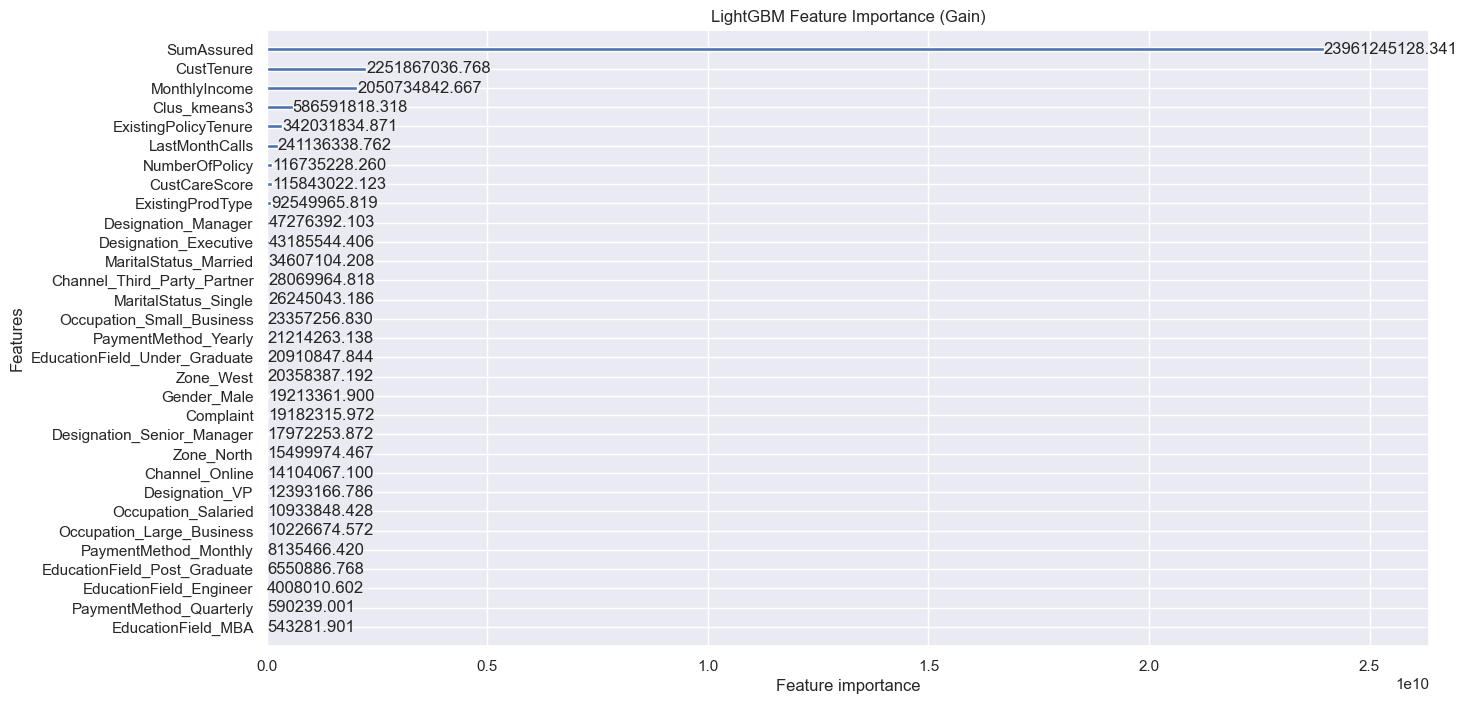

In [127]:
lgb.plot_importance(LightGBM_tuned, importance_type="gain", figsize=(15,8), title="LightGBM Feature Importance (Gain)")
plt.show()

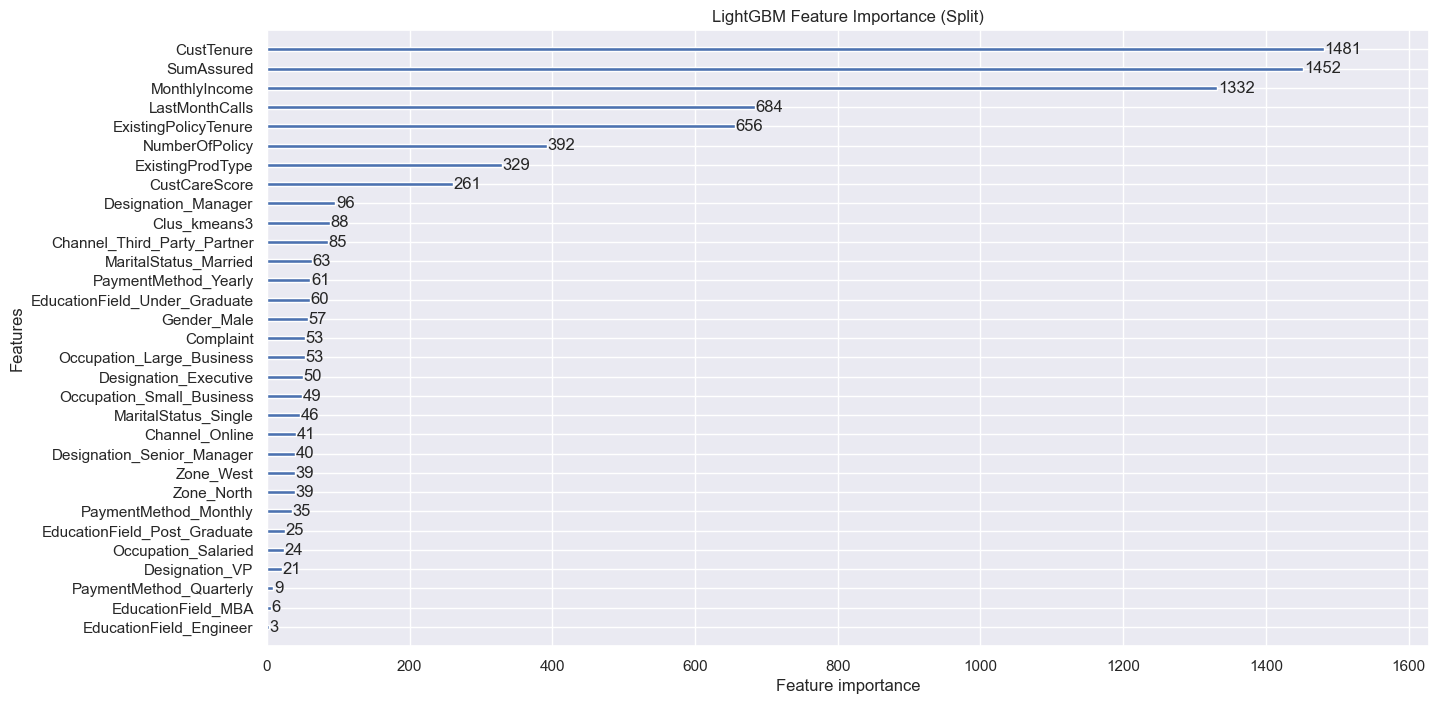

In [128]:
lgb.plot_importance(LightGBM_tuned, importance_type="split", figsize=(15,8), title="LightGBM Feature Importance (Split)")
plt.show()

In [211]:
def objective_XGB(trial):
    param = {
        "device" : "cuda",
        'tree_method':'gpu_hist' ,
        "objective": "reg:squarederror",
        # 'booster': 'dart',
        # 'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        # 'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        # 'gamma': trial.suggest_loguniform('gamma', 1e-8, 10),
        # # 'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        # "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 0.1),
        # # 'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        # "subsample": trial.suggest_float("subsample", 0.05, 0.1),
        # # 'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        # "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        # 'random_state': 42,
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 50),
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'sampling_method': 'gradient_based',
        'lambda': trial.suggest_loguniform('lambda', 7.0, 17.0),
        'alpha': trial.suggest_loguniform('alpha', 7.0, 17.0),
        'eta': trial.suggest_categorical('eta', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'gamma': trial.suggest_categorical('gamma', [18, 19, 20, 21, 22, 23, 24, 25]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'colsample_bynode': trial.suggest_categorical('colsample_bynode', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        # 'n_estimators': trial.suggest_int('n_estimators', 300, 5000),
        'min_child_weight': trial.suggest_int('min_child_weight', 8, 600),  
        # 'max_depth': trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7]),  
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'random_state': 42,
        'eval_metric': 'rmse'
    }
    model = xgboost.XGBRegressor(**param)  
    
    model.fit(X_train_copy, y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = mean_squared_error(y_test, preds,squared=False)
    mae = mean_absolute_error(y_test, preds)
    return rmse

In [210]:
study_XGB = optuna.create_study(direction='minimize')
study_XGB.optimize(objective_XGB, n_trials=300,show_progress_bar=True)
print('Number of finished trials:', len(study_XGB.trials))
print('Best trial:', study_XGB.best_trial.params)

[I 2023-12-16 15:41:46,355] A new study created in memory with name: no-name-5d66a8fb-3d81-4744-99e6-05b29e59e3b2
Best trial: 0. Best value: 806.013:   0%|▏                                             | 1/300 [00:05<25:46,  5.17s/it]

[I 2023-12-16 15:41:51,527] Trial 0 finished with value: 806.0125922918203 and parameters: {'max_depth': 2, 'lambda': 10.419612020450144, 'alpha': 11.934180164626394, 'eta': 0.4, 'gamma': 18, 'learning_rate': 0.012, 'colsample_bytree': 0.8, 'colsample_bynode': 1.0, 'min_child_weight': 64, 'subsample': 0.5}. Best is trial 0 with value: 806.0125922918203.


Best trial: 0. Best value: 806.013:   1%|▎                                             | 2/300 [00:09<24:38,  4.96s/it]

[I 2023-12-16 15:41:56,339] Trial 1 finished with value: 822.118667687127 and parameters: {'max_depth': 7, 'lambda': 7.984312061318189, 'alpha': 9.531281669244493, 'eta': 0.3, 'gamma': 25, 'learning_rate': 0.014, 'colsample_bytree': 0.5, 'colsample_bynode': 1.0, 'min_child_weight': 453, 'subsample': 0.8}. Best is trial 0 with value: 806.0125922918203.


Best trial: 0. Best value: 806.013:   1%|▍                                             | 3/300 [00:14<23:42,  4.79s/it]

[I 2023-12-16 15:42:00,924] Trial 2 finished with value: 1141.7945221020202 and parameters: {'max_depth': 8, 'lambda': 9.277870669384553, 'alpha': 7.6053655759734005, 'eta': 0.9, 'gamma': 19, 'learning_rate': 0.008, 'colsample_bytree': 0.4, 'colsample_bynode': 0.3, 'min_child_weight': 376, 'subsample': 0.8}. Best is trial 0 with value: 806.0125922918203.


Best trial: 0. Best value: 806.013:   1%|▌                                             | 4/300 [00:19<23:46,  4.82s/it]

[I 2023-12-16 15:42:05,790] Trial 3 finished with value: 1102.199409812035 and parameters: {'max_depth': 5, 'lambda': 10.720737823767546, 'alpha': 11.606166392111852, 'eta': 1.0, 'gamma': 23, 'learning_rate': 0.012, 'colsample_bytree': 0.3, 'colsample_bynode': 0.3, 'min_child_weight': 252, 'subsample': 0.7}. Best is trial 0 with value: 806.0125922918203.


Best trial: 4. Best value: 667.597:   2%|▊                                             | 5/300 [00:24<23:26,  4.77s/it]

[I 2023-12-16 15:42:10,470] Trial 4 finished with value: 667.5971083000928 and parameters: {'max_depth': 8, 'lambda': 16.303926301415366, 'alpha': 7.713590672489087, 'eta': 1.0, 'gamma': 22, 'learning_rate': 0.02, 'colsample_bytree': 0.8, 'colsample_bynode': 1.0, 'min_child_weight': 201, 'subsample': 0.5}. Best is trial 4 with value: 667.5971083000928.


Best trial: 4. Best value: 667.597:   2%|▉                                             | 6/300 [00:29<24:08,  4.93s/it]

[I 2023-12-16 15:42:15,705] Trial 5 finished with value: 1018.3550656907521 and parameters: {'max_depth': 4, 'lambda': 7.5460311050565485, 'alpha': 9.419555378341322, 'eta': 0.5, 'gamma': 25, 'learning_rate': 0.008, 'colsample_bytree': 0.5, 'colsample_bynode': 0.6, 'min_child_weight': 413, 'subsample': 1.0}. Best is trial 4 with value: 667.5971083000928.


Best trial: 4. Best value: 667.597:   2%|█                                             | 7/300 [00:33<23:12,  4.75s/it]

[I 2023-12-16 15:42:20,099] Trial 6 finished with value: 967.8513151969336 and parameters: {'max_depth': 1, 'lambda': 9.142365110101334, 'alpha': 13.505527927957887, 'eta': 0.3, 'gamma': 21, 'learning_rate': 0.012, 'colsample_bytree': 0.8, 'colsample_bynode': 0.6, 'min_child_weight': 578, 'subsample': 0.6}. Best is trial 4 with value: 667.5971083000928.


Best trial: 4. Best value: 667.597:   3%|█▏                                            | 8/300 [00:38<23:01,  4.73s/it]

[I 2023-12-16 15:42:24,778] Trial 7 finished with value: 790.6065138950615 and parameters: {'max_depth': 3, 'lambda': 7.810866206332528, 'alpha': 7.916428367492149, 'eta': 0.6, 'gamma': 23, 'learning_rate': 0.014, 'colsample_bytree': 1.0, 'colsample_bynode': 0.7, 'min_child_weight': 422, 'subsample': 1.0}. Best is trial 4 with value: 667.5971083000928.


Best trial: 4. Best value: 667.597:   3%|█▏                                            | 8/300 [00:39<24:02,  4.94s/it]

[W 2023-12-16 15:42:25,880] Trial 8 failed with parameters: {'max_depth': 10, 'lambda': 9.58203915152444, 'alpha': 14.345670245810455, 'eta': 0.5, 'gamma': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bynode': 0.7, 'min_child_weight': 499, 'subsample': 0.6} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\arnab\miniconda3\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\arnab\AppData\Local\Temp\ipykernel_11304\2204618859.py", line 38, in objective_XGB
    model.fit(X_train_copy, y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
  File "C:\Users\arnab\miniconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\arnab\miniconda3\Lib\site-packages\xgboost\sklearn.py", line 1086, in fit
    self._Booster = train(

KeyboardInterrupt: 

In [202]:
print('Best hyperparameters:', study_XGB.best_params)
print('Best MAE:', study_XGB.best_value)


Best hyperparameters: {'lambda': 8.086010362284693, 'alpha': 10.830688663817666, 'eta': 0.7, 'gamma': 21, 'learning_rate': 0.02, 'colsample_bytree': 1.0, 'colsample_bynode': 1.0, 'min_child_weight': 8, 'max_depth': 7, 'subsample': 0.7}
Best MAE: 599.1223993912323


In [122]:
params ={'lambda': 7.31084303529517, 'alpha': 11.740734246449167, 'eta': 1.0, 'gamma': 18, 'learning_rate': 0.01, 'colsample_bytree': 0.9, 'colsample_bynode': 1.0, 'n_estimators': 4720, 'min_child_weight': 8, 'max_depth': 7, 'subsample': 0.8}
#study_XGB.best_params
Optuna_XGB = xgboost.XGBRegressor(**params,tree_method='gpu_hist', device = "cuda",random_state=42)
Optuna_XGB.fit(X_train_copy, y_train)
y_test_pred_xgb_tuned = Optuna_XGB.predict(X_test)

In [123]:
mse_xgb_tuned = mean_squared_error(y_true=y_test, y_pred=y_test_pred_xgb_tuned, squared=True)
print("The MSE of the model is", mse_xgb_tuned)
rmse_xgb_tuned = mean_squared_error(y_true=y_test, y_pred=y_test_pred_xgb_tuned, squared=False)
print("The RMSE of the model is", rmse_xgb_tuned)
mae_xgb_tuned = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_xgb_tuned)
print("The MAE of the model is", mae_xgb_tuned)
r2_xgb_tuned = r2_score(y_true=y_test, y_pred=y_test_pred_xgb_tuned)
print("The R2 of the model is:", r2_xgb_tuned)

The MSE of the model is 326075.2877084822
The RMSE of the model is 571.0300234737944
The MAE of the model is 437.83628891126244
The R2 of the model is: 0.829950486339263


In [124]:
Model_perf = pd.DataFrame(
    {
        "Model": ['Linear regression', 'Random_Forest','XGBoost','LightGBM','Random_Forest_Tuned','LightGBM_Tuned','XGBoost_Tuned'],
        "MSE": [mse,mse_rf,mse_xgb,mse_gbm,mse_rf_tuned,mse_lgb_tuned,mse_xgb_tuned],
        "MAE": [mae, mae_rf,mae_xgb,mae_gbm,mae_rf_tuned,mae_lgb_tuned,mae_xgb_tuned],
        "RMSE": [rmse,rmse_rf,rmse_xgb, rmse_gbm,rmse_rf_tuned,rmse_lgb_tuned,rmse_xgb_tuned],
        "R2": [r2,r2_rf,r2_xgb, r2_gbm,r2_rf_tuned,r2_lgb_tuned,r2_xgb_tuned],
    }
)
Model_perf

Model            MSE         MAE        RMSE        R2
0    Linear regression  919855.683166  775.691120  959.091071  0.520292
1        Random_Forest  315162.517310  429.465434  561.393371  0.835642
2              XGBoost  351309.518378  453.530790  592.713690  0.816791
3             LightGBM  312044.386891  430.675892  558.609333  0.837268
4  Random_Forest_Tuned  306654.984319  426.134101  553.764376  0.840078
5       LightGBM_Tuned  306341.335337  426.919467  553.481107  0.840242
6        XGBoost_Tuned  326075.287708  437.836289  571.030023  0.829950